# **Tarea 1**
## Machine Learning Avanzado
Integrantes: Patricio Ramirez
             Carlos Bustamante
             Nicolas Rivera
             Pablo Elgueta

---

##### Objetivo:
En este laboratorio volveremos a ver la biblioteca del trimestre anterior de perros y gatos. la base de datos de imagenes se
encuentra en la siguiente dirección: ‘https://www.kaggle.com/competitions/dogs-vs-cats/data‘
Ademas, para completar el análisis, se le pide construir una red que permita hacer la clasificación en base a los audios
adicionalmente: ‘https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs‘ 

###### Se le evaluará por:

- Carga y lectura de imagenes
- Crear una red neuronal convolucional
- Crear una red neuronal LSTM
- Pruebe 2 formas distintas de arquitectura de red para cada una.
- Cargue dos fotos de su biblioteca (sí, vaya y saque una foto a un perro o gato).
- Evalúe sus modelos con las fotos sacadas.
- Cargue los datos de audio
- Proponga un modelo para clasificar este tipo de dato
- Evalúe su modelo.

### Dogs vs Cats

#### **Descripción Dataset**


- El archivo de entrenamiento contiene 25.000 imagenes de perros y gatos. 
- Entrena tu algoritmo con estos archivos y predice las etiquetas para test1.zip 

#### **Etiquetas:**

- 1 = dog 
- 0 = cat


## 1.-Reconocimiento e importación de Librerías y Conjuntos de Imágenes



## 1.1.- Librerias

Para manipular bases de datos se usó Pandas, para visualización fueron las librerías Matplotlib y Seaborn, y en cuanto a Machine Learning se utilizó Keras y Scikit-learn.

In [1]:


#Analisis de Datos

import opendatasets as od
import numpy as np
from os import listdir
from numpy import asarray


#Visualizacion de Datos
import matplotlib.pyplot as plt


#Visualización de Imagenes

from matplotlib.image import imread
from matplotlib import pyplot
from tensorflow.keras.utils import load_img
from PIL import Image

#Procesamiento de Imagenes
from tensorflow.keras.preprocessing.image import img_to_array


#Machine Learning


import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers, regularizers



#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense


### 1.2.-Cargando el Dataset

###### Descarga de Dataset

In [2]:
od.download("https://www.kaggle.com/competitions/dogs-vs-cats/data")
{"username":"dgrone","key":"8e16739c70ce24ea1e6d9a45b61e9796"}

Skipping, found downloaded files in ".\dogs-vs-cats" (use force=True to force download)


{'username': 'dgrone', 'key': '8e16739c70ce24ea1e6d9a45b61e9796'}

In [3]:
def extract_zip(file, folder, password):
    import zipfile
    ruta_zip = file
    ruta_extraccion = folder
    archivo_zip = zipfile.ZipFile(ruta_zip, 'r')
    try:
        archivo_zip.extractall(pwd=password, path=ruta_extraccion)
    except:
        pass
    archivo_zip.close()

###### Descompresión de Archivos

In [4]:
folder = 'dogs-vs-cats/train/'
if 'train' not in  listdir('dogs-vs-cats/'):
    file = 'dogs-vs-cats/train.zip'
    password = None
    folder = 'dogs-vs-cats'
    extract_zip(file, folder, password)
    folder = 'dogs-vs-cats/train/'

###### Visualización de Imagenes del Dataset

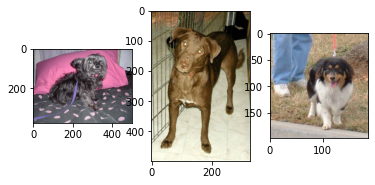

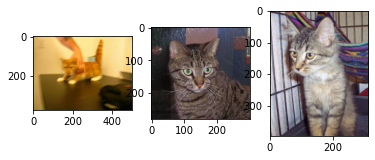

In [5]:
for i in range(3):
    pyplot.subplot(130  + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()

for i in range(3):
    pyplot.subplot(130  + 1 + i)
    filename = folder + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()

## 2.- CNN

### 2.1.- Tratamiento de Datos

###### Conversión de Imagen a Arreglo de Pixeles

In [6]:
photos = list()
labels = list()
for file in listdir(folder):   # en versión final se debe reemplazar por file in listdir(folder), hay que probar
    photo = load_img(folder + file, target_size=(40, 40))
    print(folder + file)
    #image = imread(folder + file)
    
    #pyplot.imshow(image)
    photo = img_to_array(photo)
    photos.append(photo)
    if file.startswith('dog'):
        label = 1.0
        labels.append(label)
    if file.startswith('cat'):
        label = 0.0
        labels.append(label)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)


dogs-vs-cats/train/cat.0.jpg
dogs-vs-cats/train/cat.1.jpg
dogs-vs-cats/train/cat.10.jpg
dogs-vs-cats/train/cat.100.jpg
dogs-vs-cats/train/cat.1000.jpg
dogs-vs-cats/train/cat.10000.jpg
dogs-vs-cats/train/cat.10001.jpg
dogs-vs-cats/train/cat.10002.jpg
dogs-vs-cats/train/cat.10003.jpg
dogs-vs-cats/train/cat.10004.jpg
dogs-vs-cats/train/cat.10005.jpg
dogs-vs-cats/train/cat.10006.jpg
dogs-vs-cats/train/cat.10007.jpg
dogs-vs-cats/train/cat.10008.jpg
dogs-vs-cats/train/cat.10009.jpg
dogs-vs-cats/train/cat.1001.jpg
dogs-vs-cats/train/cat.10010.jpg
dogs-vs-cats/train/cat.10011.jpg
dogs-vs-cats/train/cat.10012.jpg
dogs-vs-cats/train/cat.10013.jpg
dogs-vs-cats/train/cat.10014.jpg
dogs-vs-cats/train/cat.10015.jpg
dogs-vs-cats/train/cat.10016.jpg
dogs-vs-cats/train/cat.10017.jpg
dogs-vs-cats/train/cat.10018.jpg
dogs-vs-cats/train/cat.10019.jpg
dogs-vs-cats/train/cat.1002.jpg
dogs-vs-cats/train/cat.10020.jpg
dogs-vs-cats/train/cat.10021.jpg
dogs-vs-cats/train/cat.10022.jpg
dogs-vs-cats/train/cat.100

dogs-vs-cats/train/cat.10248.jpg
dogs-vs-cats/train/cat.10249.jpg
dogs-vs-cats/train/cat.1025.jpg
dogs-vs-cats/train/cat.10250.jpg
dogs-vs-cats/train/cat.10251.jpg
dogs-vs-cats/train/cat.10252.jpg
dogs-vs-cats/train/cat.10253.jpg
dogs-vs-cats/train/cat.10254.jpg
dogs-vs-cats/train/cat.10255.jpg
dogs-vs-cats/train/cat.10256.jpg
dogs-vs-cats/train/cat.10257.jpg
dogs-vs-cats/train/cat.10258.jpg
dogs-vs-cats/train/cat.10259.jpg
dogs-vs-cats/train/cat.1026.jpg
dogs-vs-cats/train/cat.10260.jpg
dogs-vs-cats/train/cat.10261.jpg
dogs-vs-cats/train/cat.10262.jpg
dogs-vs-cats/train/cat.10263.jpg
dogs-vs-cats/train/cat.10264.jpg
dogs-vs-cats/train/cat.10265.jpg
dogs-vs-cats/train/cat.10266.jpg
dogs-vs-cats/train/cat.10267.jpg
dogs-vs-cats/train/cat.10268.jpg
dogs-vs-cats/train/cat.10269.jpg
dogs-vs-cats/train/cat.1027.jpg
dogs-vs-cats/train/cat.10270.jpg
dogs-vs-cats/train/cat.10271.jpg
dogs-vs-cats/train/cat.10272.jpg
dogs-vs-cats/train/cat.10273.jpg
dogs-vs-cats/train/cat.10274.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.10517.jpg
dogs-vs-cats/train/cat.10518.jpg
dogs-vs-cats/train/cat.10519.jpg
dogs-vs-cats/train/cat.1052.jpg
dogs-vs-cats/train/cat.10520.jpg
dogs-vs-cats/train/cat.10521.jpg
dogs-vs-cats/train/cat.10522.jpg
dogs-vs-cats/train/cat.10523.jpg
dogs-vs-cats/train/cat.10524.jpg
dogs-vs-cats/train/cat.10525.jpg
dogs-vs-cats/train/cat.10526.jpg
dogs-vs-cats/train/cat.10527.jpg
dogs-vs-cats/train/cat.10528.jpg
dogs-vs-cats/train/cat.10529.jpg
dogs-vs-cats/train/cat.1053.jpg
dogs-vs-cats/train/cat.10530.jpg
dogs-vs-cats/train/cat.10531.jpg
dogs-vs-cats/train/cat.10532.jpg
dogs-vs-cats/train/cat.10533.jpg
dogs-vs-cats/train/cat.10534.jpg
dogs-vs-cats/train/cat.10535.jpg
dogs-vs-cats/train/cat.10536.jpg
dogs-vs-cats/train/cat.10537.jpg
dogs-vs-cats/train/cat.10538.jpg
dogs-vs-cats/train/cat.10539.jpg
dogs-vs-cats/train/cat.1054.jpg
dogs-vs-cats/train/cat.10540.jpg
dogs-vs-cats/train/cat.10541.jpg
dogs-vs-cats/train/cat.10542.jpg
dogs-vs-cats/train/cat.10543.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.10750.jpg
dogs-vs-cats/train/cat.10751.jpg
dogs-vs-cats/train/cat.10752.jpg
dogs-vs-cats/train/cat.10753.jpg
dogs-vs-cats/train/cat.10754.jpg
dogs-vs-cats/train/cat.10755.jpg
dogs-vs-cats/train/cat.10756.jpg
dogs-vs-cats/train/cat.10757.jpg
dogs-vs-cats/train/cat.10758.jpg
dogs-vs-cats/train/cat.10759.jpg
dogs-vs-cats/train/cat.1076.jpg
dogs-vs-cats/train/cat.10760.jpg
dogs-vs-cats/train/cat.10761.jpg
dogs-vs-cats/train/cat.10762.jpg
dogs-vs-cats/train/cat.10763.jpg
dogs-vs-cats/train/cat.10764.jpg
dogs-vs-cats/train/cat.10765.jpg
dogs-vs-cats/train/cat.10766.jpg
dogs-vs-cats/train/cat.10767.jpg
dogs-vs-cats/train/cat.10768.jpg
dogs-vs-cats/train/cat.10769.jpg
dogs-vs-cats/train/cat.1077.jpg
dogs-vs-cats/train/cat.10770.jpg
dogs-vs-cats/train/cat.10771.jpg
dogs-vs-cats/train/cat.10772.jpg
dogs-vs-cats/train/cat.10773.jpg
dogs-vs-cats/train/cat.10774.jpg
dogs-vs-cats/train/cat.10775.jpg
dogs-vs-cats/train/cat.10776.jpg
dogs-vs-cats/train/cat.10777.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.11000.jpg
dogs-vs-cats/train/cat.11001.jpg
dogs-vs-cats/train/cat.11002.jpg
dogs-vs-cats/train/cat.11003.jpg
dogs-vs-cats/train/cat.11004.jpg
dogs-vs-cats/train/cat.11005.jpg
dogs-vs-cats/train/cat.11006.jpg
dogs-vs-cats/train/cat.11007.jpg
dogs-vs-cats/train/cat.11008.jpg
dogs-vs-cats/train/cat.11009.jpg
dogs-vs-cats/train/cat.1101.jpg
dogs-vs-cats/train/cat.11010.jpg
dogs-vs-cats/train/cat.11011.jpg
dogs-vs-cats/train/cat.11012.jpg
dogs-vs-cats/train/cat.11013.jpg
dogs-vs-cats/train/cat.11014.jpg
dogs-vs-cats/train/cat.11015.jpg
dogs-vs-cats/train/cat.11016.jpg
dogs-vs-cats/train/cat.11017.jpg
dogs-vs-cats/train/cat.11018.jpg
dogs-vs-cats/train/cat.11019.jpg
dogs-vs-cats/train/cat.1102.jpg
dogs-vs-cats/train/cat.11020.jpg
dogs-vs-cats/train/cat.11021.jpg
dogs-vs-cats/train/cat.11022.jpg
dogs-vs-cats/train/cat.11023.jpg
dogs-vs-cats/train/cat.11024.jpg
dogs-vs-cats/train/cat.11025.jpg
dogs-vs-cats/train/cat.11026.jpg
dogs-vs-cats/train/cat.11027.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.11268.jpg
dogs-vs-cats/train/cat.11269.jpg
dogs-vs-cats/train/cat.1127.jpg
dogs-vs-cats/train/cat.11270.jpg
dogs-vs-cats/train/cat.11271.jpg
dogs-vs-cats/train/cat.11272.jpg
dogs-vs-cats/train/cat.11273.jpg
dogs-vs-cats/train/cat.11274.jpg
dogs-vs-cats/train/cat.11275.jpg
dogs-vs-cats/train/cat.11276.jpg
dogs-vs-cats/train/cat.11277.jpg
dogs-vs-cats/train/cat.11278.jpg
dogs-vs-cats/train/cat.11279.jpg
dogs-vs-cats/train/cat.1128.jpg
dogs-vs-cats/train/cat.11280.jpg
dogs-vs-cats/train/cat.11281.jpg
dogs-vs-cats/train/cat.11282.jpg
dogs-vs-cats/train/cat.11283.jpg
dogs-vs-cats/train/cat.11284.jpg
dogs-vs-cats/train/cat.11285.jpg
dogs-vs-cats/train/cat.11286.jpg
dogs-vs-cats/train/cat.11287.jpg
dogs-vs-cats/train/cat.11288.jpg
dogs-vs-cats/train/cat.11289.jpg
dogs-vs-cats/train/cat.1129.jpg
dogs-vs-cats/train/cat.11290.jpg
dogs-vs-cats/train/cat.11291.jpg
dogs-vs-cats/train/cat.11292.jpg
dogs-vs-cats/train/cat.11293.jpg
dogs-vs-cats/train/cat.11294.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11506.jpg
dogs-vs-cats/train/cat.11507.jpg
dogs-vs-cats/train/cat.11508.jpg
dogs-vs-cats/train/cat.11509.jpg
dogs-vs-cats/train/cat.1151.jpg
dogs-vs-cats/train/cat.11510.jpg
dogs-vs-cats/train/cat.11511.jpg
dogs-vs-cats/train/cat.11512.jpg
dogs-vs-cats/train/cat.11513.jpg
dogs-vs-cats/train/cat.11514.jpg
dogs-vs-cats/train/cat.11515.jpg
dogs-vs-cats/train/cat.11516.jpg
dogs-vs-cats/train/cat.11517.jpg
dogs-vs-cats/train/cat.11518.jpg
dogs-vs-cats/train/cat.11519.jpg
dogs-vs-cats/train/cat.1152.jpg
dogs-vs-cats/train/cat.11520.jpg
dogs-vs-cats/train/cat.11521.jpg
dogs-vs-cats/train/cat.11522.jpg
dogs-vs-cats/train/cat.11523.jpg
dogs-vs-cats/train/cat.11524.jpg
dogs-vs-cats/train/cat.11525.jpg
dogs-vs-cats/train/cat.11526.jpg
dogs-vs-cats/train/cat.11527.jpg
dogs-vs-cats/train/cat.11528.jpg
dogs-vs-cats/train/cat.11529.jpg
dogs-vs-cats/train/cat.1153.jpg
dogs-vs-cats/train/cat.11530.jpg
dogs-vs-cats/train/cat.11531.jpg
dogs-vs-cats/train/cat.11532.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11739.jpg
dogs-vs-cats/train/cat.1174.jpg
dogs-vs-cats/train/cat.11740.jpg
dogs-vs-cats/train/cat.11741.jpg
dogs-vs-cats/train/cat.11742.jpg
dogs-vs-cats/train/cat.11743.jpg
dogs-vs-cats/train/cat.11744.jpg
dogs-vs-cats/train/cat.11745.jpg
dogs-vs-cats/train/cat.11746.jpg
dogs-vs-cats/train/cat.11747.jpg
dogs-vs-cats/train/cat.11748.jpg
dogs-vs-cats/train/cat.11749.jpg
dogs-vs-cats/train/cat.1175.jpg
dogs-vs-cats/train/cat.11750.jpg
dogs-vs-cats/train/cat.11751.jpg
dogs-vs-cats/train/cat.11752.jpg
dogs-vs-cats/train/cat.11753.jpg
dogs-vs-cats/train/cat.11754.jpg
dogs-vs-cats/train/cat.11755.jpg
dogs-vs-cats/train/cat.11756.jpg
dogs-vs-cats/train/cat.11757.jpg
dogs-vs-cats/train/cat.11758.jpg
dogs-vs-cats/train/cat.11759.jpg
dogs-vs-cats/train/cat.1176.jpg
dogs-vs-cats/train/cat.11760.jpg
dogs-vs-cats/train/cat.11761.jpg
dogs-vs-cats/train/cat.11762.jpg
dogs-vs-cats/train/cat.11763.jpg
dogs-vs-cats/train/cat.11764.jpg
dogs-vs-cats/train/cat.11765.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11984.jpg
dogs-vs-cats/train/cat.11985.jpg
dogs-vs-cats/train/cat.11986.jpg
dogs-vs-cats/train/cat.11987.jpg
dogs-vs-cats/train/cat.11988.jpg
dogs-vs-cats/train/cat.11989.jpg
dogs-vs-cats/train/cat.1199.jpg
dogs-vs-cats/train/cat.11990.jpg
dogs-vs-cats/train/cat.11991.jpg
dogs-vs-cats/train/cat.11992.jpg
dogs-vs-cats/train/cat.11993.jpg
dogs-vs-cats/train/cat.11994.jpg
dogs-vs-cats/train/cat.11995.jpg
dogs-vs-cats/train/cat.11996.jpg
dogs-vs-cats/train/cat.11997.jpg
dogs-vs-cats/train/cat.11998.jpg
dogs-vs-cats/train/cat.11999.jpg
dogs-vs-cats/train/cat.12.jpg
dogs-vs-cats/train/cat.120.jpg
dogs-vs-cats/train/cat.1200.jpg
dogs-vs-cats/train/cat.12000.jpg
dogs-vs-cats/train/cat.12001.jpg
dogs-vs-cats/train/cat.12002.jpg
dogs-vs-cats/train/cat.12003.jpg
dogs-vs-cats/train/cat.12004.jpg
dogs-vs-cats/train/cat.12005.jpg
dogs-vs-cats/train/cat.12006.jpg
dogs-vs-cats/train/cat.12007.jpg
dogs-vs-cats/train/cat.12008.jpg
dogs-vs-cats/train/cat.12009.jpg
dogs-vs-cats/trai

dogs-vs-cats/train/cat.1223.jpg
dogs-vs-cats/train/cat.12230.jpg
dogs-vs-cats/train/cat.12231.jpg
dogs-vs-cats/train/cat.12232.jpg
dogs-vs-cats/train/cat.12233.jpg
dogs-vs-cats/train/cat.12234.jpg
dogs-vs-cats/train/cat.12235.jpg
dogs-vs-cats/train/cat.12236.jpg
dogs-vs-cats/train/cat.12237.jpg
dogs-vs-cats/train/cat.12238.jpg
dogs-vs-cats/train/cat.12239.jpg
dogs-vs-cats/train/cat.1224.jpg
dogs-vs-cats/train/cat.12240.jpg
dogs-vs-cats/train/cat.12241.jpg
dogs-vs-cats/train/cat.12242.jpg
dogs-vs-cats/train/cat.12243.jpg
dogs-vs-cats/train/cat.12244.jpg
dogs-vs-cats/train/cat.12245.jpg
dogs-vs-cats/train/cat.12246.jpg
dogs-vs-cats/train/cat.12247.jpg
dogs-vs-cats/train/cat.12248.jpg
dogs-vs-cats/train/cat.12249.jpg
dogs-vs-cats/train/cat.1225.jpg
dogs-vs-cats/train/cat.12250.jpg
dogs-vs-cats/train/cat.12251.jpg
dogs-vs-cats/train/cat.12252.jpg
dogs-vs-cats/train/cat.12253.jpg
dogs-vs-cats/train/cat.12254.jpg
dogs-vs-cats/train/cat.12255.jpg
dogs-vs-cats/train/cat.12256.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.12479.jpg
dogs-vs-cats/train/cat.1248.jpg
dogs-vs-cats/train/cat.12480.jpg
dogs-vs-cats/train/cat.12481.jpg
dogs-vs-cats/train/cat.12482.jpg
dogs-vs-cats/train/cat.12483.jpg
dogs-vs-cats/train/cat.12484.jpg
dogs-vs-cats/train/cat.12485.jpg
dogs-vs-cats/train/cat.12486.jpg
dogs-vs-cats/train/cat.12487.jpg
dogs-vs-cats/train/cat.12488.jpg
dogs-vs-cats/train/cat.12489.jpg
dogs-vs-cats/train/cat.1249.jpg
dogs-vs-cats/train/cat.12490.jpg
dogs-vs-cats/train/cat.12491.jpg
dogs-vs-cats/train/cat.12492.jpg
dogs-vs-cats/train/cat.12493.jpg
dogs-vs-cats/train/cat.12494.jpg
dogs-vs-cats/train/cat.12495.jpg
dogs-vs-cats/train/cat.12496.jpg
dogs-vs-cats/train/cat.12497.jpg
dogs-vs-cats/train/cat.12498.jpg
dogs-vs-cats/train/cat.12499.jpg
dogs-vs-cats/train/cat.125.jpg
dogs-vs-cats/train/cat.1250.jpg
dogs-vs-cats/train/cat.1251.jpg
dogs-vs-cats/train/cat.1252.jpg
dogs-vs-cats/train/cat.1253.jpg
dogs-vs-cats/train/cat.1254.jpg
dogs-vs-cats/train/cat.1255.jpg
dogs-vs-cats/train/c

dogs-vs-cats/train/cat.1478.jpg
dogs-vs-cats/train/cat.1479.jpg
dogs-vs-cats/train/cat.148.jpg
dogs-vs-cats/train/cat.1480.jpg
dogs-vs-cats/train/cat.1481.jpg
dogs-vs-cats/train/cat.1482.jpg
dogs-vs-cats/train/cat.1483.jpg
dogs-vs-cats/train/cat.1484.jpg
dogs-vs-cats/train/cat.1485.jpg
dogs-vs-cats/train/cat.1486.jpg
dogs-vs-cats/train/cat.1487.jpg
dogs-vs-cats/train/cat.1488.jpg
dogs-vs-cats/train/cat.1489.jpg
dogs-vs-cats/train/cat.149.jpg
dogs-vs-cats/train/cat.1490.jpg
dogs-vs-cats/train/cat.1491.jpg
dogs-vs-cats/train/cat.1492.jpg
dogs-vs-cats/train/cat.1493.jpg
dogs-vs-cats/train/cat.1494.jpg
dogs-vs-cats/train/cat.1495.jpg
dogs-vs-cats/train/cat.1496.jpg
dogs-vs-cats/train/cat.1497.jpg
dogs-vs-cats/train/cat.1498.jpg
dogs-vs-cats/train/cat.1499.jpg
dogs-vs-cats/train/cat.15.jpg
dogs-vs-cats/train/cat.150.jpg
dogs-vs-cats/train/cat.1500.jpg
dogs-vs-cats/train/cat.1501.jpg
dogs-vs-cats/train/cat.1502.jpg
dogs-vs-cats/train/cat.1503.jpg
dogs-vs-cats/train/cat.1504.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.1729.jpg
dogs-vs-cats/train/cat.173.jpg
dogs-vs-cats/train/cat.1730.jpg
dogs-vs-cats/train/cat.1731.jpg
dogs-vs-cats/train/cat.1732.jpg
dogs-vs-cats/train/cat.1733.jpg
dogs-vs-cats/train/cat.1734.jpg
dogs-vs-cats/train/cat.1735.jpg
dogs-vs-cats/train/cat.1736.jpg
dogs-vs-cats/train/cat.1737.jpg
dogs-vs-cats/train/cat.1738.jpg
dogs-vs-cats/train/cat.1739.jpg
dogs-vs-cats/train/cat.174.jpg
dogs-vs-cats/train/cat.1740.jpg
dogs-vs-cats/train/cat.1741.jpg
dogs-vs-cats/train/cat.1742.jpg
dogs-vs-cats/train/cat.1743.jpg
dogs-vs-cats/train/cat.1744.jpg
dogs-vs-cats/train/cat.1745.jpg
dogs-vs-cats/train/cat.1746.jpg
dogs-vs-cats/train/cat.1747.jpg
dogs-vs-cats/train/cat.1748.jpg
dogs-vs-cats/train/cat.1749.jpg
dogs-vs-cats/train/cat.175.jpg
dogs-vs-cats/train/cat.1750.jpg
dogs-vs-cats/train/cat.1751.jpg
dogs-vs-cats/train/cat.1752.jpg
dogs-vs-cats/train/cat.1753.jpg
dogs-vs-cats/train/cat.1754.jpg
dogs-vs-cats/train/cat.1755.jpg
dogs-vs-cats/train/cat.1756.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2.jpg
dogs-vs-cats/train/cat.20.jpg
dogs-vs-cats/train/cat.200.jpg
dogs-vs-cats/train/cat.2000.jpg
dogs-vs-cats/train/cat.2001.jpg
dogs-vs-cats/train/cat.2002.jpg
dogs-vs-cats/train/cat.2003.jpg
dogs-vs-cats/train/cat.2004.jpg
dogs-vs-cats/train/cat.2005.jpg
dogs-vs-cats/train/cat.2006.jpg
dogs-vs-cats/train/cat.2007.jpg
dogs-vs-cats/train/cat.2008.jpg
dogs-vs-cats/train/cat.2009.jpg
dogs-vs-cats/train/cat.201.jpg
dogs-vs-cats/train/cat.2010.jpg
dogs-vs-cats/train/cat.2011.jpg
dogs-vs-cats/train/cat.2012.jpg
dogs-vs-cats/train/cat.2013.jpg
dogs-vs-cats/train/cat.2014.jpg
dogs-vs-cats/train/cat.2015.jpg
dogs-vs-cats/train/cat.2016.jpg
dogs-vs-cats/train/cat.2017.jpg
dogs-vs-cats/train/cat.2018.jpg
dogs-vs-cats/train/cat.2019.jpg
dogs-vs-cats/train/cat.202.jpg
dogs-vs-cats/train/cat.2020.jpg
dogs-vs-cats/train/cat.2021.jpg
dogs-vs-cats/train/cat.2022.jpg
dogs-vs-cats/train/cat.2023.jpg
dogs-vs-cats/train/cat.2024.jpg
dogs-vs-cats/train/cat.2025.jpg
dogs-vs-cats/tra

dogs-vs-cats/train/cat.2240.jpg
dogs-vs-cats/train/cat.2241.jpg
dogs-vs-cats/train/cat.2242.jpg
dogs-vs-cats/train/cat.2243.jpg
dogs-vs-cats/train/cat.2244.jpg
dogs-vs-cats/train/cat.2245.jpg
dogs-vs-cats/train/cat.2246.jpg
dogs-vs-cats/train/cat.2247.jpg
dogs-vs-cats/train/cat.2248.jpg
dogs-vs-cats/train/cat.2249.jpg
dogs-vs-cats/train/cat.225.jpg
dogs-vs-cats/train/cat.2250.jpg
dogs-vs-cats/train/cat.2251.jpg
dogs-vs-cats/train/cat.2252.jpg
dogs-vs-cats/train/cat.2253.jpg
dogs-vs-cats/train/cat.2254.jpg
dogs-vs-cats/train/cat.2255.jpg
dogs-vs-cats/train/cat.2256.jpg
dogs-vs-cats/train/cat.2257.jpg
dogs-vs-cats/train/cat.2258.jpg
dogs-vs-cats/train/cat.2259.jpg
dogs-vs-cats/train/cat.226.jpg
dogs-vs-cats/train/cat.2260.jpg
dogs-vs-cats/train/cat.2261.jpg
dogs-vs-cats/train/cat.2262.jpg
dogs-vs-cats/train/cat.2263.jpg
dogs-vs-cats/train/cat.2264.jpg
dogs-vs-cats/train/cat.2265.jpg
dogs-vs-cats/train/cat.2266.jpg
dogs-vs-cats/train/cat.2267.jpg
dogs-vs-cats/train/cat.2268.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.250.jpg
dogs-vs-cats/train/cat.2500.jpg
dogs-vs-cats/train/cat.2501.jpg
dogs-vs-cats/train/cat.2502.jpg
dogs-vs-cats/train/cat.2503.jpg
dogs-vs-cats/train/cat.2504.jpg
dogs-vs-cats/train/cat.2505.jpg
dogs-vs-cats/train/cat.2506.jpg
dogs-vs-cats/train/cat.2507.jpg
dogs-vs-cats/train/cat.2508.jpg
dogs-vs-cats/train/cat.2509.jpg
dogs-vs-cats/train/cat.251.jpg
dogs-vs-cats/train/cat.2510.jpg
dogs-vs-cats/train/cat.2511.jpg
dogs-vs-cats/train/cat.2512.jpg
dogs-vs-cats/train/cat.2513.jpg
dogs-vs-cats/train/cat.2514.jpg
dogs-vs-cats/train/cat.2515.jpg
dogs-vs-cats/train/cat.2516.jpg
dogs-vs-cats/train/cat.2517.jpg
dogs-vs-cats/train/cat.2518.jpg
dogs-vs-cats/train/cat.2519.jpg
dogs-vs-cats/train/cat.252.jpg
dogs-vs-cats/train/cat.2520.jpg
dogs-vs-cats/train/cat.2521.jpg
dogs-vs-cats/train/cat.2522.jpg
dogs-vs-cats/train/cat.2523.jpg
dogs-vs-cats/train/cat.2524.jpg
dogs-vs-cats/train/cat.2525.jpg
dogs-vs-cats/train/cat.2526.jpg
dogs-vs-cats/train/cat.2527.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2751.jpg
dogs-vs-cats/train/cat.2752.jpg
dogs-vs-cats/train/cat.2753.jpg
dogs-vs-cats/train/cat.2754.jpg
dogs-vs-cats/train/cat.2755.jpg
dogs-vs-cats/train/cat.2756.jpg
dogs-vs-cats/train/cat.2757.jpg
dogs-vs-cats/train/cat.2758.jpg
dogs-vs-cats/train/cat.2759.jpg
dogs-vs-cats/train/cat.276.jpg
dogs-vs-cats/train/cat.2760.jpg
dogs-vs-cats/train/cat.2761.jpg
dogs-vs-cats/train/cat.2762.jpg
dogs-vs-cats/train/cat.2763.jpg
dogs-vs-cats/train/cat.2764.jpg
dogs-vs-cats/train/cat.2765.jpg
dogs-vs-cats/train/cat.2766.jpg
dogs-vs-cats/train/cat.2767.jpg
dogs-vs-cats/train/cat.2768.jpg
dogs-vs-cats/train/cat.2769.jpg
dogs-vs-cats/train/cat.277.jpg
dogs-vs-cats/train/cat.2770.jpg
dogs-vs-cats/train/cat.2771.jpg
dogs-vs-cats/train/cat.2772.jpg
dogs-vs-cats/train/cat.2773.jpg
dogs-vs-cats/train/cat.2774.jpg
dogs-vs-cats/train/cat.2775.jpg
dogs-vs-cats/train/cat.2776.jpg
dogs-vs-cats/train/cat.2777.jpg
dogs-vs-cats/train/cat.2778.jpg
dogs-vs-cats/train/cat.2779.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.301.jpg
dogs-vs-cats/train/cat.3010.jpg
dogs-vs-cats/train/cat.3011.jpg
dogs-vs-cats/train/cat.3012.jpg
dogs-vs-cats/train/cat.3013.jpg
dogs-vs-cats/train/cat.3014.jpg
dogs-vs-cats/train/cat.3015.jpg
dogs-vs-cats/train/cat.3016.jpg
dogs-vs-cats/train/cat.3017.jpg
dogs-vs-cats/train/cat.3018.jpg
dogs-vs-cats/train/cat.3019.jpg
dogs-vs-cats/train/cat.302.jpg
dogs-vs-cats/train/cat.3020.jpg
dogs-vs-cats/train/cat.3021.jpg
dogs-vs-cats/train/cat.3022.jpg
dogs-vs-cats/train/cat.3023.jpg
dogs-vs-cats/train/cat.3024.jpg
dogs-vs-cats/train/cat.3025.jpg
dogs-vs-cats/train/cat.3026.jpg
dogs-vs-cats/train/cat.3027.jpg
dogs-vs-cats/train/cat.3028.jpg
dogs-vs-cats/train/cat.3029.jpg
dogs-vs-cats/train/cat.303.jpg
dogs-vs-cats/train/cat.3030.jpg
dogs-vs-cats/train/cat.3031.jpg
dogs-vs-cats/train/cat.3032.jpg
dogs-vs-cats/train/cat.3033.jpg
dogs-vs-cats/train/cat.3034.jpg
dogs-vs-cats/train/cat.3035.jpg
dogs-vs-cats/train/cat.3036.jpg
dogs-vs-cats/train/cat.3037.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3296.jpg
dogs-vs-cats/train/cat.3297.jpg
dogs-vs-cats/train/cat.3298.jpg
dogs-vs-cats/train/cat.3299.jpg
dogs-vs-cats/train/cat.33.jpg
dogs-vs-cats/train/cat.330.jpg
dogs-vs-cats/train/cat.3300.jpg
dogs-vs-cats/train/cat.3301.jpg
dogs-vs-cats/train/cat.3302.jpg
dogs-vs-cats/train/cat.3303.jpg
dogs-vs-cats/train/cat.3304.jpg
dogs-vs-cats/train/cat.3305.jpg
dogs-vs-cats/train/cat.3306.jpg
dogs-vs-cats/train/cat.3307.jpg
dogs-vs-cats/train/cat.3308.jpg
dogs-vs-cats/train/cat.3309.jpg
dogs-vs-cats/train/cat.331.jpg
dogs-vs-cats/train/cat.3310.jpg
dogs-vs-cats/train/cat.3311.jpg
dogs-vs-cats/train/cat.3312.jpg
dogs-vs-cats/train/cat.3313.jpg
dogs-vs-cats/train/cat.3314.jpg
dogs-vs-cats/train/cat.3315.jpg
dogs-vs-cats/train/cat.3316.jpg
dogs-vs-cats/train/cat.3317.jpg
dogs-vs-cats/train/cat.3318.jpg
dogs-vs-cats/train/cat.3319.jpg
dogs-vs-cats/train/cat.332.jpg
dogs-vs-cats/train/cat.3320.jpg
dogs-vs-cats/train/cat.3321.jpg
dogs-vs-cats/train/cat.3322.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.3560.jpg
dogs-vs-cats/train/cat.3561.jpg
dogs-vs-cats/train/cat.3562.jpg
dogs-vs-cats/train/cat.3563.jpg
dogs-vs-cats/train/cat.3564.jpg
dogs-vs-cats/train/cat.3565.jpg
dogs-vs-cats/train/cat.3566.jpg
dogs-vs-cats/train/cat.3567.jpg
dogs-vs-cats/train/cat.3568.jpg
dogs-vs-cats/train/cat.3569.jpg
dogs-vs-cats/train/cat.357.jpg
dogs-vs-cats/train/cat.3570.jpg
dogs-vs-cats/train/cat.3571.jpg
dogs-vs-cats/train/cat.3572.jpg
dogs-vs-cats/train/cat.3573.jpg
dogs-vs-cats/train/cat.3574.jpg
dogs-vs-cats/train/cat.3575.jpg
dogs-vs-cats/train/cat.3576.jpg
dogs-vs-cats/train/cat.3577.jpg
dogs-vs-cats/train/cat.3578.jpg
dogs-vs-cats/train/cat.3579.jpg
dogs-vs-cats/train/cat.358.jpg
dogs-vs-cats/train/cat.3580.jpg
dogs-vs-cats/train/cat.3581.jpg
dogs-vs-cats/train/cat.3582.jpg
dogs-vs-cats/train/cat.3583.jpg
dogs-vs-cats/train/cat.3584.jpg
dogs-vs-cats/train/cat.3585.jpg
dogs-vs-cats/train/cat.3586.jpg
dogs-vs-cats/train/cat.3587.jpg
dogs-vs-cats/train/cat.3588.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.3825.jpg
dogs-vs-cats/train/cat.3826.jpg
dogs-vs-cats/train/cat.3827.jpg
dogs-vs-cats/train/cat.3828.jpg
dogs-vs-cats/train/cat.3829.jpg
dogs-vs-cats/train/cat.383.jpg
dogs-vs-cats/train/cat.3830.jpg
dogs-vs-cats/train/cat.3831.jpg
dogs-vs-cats/train/cat.3832.jpg
dogs-vs-cats/train/cat.3833.jpg
dogs-vs-cats/train/cat.3834.jpg
dogs-vs-cats/train/cat.3835.jpg
dogs-vs-cats/train/cat.3836.jpg
dogs-vs-cats/train/cat.3837.jpg
dogs-vs-cats/train/cat.3838.jpg
dogs-vs-cats/train/cat.3839.jpg
dogs-vs-cats/train/cat.384.jpg
dogs-vs-cats/train/cat.3840.jpg
dogs-vs-cats/train/cat.3841.jpg
dogs-vs-cats/train/cat.3842.jpg
dogs-vs-cats/train/cat.3843.jpg
dogs-vs-cats/train/cat.3844.jpg
dogs-vs-cats/train/cat.3845.jpg
dogs-vs-cats/train/cat.3846.jpg
dogs-vs-cats/train/cat.3847.jpg
dogs-vs-cats/train/cat.3848.jpg
dogs-vs-cats/train/cat.3849.jpg
dogs-vs-cats/train/cat.385.jpg
dogs-vs-cats/train/cat.3850.jpg
dogs-vs-cats/train/cat.3851.jpg
dogs-vs-cats/train/cat.3852.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4057.jpg
dogs-vs-cats/train/cat.4058.jpg
dogs-vs-cats/train/cat.4059.jpg
dogs-vs-cats/train/cat.406.jpg
dogs-vs-cats/train/cat.4060.jpg
dogs-vs-cats/train/cat.4061.jpg
dogs-vs-cats/train/cat.4062.jpg
dogs-vs-cats/train/cat.4063.jpg
dogs-vs-cats/train/cat.4064.jpg
dogs-vs-cats/train/cat.4065.jpg
dogs-vs-cats/train/cat.4066.jpg
dogs-vs-cats/train/cat.4067.jpg
dogs-vs-cats/train/cat.4068.jpg
dogs-vs-cats/train/cat.4069.jpg
dogs-vs-cats/train/cat.407.jpg
dogs-vs-cats/train/cat.4070.jpg
dogs-vs-cats/train/cat.4071.jpg
dogs-vs-cats/train/cat.4072.jpg
dogs-vs-cats/train/cat.4073.jpg
dogs-vs-cats/train/cat.4074.jpg
dogs-vs-cats/train/cat.4075.jpg
dogs-vs-cats/train/cat.4076.jpg
dogs-vs-cats/train/cat.4077.jpg
dogs-vs-cats/train/cat.4078.jpg
dogs-vs-cats/train/cat.4079.jpg
dogs-vs-cats/train/cat.408.jpg
dogs-vs-cats/train/cat.4080.jpg
dogs-vs-cats/train/cat.4081.jpg
dogs-vs-cats/train/cat.4082.jpg
dogs-vs-cats/train/cat.4083.jpg
dogs-vs-cats/train/cat.4084.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.43.jpg
dogs-vs-cats/train/cat.430.jpg
dogs-vs-cats/train/cat.4300.jpg
dogs-vs-cats/train/cat.4301.jpg
dogs-vs-cats/train/cat.4302.jpg
dogs-vs-cats/train/cat.4303.jpg
dogs-vs-cats/train/cat.4304.jpg
dogs-vs-cats/train/cat.4305.jpg
dogs-vs-cats/train/cat.4306.jpg
dogs-vs-cats/train/cat.4307.jpg
dogs-vs-cats/train/cat.4308.jpg
dogs-vs-cats/train/cat.4309.jpg
dogs-vs-cats/train/cat.431.jpg
dogs-vs-cats/train/cat.4310.jpg
dogs-vs-cats/train/cat.4311.jpg
dogs-vs-cats/train/cat.4312.jpg
dogs-vs-cats/train/cat.4313.jpg
dogs-vs-cats/train/cat.4314.jpg
dogs-vs-cats/train/cat.4315.jpg
dogs-vs-cats/train/cat.4316.jpg
dogs-vs-cats/train/cat.4317.jpg
dogs-vs-cats/train/cat.4318.jpg
dogs-vs-cats/train/cat.4319.jpg
dogs-vs-cats/train/cat.432.jpg
dogs-vs-cats/train/cat.4320.jpg
dogs-vs-cats/train/cat.4321.jpg
dogs-vs-cats/train/cat.4322.jpg
dogs-vs-cats/train/cat.4323.jpg
dogs-vs-cats/train/cat.4324.jpg
dogs-vs-cats/train/cat.4325.jpg
dogs-vs-cats/train/cat.4326.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.456.jpg
dogs-vs-cats/train/cat.4560.jpg
dogs-vs-cats/train/cat.4561.jpg
dogs-vs-cats/train/cat.4562.jpg
dogs-vs-cats/train/cat.4563.jpg
dogs-vs-cats/train/cat.4564.jpg
dogs-vs-cats/train/cat.4565.jpg
dogs-vs-cats/train/cat.4566.jpg
dogs-vs-cats/train/cat.4567.jpg
dogs-vs-cats/train/cat.4568.jpg
dogs-vs-cats/train/cat.4569.jpg
dogs-vs-cats/train/cat.457.jpg
dogs-vs-cats/train/cat.4570.jpg
dogs-vs-cats/train/cat.4571.jpg
dogs-vs-cats/train/cat.4572.jpg
dogs-vs-cats/train/cat.4573.jpg
dogs-vs-cats/train/cat.4574.jpg
dogs-vs-cats/train/cat.4575.jpg
dogs-vs-cats/train/cat.4576.jpg
dogs-vs-cats/train/cat.4577.jpg
dogs-vs-cats/train/cat.4578.jpg
dogs-vs-cats/train/cat.4579.jpg
dogs-vs-cats/train/cat.458.jpg
dogs-vs-cats/train/cat.4580.jpg
dogs-vs-cats/train/cat.4581.jpg
dogs-vs-cats/train/cat.4582.jpg
dogs-vs-cats/train/cat.4583.jpg
dogs-vs-cats/train/cat.4584.jpg
dogs-vs-cats/train/cat.4585.jpg
dogs-vs-cats/train/cat.4586.jpg
dogs-vs-cats/train/cat.4587.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4819.jpg
dogs-vs-cats/train/cat.482.jpg
dogs-vs-cats/train/cat.4820.jpg
dogs-vs-cats/train/cat.4821.jpg
dogs-vs-cats/train/cat.4822.jpg
dogs-vs-cats/train/cat.4823.jpg
dogs-vs-cats/train/cat.4824.jpg
dogs-vs-cats/train/cat.4825.jpg
dogs-vs-cats/train/cat.4826.jpg
dogs-vs-cats/train/cat.4827.jpg
dogs-vs-cats/train/cat.4828.jpg
dogs-vs-cats/train/cat.4829.jpg
dogs-vs-cats/train/cat.483.jpg
dogs-vs-cats/train/cat.4830.jpg
dogs-vs-cats/train/cat.4831.jpg
dogs-vs-cats/train/cat.4832.jpg
dogs-vs-cats/train/cat.4833.jpg
dogs-vs-cats/train/cat.4834.jpg
dogs-vs-cats/train/cat.4835.jpg
dogs-vs-cats/train/cat.4836.jpg
dogs-vs-cats/train/cat.4837.jpg
dogs-vs-cats/train/cat.4838.jpg
dogs-vs-cats/train/cat.4839.jpg
dogs-vs-cats/train/cat.484.jpg
dogs-vs-cats/train/cat.4840.jpg
dogs-vs-cats/train/cat.4841.jpg
dogs-vs-cats/train/cat.4842.jpg
dogs-vs-cats/train/cat.4843.jpg
dogs-vs-cats/train/cat.4844.jpg
dogs-vs-cats/train/cat.4845.jpg
dogs-vs-cats/train/cat.4846.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5110.jpg
dogs-vs-cats/train/cat.5111.jpg
dogs-vs-cats/train/cat.5112.jpg
dogs-vs-cats/train/cat.5113.jpg
dogs-vs-cats/train/cat.5114.jpg
dogs-vs-cats/train/cat.5115.jpg
dogs-vs-cats/train/cat.5116.jpg
dogs-vs-cats/train/cat.5117.jpg
dogs-vs-cats/train/cat.5118.jpg
dogs-vs-cats/train/cat.5119.jpg
dogs-vs-cats/train/cat.512.jpg
dogs-vs-cats/train/cat.5120.jpg
dogs-vs-cats/train/cat.5121.jpg
dogs-vs-cats/train/cat.5122.jpg
dogs-vs-cats/train/cat.5123.jpg
dogs-vs-cats/train/cat.5124.jpg
dogs-vs-cats/train/cat.5125.jpg
dogs-vs-cats/train/cat.5126.jpg
dogs-vs-cats/train/cat.5127.jpg
dogs-vs-cats/train/cat.5128.jpg
dogs-vs-cats/train/cat.5129.jpg
dogs-vs-cats/train/cat.513.jpg
dogs-vs-cats/train/cat.5130.jpg
dogs-vs-cats/train/cat.5131.jpg
dogs-vs-cats/train/cat.5132.jpg
dogs-vs-cats/train/cat.5133.jpg
dogs-vs-cats/train/cat.5134.jpg
dogs-vs-cats/train/cat.5135.jpg
dogs-vs-cats/train/cat.5136.jpg
dogs-vs-cats/train/cat.5137.jpg
dogs-vs-cats/train/cat.5138.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.5370.jpg
dogs-vs-cats/train/cat.5371.jpg
dogs-vs-cats/train/cat.5372.jpg
dogs-vs-cats/train/cat.5373.jpg
dogs-vs-cats/train/cat.5374.jpg
dogs-vs-cats/train/cat.5375.jpg
dogs-vs-cats/train/cat.5376.jpg
dogs-vs-cats/train/cat.5377.jpg
dogs-vs-cats/train/cat.5378.jpg
dogs-vs-cats/train/cat.5379.jpg
dogs-vs-cats/train/cat.538.jpg
dogs-vs-cats/train/cat.5380.jpg
dogs-vs-cats/train/cat.5381.jpg
dogs-vs-cats/train/cat.5382.jpg
dogs-vs-cats/train/cat.5383.jpg
dogs-vs-cats/train/cat.5384.jpg
dogs-vs-cats/train/cat.5385.jpg
dogs-vs-cats/train/cat.5386.jpg
dogs-vs-cats/train/cat.5387.jpg
dogs-vs-cats/train/cat.5388.jpg
dogs-vs-cats/train/cat.5389.jpg
dogs-vs-cats/train/cat.539.jpg
dogs-vs-cats/train/cat.5390.jpg
dogs-vs-cats/train/cat.5391.jpg
dogs-vs-cats/train/cat.5392.jpg
dogs-vs-cats/train/cat.5393.jpg
dogs-vs-cats/train/cat.5394.jpg
dogs-vs-cats/train/cat.5395.jpg
dogs-vs-cats/train/cat.5396.jpg
dogs-vs-cats/train/cat.5397.jpg
dogs-vs-cats/train/cat.5398.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.5633.jpg
dogs-vs-cats/train/cat.5634.jpg
dogs-vs-cats/train/cat.5635.jpg
dogs-vs-cats/train/cat.5636.jpg
dogs-vs-cats/train/cat.5637.jpg
dogs-vs-cats/train/cat.5638.jpg
dogs-vs-cats/train/cat.5639.jpg
dogs-vs-cats/train/cat.564.jpg
dogs-vs-cats/train/cat.5640.jpg
dogs-vs-cats/train/cat.5641.jpg
dogs-vs-cats/train/cat.5642.jpg
dogs-vs-cats/train/cat.5643.jpg
dogs-vs-cats/train/cat.5644.jpg
dogs-vs-cats/train/cat.5645.jpg
dogs-vs-cats/train/cat.5646.jpg
dogs-vs-cats/train/cat.5647.jpg
dogs-vs-cats/train/cat.5648.jpg
dogs-vs-cats/train/cat.5649.jpg
dogs-vs-cats/train/cat.565.jpg
dogs-vs-cats/train/cat.5650.jpg
dogs-vs-cats/train/cat.5651.jpg
dogs-vs-cats/train/cat.5652.jpg
dogs-vs-cats/train/cat.5653.jpg
dogs-vs-cats/train/cat.5654.jpg
dogs-vs-cats/train/cat.5655.jpg
dogs-vs-cats/train/cat.5656.jpg
dogs-vs-cats/train/cat.5657.jpg
dogs-vs-cats/train/cat.5658.jpg
dogs-vs-cats/train/cat.5659.jpg
dogs-vs-cats/train/cat.566.jpg
dogs-vs-cats/train/cat.5660.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5874.jpg
dogs-vs-cats/train/cat.5875.jpg
dogs-vs-cats/train/cat.5876.jpg
dogs-vs-cats/train/cat.5877.jpg
dogs-vs-cats/train/cat.5878.jpg
dogs-vs-cats/train/cat.5879.jpg
dogs-vs-cats/train/cat.588.jpg
dogs-vs-cats/train/cat.5880.jpg
dogs-vs-cats/train/cat.5881.jpg
dogs-vs-cats/train/cat.5882.jpg
dogs-vs-cats/train/cat.5883.jpg
dogs-vs-cats/train/cat.5884.jpg
dogs-vs-cats/train/cat.5885.jpg
dogs-vs-cats/train/cat.5886.jpg
dogs-vs-cats/train/cat.5887.jpg
dogs-vs-cats/train/cat.5888.jpg
dogs-vs-cats/train/cat.5889.jpg
dogs-vs-cats/train/cat.589.jpg
dogs-vs-cats/train/cat.5890.jpg
dogs-vs-cats/train/cat.5891.jpg
dogs-vs-cats/train/cat.5892.jpg
dogs-vs-cats/train/cat.5893.jpg
dogs-vs-cats/train/cat.5894.jpg
dogs-vs-cats/train/cat.5895.jpg
dogs-vs-cats/train/cat.5896.jpg
dogs-vs-cats/train/cat.5897.jpg
dogs-vs-cats/train/cat.5898.jpg
dogs-vs-cats/train/cat.5899.jpg
dogs-vs-cats/train/cat.59.jpg
dogs-vs-cats/train/cat.590.jpg
dogs-vs-cats/train/cat.5900.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.6117.jpg
dogs-vs-cats/train/cat.6118.jpg
dogs-vs-cats/train/cat.6119.jpg
dogs-vs-cats/train/cat.612.jpg
dogs-vs-cats/train/cat.6120.jpg
dogs-vs-cats/train/cat.6121.jpg
dogs-vs-cats/train/cat.6122.jpg
dogs-vs-cats/train/cat.6123.jpg
dogs-vs-cats/train/cat.6124.jpg
dogs-vs-cats/train/cat.6125.jpg
dogs-vs-cats/train/cat.6126.jpg
dogs-vs-cats/train/cat.6127.jpg
dogs-vs-cats/train/cat.6128.jpg
dogs-vs-cats/train/cat.6129.jpg
dogs-vs-cats/train/cat.613.jpg
dogs-vs-cats/train/cat.6130.jpg
dogs-vs-cats/train/cat.6131.jpg
dogs-vs-cats/train/cat.6132.jpg
dogs-vs-cats/train/cat.6133.jpg
dogs-vs-cats/train/cat.6134.jpg
dogs-vs-cats/train/cat.6135.jpg
dogs-vs-cats/train/cat.6136.jpg
dogs-vs-cats/train/cat.6137.jpg
dogs-vs-cats/train/cat.6138.jpg
dogs-vs-cats/train/cat.6139.jpg
dogs-vs-cats/train/cat.614.jpg
dogs-vs-cats/train/cat.6140.jpg
dogs-vs-cats/train/cat.6141.jpg
dogs-vs-cats/train/cat.6142.jpg
dogs-vs-cats/train/cat.6143.jpg
dogs-vs-cats/train/cat.6144.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6389.jpg
dogs-vs-cats/train/cat.639.jpg
dogs-vs-cats/train/cat.6390.jpg
dogs-vs-cats/train/cat.6391.jpg
dogs-vs-cats/train/cat.6392.jpg
dogs-vs-cats/train/cat.6393.jpg
dogs-vs-cats/train/cat.6394.jpg
dogs-vs-cats/train/cat.6395.jpg
dogs-vs-cats/train/cat.6396.jpg
dogs-vs-cats/train/cat.6397.jpg
dogs-vs-cats/train/cat.6398.jpg
dogs-vs-cats/train/cat.6399.jpg
dogs-vs-cats/train/cat.64.jpg
dogs-vs-cats/train/cat.640.jpg
dogs-vs-cats/train/cat.6400.jpg
dogs-vs-cats/train/cat.6401.jpg
dogs-vs-cats/train/cat.6402.jpg
dogs-vs-cats/train/cat.6403.jpg
dogs-vs-cats/train/cat.6404.jpg
dogs-vs-cats/train/cat.6405.jpg
dogs-vs-cats/train/cat.6406.jpg
dogs-vs-cats/train/cat.6407.jpg
dogs-vs-cats/train/cat.6408.jpg
dogs-vs-cats/train/cat.6409.jpg
dogs-vs-cats/train/cat.641.jpg
dogs-vs-cats/train/cat.6410.jpg
dogs-vs-cats/train/cat.6411.jpg
dogs-vs-cats/train/cat.6412.jpg
dogs-vs-cats/train/cat.6413.jpg
dogs-vs-cats/train/cat.6414.jpg
dogs-vs-cats/train/cat.6415.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.6624.jpg
dogs-vs-cats/train/cat.6625.jpg
dogs-vs-cats/train/cat.6626.jpg
dogs-vs-cats/train/cat.6627.jpg
dogs-vs-cats/train/cat.6628.jpg
dogs-vs-cats/train/cat.6629.jpg
dogs-vs-cats/train/cat.663.jpg
dogs-vs-cats/train/cat.6630.jpg
dogs-vs-cats/train/cat.6631.jpg
dogs-vs-cats/train/cat.6632.jpg
dogs-vs-cats/train/cat.6633.jpg
dogs-vs-cats/train/cat.6634.jpg
dogs-vs-cats/train/cat.6635.jpg
dogs-vs-cats/train/cat.6636.jpg
dogs-vs-cats/train/cat.6637.jpg
dogs-vs-cats/train/cat.6638.jpg
dogs-vs-cats/train/cat.6639.jpg
dogs-vs-cats/train/cat.664.jpg
dogs-vs-cats/train/cat.6640.jpg
dogs-vs-cats/train/cat.6641.jpg
dogs-vs-cats/train/cat.6642.jpg
dogs-vs-cats/train/cat.6643.jpg
dogs-vs-cats/train/cat.6644.jpg
dogs-vs-cats/train/cat.6645.jpg
dogs-vs-cats/train/cat.6646.jpg
dogs-vs-cats/train/cat.6647.jpg
dogs-vs-cats/train/cat.6648.jpg
dogs-vs-cats/train/cat.6649.jpg
dogs-vs-cats/train/cat.665.jpg
dogs-vs-cats/train/cat.6650.jpg
dogs-vs-cats/train/cat.6651.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6928.jpg
dogs-vs-cats/train/cat.6929.jpg
dogs-vs-cats/train/cat.693.jpg
dogs-vs-cats/train/cat.6930.jpg
dogs-vs-cats/train/cat.6931.jpg
dogs-vs-cats/train/cat.6932.jpg
dogs-vs-cats/train/cat.6933.jpg
dogs-vs-cats/train/cat.6934.jpg
dogs-vs-cats/train/cat.6935.jpg
dogs-vs-cats/train/cat.6936.jpg
dogs-vs-cats/train/cat.6937.jpg
dogs-vs-cats/train/cat.6938.jpg
dogs-vs-cats/train/cat.6939.jpg
dogs-vs-cats/train/cat.694.jpg
dogs-vs-cats/train/cat.6940.jpg
dogs-vs-cats/train/cat.6941.jpg
dogs-vs-cats/train/cat.6942.jpg
dogs-vs-cats/train/cat.6943.jpg
dogs-vs-cats/train/cat.6944.jpg
dogs-vs-cats/train/cat.6945.jpg
dogs-vs-cats/train/cat.6946.jpg
dogs-vs-cats/train/cat.6947.jpg
dogs-vs-cats/train/cat.6948.jpg
dogs-vs-cats/train/cat.6949.jpg
dogs-vs-cats/train/cat.695.jpg
dogs-vs-cats/train/cat.6950.jpg
dogs-vs-cats/train/cat.6951.jpg
dogs-vs-cats/train/cat.6952.jpg
dogs-vs-cats/train/cat.6953.jpg
dogs-vs-cats/train/cat.6954.jpg
dogs-vs-cats/train/cat.6955.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7250.jpg
dogs-vs-cats/train/cat.7251.jpg
dogs-vs-cats/train/cat.7252.jpg
dogs-vs-cats/train/cat.7253.jpg
dogs-vs-cats/train/cat.7254.jpg
dogs-vs-cats/train/cat.7255.jpg
dogs-vs-cats/train/cat.7256.jpg
dogs-vs-cats/train/cat.7257.jpg
dogs-vs-cats/train/cat.7258.jpg
dogs-vs-cats/train/cat.7259.jpg
dogs-vs-cats/train/cat.726.jpg
dogs-vs-cats/train/cat.7260.jpg
dogs-vs-cats/train/cat.7261.jpg
dogs-vs-cats/train/cat.7262.jpg
dogs-vs-cats/train/cat.7263.jpg
dogs-vs-cats/train/cat.7264.jpg
dogs-vs-cats/train/cat.7265.jpg
dogs-vs-cats/train/cat.7266.jpg
dogs-vs-cats/train/cat.7267.jpg
dogs-vs-cats/train/cat.7268.jpg
dogs-vs-cats/train/cat.7269.jpg
dogs-vs-cats/train/cat.727.jpg
dogs-vs-cats/train/cat.7270.jpg
dogs-vs-cats/train/cat.7271.jpg
dogs-vs-cats/train/cat.7272.jpg
dogs-vs-cats/train/cat.7273.jpg
dogs-vs-cats/train/cat.7274.jpg
dogs-vs-cats/train/cat.7275.jpg
dogs-vs-cats/train/cat.7276.jpg
dogs-vs-cats/train/cat.7277.jpg
dogs-vs-cats/train/cat.7278.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.7495.jpg
dogs-vs-cats/train/cat.7496.jpg
dogs-vs-cats/train/cat.7497.jpg
dogs-vs-cats/train/cat.7498.jpg
dogs-vs-cats/train/cat.7499.jpg
dogs-vs-cats/train/cat.75.jpg
dogs-vs-cats/train/cat.750.jpg
dogs-vs-cats/train/cat.7500.jpg
dogs-vs-cats/train/cat.7501.jpg
dogs-vs-cats/train/cat.7502.jpg
dogs-vs-cats/train/cat.7503.jpg
dogs-vs-cats/train/cat.7504.jpg
dogs-vs-cats/train/cat.7505.jpg
dogs-vs-cats/train/cat.7506.jpg
dogs-vs-cats/train/cat.7507.jpg
dogs-vs-cats/train/cat.7508.jpg
dogs-vs-cats/train/cat.7509.jpg
dogs-vs-cats/train/cat.751.jpg
dogs-vs-cats/train/cat.7510.jpg
dogs-vs-cats/train/cat.7511.jpg
dogs-vs-cats/train/cat.7512.jpg
dogs-vs-cats/train/cat.7513.jpg
dogs-vs-cats/train/cat.7514.jpg
dogs-vs-cats/train/cat.7515.jpg
dogs-vs-cats/train/cat.7516.jpg
dogs-vs-cats/train/cat.7517.jpg
dogs-vs-cats/train/cat.7518.jpg
dogs-vs-cats/train/cat.7519.jpg
dogs-vs-cats/train/cat.752.jpg
dogs-vs-cats/train/cat.7520.jpg
dogs-vs-cats/train/cat.7521.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.7803.jpg
dogs-vs-cats/train/cat.7804.jpg
dogs-vs-cats/train/cat.7805.jpg
dogs-vs-cats/train/cat.7806.jpg
dogs-vs-cats/train/cat.7807.jpg
dogs-vs-cats/train/cat.7808.jpg
dogs-vs-cats/train/cat.7809.jpg
dogs-vs-cats/train/cat.781.jpg
dogs-vs-cats/train/cat.7810.jpg
dogs-vs-cats/train/cat.7811.jpg
dogs-vs-cats/train/cat.7812.jpg
dogs-vs-cats/train/cat.7813.jpg
dogs-vs-cats/train/cat.7814.jpg
dogs-vs-cats/train/cat.7815.jpg
dogs-vs-cats/train/cat.7816.jpg
dogs-vs-cats/train/cat.7817.jpg
dogs-vs-cats/train/cat.7818.jpg
dogs-vs-cats/train/cat.7819.jpg
dogs-vs-cats/train/cat.782.jpg
dogs-vs-cats/train/cat.7820.jpg
dogs-vs-cats/train/cat.7821.jpg
dogs-vs-cats/train/cat.7822.jpg
dogs-vs-cats/train/cat.7823.jpg
dogs-vs-cats/train/cat.7824.jpg
dogs-vs-cats/train/cat.7825.jpg
dogs-vs-cats/train/cat.7826.jpg
dogs-vs-cats/train/cat.7827.jpg
dogs-vs-cats/train/cat.7828.jpg
dogs-vs-cats/train/cat.7829.jpg
dogs-vs-cats/train/cat.783.jpg
dogs-vs-cats/train/cat.7830.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.805.jpg
dogs-vs-cats/train/cat.8050.jpg
dogs-vs-cats/train/cat.8051.jpg
dogs-vs-cats/train/cat.8052.jpg
dogs-vs-cats/train/cat.8053.jpg
dogs-vs-cats/train/cat.8054.jpg
dogs-vs-cats/train/cat.8055.jpg
dogs-vs-cats/train/cat.8056.jpg
dogs-vs-cats/train/cat.8057.jpg
dogs-vs-cats/train/cat.8058.jpg
dogs-vs-cats/train/cat.8059.jpg
dogs-vs-cats/train/cat.806.jpg
dogs-vs-cats/train/cat.8060.jpg
dogs-vs-cats/train/cat.8061.jpg
dogs-vs-cats/train/cat.8062.jpg
dogs-vs-cats/train/cat.8063.jpg
dogs-vs-cats/train/cat.8064.jpg
dogs-vs-cats/train/cat.8065.jpg
dogs-vs-cats/train/cat.8066.jpg
dogs-vs-cats/train/cat.8067.jpg
dogs-vs-cats/train/cat.8068.jpg
dogs-vs-cats/train/cat.8069.jpg
dogs-vs-cats/train/cat.807.jpg
dogs-vs-cats/train/cat.8070.jpg
dogs-vs-cats/train/cat.8071.jpg
dogs-vs-cats/train/cat.8072.jpg
dogs-vs-cats/train/cat.8073.jpg
dogs-vs-cats/train/cat.8074.jpg
dogs-vs-cats/train/cat.8075.jpg
dogs-vs-cats/train/cat.8076.jpg
dogs-vs-cats/train/cat.8077.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8296.jpg
dogs-vs-cats/train/cat.8297.jpg
dogs-vs-cats/train/cat.8298.jpg
dogs-vs-cats/train/cat.8299.jpg
dogs-vs-cats/train/cat.83.jpg
dogs-vs-cats/train/cat.830.jpg
dogs-vs-cats/train/cat.8300.jpg
dogs-vs-cats/train/cat.8301.jpg
dogs-vs-cats/train/cat.8302.jpg
dogs-vs-cats/train/cat.8303.jpg
dogs-vs-cats/train/cat.8304.jpg
dogs-vs-cats/train/cat.8305.jpg
dogs-vs-cats/train/cat.8306.jpg
dogs-vs-cats/train/cat.8307.jpg
dogs-vs-cats/train/cat.8308.jpg
dogs-vs-cats/train/cat.8309.jpg
dogs-vs-cats/train/cat.831.jpg
dogs-vs-cats/train/cat.8310.jpg
dogs-vs-cats/train/cat.8311.jpg
dogs-vs-cats/train/cat.8312.jpg
dogs-vs-cats/train/cat.8313.jpg
dogs-vs-cats/train/cat.8314.jpg
dogs-vs-cats/train/cat.8315.jpg
dogs-vs-cats/train/cat.8316.jpg
dogs-vs-cats/train/cat.8317.jpg
dogs-vs-cats/train/cat.8318.jpg
dogs-vs-cats/train/cat.8319.jpg
dogs-vs-cats/train/cat.832.jpg
dogs-vs-cats/train/cat.8320.jpg
dogs-vs-cats/train/cat.8321.jpg
dogs-vs-cats/train/cat.8322.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.8588.jpg
dogs-vs-cats/train/cat.8589.jpg
dogs-vs-cats/train/cat.859.jpg
dogs-vs-cats/train/cat.8590.jpg
dogs-vs-cats/train/cat.8591.jpg
dogs-vs-cats/train/cat.8592.jpg
dogs-vs-cats/train/cat.8593.jpg
dogs-vs-cats/train/cat.8594.jpg
dogs-vs-cats/train/cat.8595.jpg
dogs-vs-cats/train/cat.8596.jpg
dogs-vs-cats/train/cat.8597.jpg
dogs-vs-cats/train/cat.8598.jpg
dogs-vs-cats/train/cat.8599.jpg
dogs-vs-cats/train/cat.86.jpg
dogs-vs-cats/train/cat.860.jpg
dogs-vs-cats/train/cat.8600.jpg
dogs-vs-cats/train/cat.8601.jpg
dogs-vs-cats/train/cat.8602.jpg
dogs-vs-cats/train/cat.8603.jpg
dogs-vs-cats/train/cat.8604.jpg
dogs-vs-cats/train/cat.8605.jpg
dogs-vs-cats/train/cat.8606.jpg
dogs-vs-cats/train/cat.8607.jpg
dogs-vs-cats/train/cat.8608.jpg
dogs-vs-cats/train/cat.8609.jpg
dogs-vs-cats/train/cat.861.jpg
dogs-vs-cats/train/cat.8610.jpg
dogs-vs-cats/train/cat.8611.jpg
dogs-vs-cats/train/cat.8612.jpg
dogs-vs-cats/train/cat.8613.jpg
dogs-vs-cats/train/cat.8614.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.8852.jpg
dogs-vs-cats/train/cat.8853.jpg
dogs-vs-cats/train/cat.8854.jpg
dogs-vs-cats/train/cat.8855.jpg
dogs-vs-cats/train/cat.8856.jpg
dogs-vs-cats/train/cat.8857.jpg
dogs-vs-cats/train/cat.8858.jpg
dogs-vs-cats/train/cat.8859.jpg
dogs-vs-cats/train/cat.886.jpg
dogs-vs-cats/train/cat.8860.jpg
dogs-vs-cats/train/cat.8861.jpg
dogs-vs-cats/train/cat.8862.jpg
dogs-vs-cats/train/cat.8863.jpg
dogs-vs-cats/train/cat.8864.jpg
dogs-vs-cats/train/cat.8865.jpg
dogs-vs-cats/train/cat.8866.jpg
dogs-vs-cats/train/cat.8867.jpg
dogs-vs-cats/train/cat.8868.jpg
dogs-vs-cats/train/cat.8869.jpg
dogs-vs-cats/train/cat.887.jpg
dogs-vs-cats/train/cat.8870.jpg
dogs-vs-cats/train/cat.8871.jpg
dogs-vs-cats/train/cat.8872.jpg
dogs-vs-cats/train/cat.8873.jpg
dogs-vs-cats/train/cat.8874.jpg
dogs-vs-cats/train/cat.8875.jpg
dogs-vs-cats/train/cat.8876.jpg
dogs-vs-cats/train/cat.8877.jpg
dogs-vs-cats/train/cat.8878.jpg
dogs-vs-cats/train/cat.8879.jpg
dogs-vs-cats/train/cat.888.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9093.jpg
dogs-vs-cats/train/cat.9094.jpg
dogs-vs-cats/train/cat.9095.jpg
dogs-vs-cats/train/cat.9096.jpg
dogs-vs-cats/train/cat.9097.jpg
dogs-vs-cats/train/cat.9098.jpg
dogs-vs-cats/train/cat.9099.jpg
dogs-vs-cats/train/cat.91.jpg
dogs-vs-cats/train/cat.910.jpg
dogs-vs-cats/train/cat.9100.jpg
dogs-vs-cats/train/cat.9101.jpg
dogs-vs-cats/train/cat.9102.jpg
dogs-vs-cats/train/cat.9103.jpg
dogs-vs-cats/train/cat.9104.jpg
dogs-vs-cats/train/cat.9105.jpg
dogs-vs-cats/train/cat.9106.jpg
dogs-vs-cats/train/cat.9107.jpg
dogs-vs-cats/train/cat.9108.jpg
dogs-vs-cats/train/cat.9109.jpg
dogs-vs-cats/train/cat.911.jpg
dogs-vs-cats/train/cat.9110.jpg
dogs-vs-cats/train/cat.9111.jpg
dogs-vs-cats/train/cat.9112.jpg
dogs-vs-cats/train/cat.9113.jpg
dogs-vs-cats/train/cat.9114.jpg
dogs-vs-cats/train/cat.9115.jpg
dogs-vs-cats/train/cat.9116.jpg
dogs-vs-cats/train/cat.9117.jpg
dogs-vs-cats/train/cat.9118.jpg
dogs-vs-cats/train/cat.9119.jpg
dogs-vs-cats/train/cat.912.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.9333.jpg
dogs-vs-cats/train/cat.9334.jpg
dogs-vs-cats/train/cat.9335.jpg
dogs-vs-cats/train/cat.9336.jpg
dogs-vs-cats/train/cat.9337.jpg
dogs-vs-cats/train/cat.9338.jpg
dogs-vs-cats/train/cat.9339.jpg
dogs-vs-cats/train/cat.934.jpg
dogs-vs-cats/train/cat.9340.jpg
dogs-vs-cats/train/cat.9341.jpg
dogs-vs-cats/train/cat.9342.jpg
dogs-vs-cats/train/cat.9343.jpg
dogs-vs-cats/train/cat.9344.jpg
dogs-vs-cats/train/cat.9345.jpg
dogs-vs-cats/train/cat.9346.jpg
dogs-vs-cats/train/cat.9347.jpg
dogs-vs-cats/train/cat.9348.jpg
dogs-vs-cats/train/cat.9349.jpg
dogs-vs-cats/train/cat.935.jpg
dogs-vs-cats/train/cat.9350.jpg
dogs-vs-cats/train/cat.9351.jpg
dogs-vs-cats/train/cat.9352.jpg
dogs-vs-cats/train/cat.9353.jpg
dogs-vs-cats/train/cat.9354.jpg
dogs-vs-cats/train/cat.9355.jpg
dogs-vs-cats/train/cat.9356.jpg
dogs-vs-cats/train/cat.9357.jpg
dogs-vs-cats/train/cat.9358.jpg
dogs-vs-cats/train/cat.9359.jpg
dogs-vs-cats/train/cat.936.jpg
dogs-vs-cats/train/cat.9360.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9568.jpg
dogs-vs-cats/train/cat.9569.jpg
dogs-vs-cats/train/cat.957.jpg
dogs-vs-cats/train/cat.9570.jpg
dogs-vs-cats/train/cat.9571.jpg
dogs-vs-cats/train/cat.9572.jpg
dogs-vs-cats/train/cat.9573.jpg
dogs-vs-cats/train/cat.9574.jpg
dogs-vs-cats/train/cat.9575.jpg
dogs-vs-cats/train/cat.9576.jpg
dogs-vs-cats/train/cat.9577.jpg
dogs-vs-cats/train/cat.9578.jpg
dogs-vs-cats/train/cat.9579.jpg
dogs-vs-cats/train/cat.958.jpg
dogs-vs-cats/train/cat.9580.jpg
dogs-vs-cats/train/cat.9581.jpg
dogs-vs-cats/train/cat.9582.jpg
dogs-vs-cats/train/cat.9583.jpg
dogs-vs-cats/train/cat.9584.jpg
dogs-vs-cats/train/cat.9585.jpg
dogs-vs-cats/train/cat.9586.jpg
dogs-vs-cats/train/cat.9587.jpg
dogs-vs-cats/train/cat.9588.jpg
dogs-vs-cats/train/cat.9589.jpg
dogs-vs-cats/train/cat.959.jpg
dogs-vs-cats/train/cat.9590.jpg
dogs-vs-cats/train/cat.9591.jpg
dogs-vs-cats/train/cat.9592.jpg
dogs-vs-cats/train/cat.9593.jpg
dogs-vs-cats/train/cat.9594.jpg
dogs-vs-cats/train/cat.9595.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9862.jpg
dogs-vs-cats/train/cat.9863.jpg
dogs-vs-cats/train/cat.9864.jpg
dogs-vs-cats/train/cat.9865.jpg
dogs-vs-cats/train/cat.9866.jpg
dogs-vs-cats/train/cat.9867.jpg
dogs-vs-cats/train/cat.9868.jpg
dogs-vs-cats/train/cat.9869.jpg
dogs-vs-cats/train/cat.987.jpg
dogs-vs-cats/train/cat.9870.jpg
dogs-vs-cats/train/cat.9871.jpg
dogs-vs-cats/train/cat.9872.jpg
dogs-vs-cats/train/cat.9873.jpg
dogs-vs-cats/train/cat.9874.jpg
dogs-vs-cats/train/cat.9875.jpg
dogs-vs-cats/train/cat.9876.jpg
dogs-vs-cats/train/cat.9877.jpg
dogs-vs-cats/train/cat.9878.jpg
dogs-vs-cats/train/cat.9879.jpg
dogs-vs-cats/train/cat.988.jpg
dogs-vs-cats/train/cat.9880.jpg
dogs-vs-cats/train/cat.9881.jpg
dogs-vs-cats/train/cat.9882.jpg
dogs-vs-cats/train/cat.9883.jpg
dogs-vs-cats/train/cat.9884.jpg
dogs-vs-cats/train/cat.9885.jpg
dogs-vs-cats/train/cat.9886.jpg
dogs-vs-cats/train/cat.9887.jpg
dogs-vs-cats/train/cat.9888.jpg
dogs-vs-cats/train/cat.9889.jpg
dogs-vs-cats/train/cat.989.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.10093.jpg
dogs-vs-cats/train/dog.10094.jpg
dogs-vs-cats/train/dog.10095.jpg
dogs-vs-cats/train/dog.10096.jpg
dogs-vs-cats/train/dog.10097.jpg
dogs-vs-cats/train/dog.10098.jpg
dogs-vs-cats/train/dog.10099.jpg
dogs-vs-cats/train/dog.101.jpg
dogs-vs-cats/train/dog.1010.jpg
dogs-vs-cats/train/dog.10100.jpg
dogs-vs-cats/train/dog.10101.jpg
dogs-vs-cats/train/dog.10102.jpg
dogs-vs-cats/train/dog.10103.jpg
dogs-vs-cats/train/dog.10104.jpg
dogs-vs-cats/train/dog.10105.jpg
dogs-vs-cats/train/dog.10106.jpg
dogs-vs-cats/train/dog.10107.jpg
dogs-vs-cats/train/dog.10108.jpg
dogs-vs-cats/train/dog.10109.jpg
dogs-vs-cats/train/dog.1011.jpg
dogs-vs-cats/train/dog.10110.jpg
dogs-vs-cats/train/dog.10111.jpg
dogs-vs-cats/train/dog.10112.jpg
dogs-vs-cats/train/dog.10113.jpg
dogs-vs-cats/train/dog.10114.jpg
dogs-vs-cats/train/dog.10115.jpg
dogs-vs-cats/train/dog.10116.jpg
dogs-vs-cats/train/dog.10117.jpg
dogs-vs-cats/train/dog.10118.jpg
dogs-vs-cats/train/dog.10119.jpg
dogs-vs-cats/t

dogs-vs-cats/train/dog.10323.jpg
dogs-vs-cats/train/dog.10324.jpg
dogs-vs-cats/train/dog.10325.jpg
dogs-vs-cats/train/dog.10326.jpg
dogs-vs-cats/train/dog.10327.jpg
dogs-vs-cats/train/dog.10328.jpg
dogs-vs-cats/train/dog.10329.jpg
dogs-vs-cats/train/dog.1033.jpg
dogs-vs-cats/train/dog.10330.jpg
dogs-vs-cats/train/dog.10331.jpg
dogs-vs-cats/train/dog.10332.jpg
dogs-vs-cats/train/dog.10333.jpg
dogs-vs-cats/train/dog.10334.jpg
dogs-vs-cats/train/dog.10335.jpg
dogs-vs-cats/train/dog.10336.jpg
dogs-vs-cats/train/dog.10337.jpg
dogs-vs-cats/train/dog.10338.jpg
dogs-vs-cats/train/dog.10339.jpg
dogs-vs-cats/train/dog.1034.jpg
dogs-vs-cats/train/dog.10340.jpg
dogs-vs-cats/train/dog.10341.jpg
dogs-vs-cats/train/dog.10342.jpg
dogs-vs-cats/train/dog.10343.jpg
dogs-vs-cats/train/dog.10344.jpg
dogs-vs-cats/train/dog.10345.jpg
dogs-vs-cats/train/dog.10346.jpg
dogs-vs-cats/train/dog.10347.jpg
dogs-vs-cats/train/dog.10348.jpg
dogs-vs-cats/train/dog.10349.jpg
dogs-vs-cats/train/dog.1035.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10597.jpg
dogs-vs-cats/train/dog.10598.jpg
dogs-vs-cats/train/dog.10599.jpg
dogs-vs-cats/train/dog.106.jpg
dogs-vs-cats/train/dog.1060.jpg
dogs-vs-cats/train/dog.10600.jpg
dogs-vs-cats/train/dog.10601.jpg
dogs-vs-cats/train/dog.10602.jpg
dogs-vs-cats/train/dog.10603.jpg
dogs-vs-cats/train/dog.10604.jpg
dogs-vs-cats/train/dog.10605.jpg
dogs-vs-cats/train/dog.10606.jpg
dogs-vs-cats/train/dog.10607.jpg
dogs-vs-cats/train/dog.10608.jpg
dogs-vs-cats/train/dog.10609.jpg
dogs-vs-cats/train/dog.1061.jpg
dogs-vs-cats/train/dog.10610.jpg
dogs-vs-cats/train/dog.10611.jpg
dogs-vs-cats/train/dog.10612.jpg
dogs-vs-cats/train/dog.10613.jpg
dogs-vs-cats/train/dog.10614.jpg
dogs-vs-cats/train/dog.10615.jpg
dogs-vs-cats/train/dog.10616.jpg
dogs-vs-cats/train/dog.10617.jpg
dogs-vs-cats/train/dog.10618.jpg
dogs-vs-cats/train/dog.10619.jpg
dogs-vs-cats/train/dog.1062.jpg
dogs-vs-cats/train/dog.10620.jpg
dogs-vs-cats/train/dog.10621.jpg
dogs-vs-cats/train/dog.10622.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.10869.jpg
dogs-vs-cats/train/dog.1087.jpg
dogs-vs-cats/train/dog.10870.jpg
dogs-vs-cats/train/dog.10871.jpg
dogs-vs-cats/train/dog.10872.jpg
dogs-vs-cats/train/dog.10873.jpg
dogs-vs-cats/train/dog.10874.jpg
dogs-vs-cats/train/dog.10875.jpg
dogs-vs-cats/train/dog.10876.jpg
dogs-vs-cats/train/dog.10877.jpg
dogs-vs-cats/train/dog.10878.jpg
dogs-vs-cats/train/dog.10879.jpg
dogs-vs-cats/train/dog.1088.jpg
dogs-vs-cats/train/dog.10880.jpg
dogs-vs-cats/train/dog.10881.jpg
dogs-vs-cats/train/dog.10882.jpg
dogs-vs-cats/train/dog.10883.jpg
dogs-vs-cats/train/dog.10884.jpg
dogs-vs-cats/train/dog.10885.jpg
dogs-vs-cats/train/dog.10886.jpg
dogs-vs-cats/train/dog.10887.jpg
dogs-vs-cats/train/dog.10888.jpg
dogs-vs-cats/train/dog.10889.jpg
dogs-vs-cats/train/dog.1089.jpg
dogs-vs-cats/train/dog.10890.jpg
dogs-vs-cats/train/dog.10891.jpg
dogs-vs-cats/train/dog.10892.jpg
dogs-vs-cats/train/dog.10893.jpg
dogs-vs-cats/train/dog.10894.jpg
dogs-vs-cats/train/dog.10895.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11149.jpg
dogs-vs-cats/train/dog.1115.jpg
dogs-vs-cats/train/dog.11150.jpg
dogs-vs-cats/train/dog.11151.jpg
dogs-vs-cats/train/dog.11152.jpg
dogs-vs-cats/train/dog.11153.jpg
dogs-vs-cats/train/dog.11154.jpg
dogs-vs-cats/train/dog.11155.jpg
dogs-vs-cats/train/dog.11156.jpg
dogs-vs-cats/train/dog.11157.jpg
dogs-vs-cats/train/dog.11158.jpg
dogs-vs-cats/train/dog.11159.jpg
dogs-vs-cats/train/dog.1116.jpg
dogs-vs-cats/train/dog.11160.jpg
dogs-vs-cats/train/dog.11161.jpg
dogs-vs-cats/train/dog.11162.jpg
dogs-vs-cats/train/dog.11163.jpg
dogs-vs-cats/train/dog.11164.jpg
dogs-vs-cats/train/dog.11165.jpg
dogs-vs-cats/train/dog.11166.jpg
dogs-vs-cats/train/dog.11167.jpg
dogs-vs-cats/train/dog.11168.jpg
dogs-vs-cats/train/dog.11169.jpg
dogs-vs-cats/train/dog.1117.jpg
dogs-vs-cats/train/dog.11170.jpg
dogs-vs-cats/train/dog.11171.jpg
dogs-vs-cats/train/dog.11172.jpg
dogs-vs-cats/train/dog.11173.jpg
dogs-vs-cats/train/dog.11174.jpg
dogs-vs-cats/train/dog.11175.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11404.jpg
dogs-vs-cats/train/dog.11405.jpg
dogs-vs-cats/train/dog.11406.jpg
dogs-vs-cats/train/dog.11407.jpg
dogs-vs-cats/train/dog.11408.jpg
dogs-vs-cats/train/dog.11409.jpg
dogs-vs-cats/train/dog.1141.jpg
dogs-vs-cats/train/dog.11410.jpg
dogs-vs-cats/train/dog.11411.jpg
dogs-vs-cats/train/dog.11412.jpg
dogs-vs-cats/train/dog.11413.jpg
dogs-vs-cats/train/dog.11414.jpg
dogs-vs-cats/train/dog.11415.jpg
dogs-vs-cats/train/dog.11416.jpg
dogs-vs-cats/train/dog.11417.jpg
dogs-vs-cats/train/dog.11418.jpg
dogs-vs-cats/train/dog.11419.jpg
dogs-vs-cats/train/dog.1142.jpg
dogs-vs-cats/train/dog.11420.jpg
dogs-vs-cats/train/dog.11421.jpg
dogs-vs-cats/train/dog.11422.jpg
dogs-vs-cats/train/dog.11423.jpg
dogs-vs-cats/train/dog.11424.jpg
dogs-vs-cats/train/dog.11425.jpg
dogs-vs-cats/train/dog.11426.jpg
dogs-vs-cats/train/dog.11427.jpg
dogs-vs-cats/train/dog.11428.jpg
dogs-vs-cats/train/dog.11429.jpg
dogs-vs-cats/train/dog.1143.jpg
dogs-vs-cats/train/dog.11430.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11638.jpg
dogs-vs-cats/train/dog.11639.jpg
dogs-vs-cats/train/dog.1164.jpg
dogs-vs-cats/train/dog.11640.jpg
dogs-vs-cats/train/dog.11641.jpg
dogs-vs-cats/train/dog.11642.jpg
dogs-vs-cats/train/dog.11643.jpg
dogs-vs-cats/train/dog.11644.jpg
dogs-vs-cats/train/dog.11645.jpg
dogs-vs-cats/train/dog.11646.jpg
dogs-vs-cats/train/dog.11647.jpg
dogs-vs-cats/train/dog.11648.jpg
dogs-vs-cats/train/dog.11649.jpg
dogs-vs-cats/train/dog.1165.jpg
dogs-vs-cats/train/dog.11650.jpg
dogs-vs-cats/train/dog.11651.jpg
dogs-vs-cats/train/dog.11652.jpg
dogs-vs-cats/train/dog.11653.jpg
dogs-vs-cats/train/dog.11654.jpg
dogs-vs-cats/train/dog.11655.jpg
dogs-vs-cats/train/dog.11656.jpg
dogs-vs-cats/train/dog.11657.jpg
dogs-vs-cats/train/dog.11658.jpg
dogs-vs-cats/train/dog.11659.jpg
dogs-vs-cats/train/dog.1166.jpg
dogs-vs-cats/train/dog.11660.jpg
dogs-vs-cats/train/dog.11661.jpg
dogs-vs-cats/train/dog.11662.jpg
dogs-vs-cats/train/dog.11663.jpg
dogs-vs-cats/train/dog.11664.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11928.jpg
dogs-vs-cats/train/dog.11929.jpg
dogs-vs-cats/train/dog.1193.jpg
dogs-vs-cats/train/dog.11930.jpg
dogs-vs-cats/train/dog.11931.jpg
dogs-vs-cats/train/dog.11932.jpg
dogs-vs-cats/train/dog.11933.jpg
dogs-vs-cats/train/dog.11934.jpg
dogs-vs-cats/train/dog.11935.jpg
dogs-vs-cats/train/dog.11936.jpg
dogs-vs-cats/train/dog.11937.jpg
dogs-vs-cats/train/dog.11938.jpg
dogs-vs-cats/train/dog.11939.jpg
dogs-vs-cats/train/dog.1194.jpg
dogs-vs-cats/train/dog.11940.jpg
dogs-vs-cats/train/dog.11941.jpg
dogs-vs-cats/train/dog.11942.jpg
dogs-vs-cats/train/dog.11943.jpg
dogs-vs-cats/train/dog.11944.jpg
dogs-vs-cats/train/dog.11945.jpg
dogs-vs-cats/train/dog.11946.jpg
dogs-vs-cats/train/dog.11947.jpg
dogs-vs-cats/train/dog.11948.jpg
dogs-vs-cats/train/dog.11949.jpg
dogs-vs-cats/train/dog.1195.jpg
dogs-vs-cats/train/dog.11950.jpg
dogs-vs-cats/train/dog.11951.jpg
dogs-vs-cats/train/dog.11952.jpg
dogs-vs-cats/train/dog.11953.jpg
dogs-vs-cats/train/dog.11954.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.1218.jpg
dogs-vs-cats/train/dog.12180.jpg
dogs-vs-cats/train/dog.12181.jpg
dogs-vs-cats/train/dog.12182.jpg
dogs-vs-cats/train/dog.12183.jpg
dogs-vs-cats/train/dog.12184.jpg
dogs-vs-cats/train/dog.12185.jpg
dogs-vs-cats/train/dog.12186.jpg
dogs-vs-cats/train/dog.12187.jpg
dogs-vs-cats/train/dog.12188.jpg
dogs-vs-cats/train/dog.12189.jpg
dogs-vs-cats/train/dog.1219.jpg
dogs-vs-cats/train/dog.12190.jpg
dogs-vs-cats/train/dog.12191.jpg
dogs-vs-cats/train/dog.12192.jpg
dogs-vs-cats/train/dog.12193.jpg
dogs-vs-cats/train/dog.12194.jpg
dogs-vs-cats/train/dog.12195.jpg
dogs-vs-cats/train/dog.12196.jpg
dogs-vs-cats/train/dog.12197.jpg
dogs-vs-cats/train/dog.12198.jpg
dogs-vs-cats/train/dog.12199.jpg
dogs-vs-cats/train/dog.122.jpg
dogs-vs-cats/train/dog.1220.jpg
dogs-vs-cats/train/dog.12200.jpg
dogs-vs-cats/train/dog.12201.jpg
dogs-vs-cats/train/dog.12202.jpg
dogs-vs-cats/train/dog.12203.jpg
dogs-vs-cats/train/dog.12204.jpg
dogs-vs-cats/train/dog.12205.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.12422.jpg
dogs-vs-cats/train/dog.12423.jpg
dogs-vs-cats/train/dog.12424.jpg
dogs-vs-cats/train/dog.12425.jpg
dogs-vs-cats/train/dog.12426.jpg
dogs-vs-cats/train/dog.12427.jpg
dogs-vs-cats/train/dog.12428.jpg
dogs-vs-cats/train/dog.12429.jpg
dogs-vs-cats/train/dog.1243.jpg
dogs-vs-cats/train/dog.12430.jpg
dogs-vs-cats/train/dog.12431.jpg
dogs-vs-cats/train/dog.12432.jpg
dogs-vs-cats/train/dog.12433.jpg
dogs-vs-cats/train/dog.12434.jpg
dogs-vs-cats/train/dog.12435.jpg
dogs-vs-cats/train/dog.12436.jpg
dogs-vs-cats/train/dog.12437.jpg
dogs-vs-cats/train/dog.12438.jpg
dogs-vs-cats/train/dog.12439.jpg
dogs-vs-cats/train/dog.1244.jpg
dogs-vs-cats/train/dog.12440.jpg
dogs-vs-cats/train/dog.12441.jpg
dogs-vs-cats/train/dog.12442.jpg
dogs-vs-cats/train/dog.12443.jpg
dogs-vs-cats/train/dog.12444.jpg
dogs-vs-cats/train/dog.12445.jpg
dogs-vs-cats/train/dog.12446.jpg
dogs-vs-cats/train/dog.12447.jpg
dogs-vs-cats/train/dog.12448.jpg
dogs-vs-cats/train/dog.12449.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.1431.jpg
dogs-vs-cats/train/dog.1432.jpg
dogs-vs-cats/train/dog.1433.jpg
dogs-vs-cats/train/dog.1434.jpg
dogs-vs-cats/train/dog.1435.jpg
dogs-vs-cats/train/dog.1436.jpg
dogs-vs-cats/train/dog.1437.jpg
dogs-vs-cats/train/dog.1438.jpg
dogs-vs-cats/train/dog.1439.jpg
dogs-vs-cats/train/dog.144.jpg
dogs-vs-cats/train/dog.1440.jpg
dogs-vs-cats/train/dog.1441.jpg
dogs-vs-cats/train/dog.1442.jpg
dogs-vs-cats/train/dog.1443.jpg
dogs-vs-cats/train/dog.1444.jpg
dogs-vs-cats/train/dog.1445.jpg
dogs-vs-cats/train/dog.1446.jpg
dogs-vs-cats/train/dog.1447.jpg
dogs-vs-cats/train/dog.1448.jpg
dogs-vs-cats/train/dog.1449.jpg
dogs-vs-cats/train/dog.145.jpg
dogs-vs-cats/train/dog.1450.jpg
dogs-vs-cats/train/dog.1451.jpg
dogs-vs-cats/train/dog.1452.jpg
dogs-vs-cats/train/dog.1453.jpg
dogs-vs-cats/train/dog.1454.jpg
dogs-vs-cats/train/dog.1455.jpg
dogs-vs-cats/train/dog.1456.jpg
dogs-vs-cats/train/dog.1457.jpg
dogs-vs-cats/train/dog.1458.jpg
dogs-vs-cats/train/dog.1459.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.1698.jpg
dogs-vs-cats/train/dog.1699.jpg
dogs-vs-cats/train/dog.17.jpg
dogs-vs-cats/train/dog.170.jpg
dogs-vs-cats/train/dog.1700.jpg
dogs-vs-cats/train/dog.1701.jpg
dogs-vs-cats/train/dog.1702.jpg
dogs-vs-cats/train/dog.1703.jpg
dogs-vs-cats/train/dog.1704.jpg
dogs-vs-cats/train/dog.1705.jpg
dogs-vs-cats/train/dog.1706.jpg
dogs-vs-cats/train/dog.1707.jpg
dogs-vs-cats/train/dog.1708.jpg
dogs-vs-cats/train/dog.1709.jpg
dogs-vs-cats/train/dog.171.jpg
dogs-vs-cats/train/dog.1710.jpg
dogs-vs-cats/train/dog.1711.jpg
dogs-vs-cats/train/dog.1712.jpg
dogs-vs-cats/train/dog.1713.jpg
dogs-vs-cats/train/dog.1714.jpg
dogs-vs-cats/train/dog.1715.jpg
dogs-vs-cats/train/dog.1716.jpg
dogs-vs-cats/train/dog.1717.jpg
dogs-vs-cats/train/dog.1718.jpg
dogs-vs-cats/train/dog.1719.jpg
dogs-vs-cats/train/dog.172.jpg
dogs-vs-cats/train/dog.1720.jpg
dogs-vs-cats/train/dog.1721.jpg
dogs-vs-cats/train/dog.1722.jpg
dogs-vs-cats/train/dog.1723.jpg
dogs-vs-cats/train/dog.1724.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.1962.jpg
dogs-vs-cats/train/dog.1963.jpg
dogs-vs-cats/train/dog.1964.jpg
dogs-vs-cats/train/dog.1965.jpg
dogs-vs-cats/train/dog.1966.jpg
dogs-vs-cats/train/dog.1967.jpg
dogs-vs-cats/train/dog.1968.jpg
dogs-vs-cats/train/dog.1969.jpg
dogs-vs-cats/train/dog.197.jpg
dogs-vs-cats/train/dog.1970.jpg
dogs-vs-cats/train/dog.1971.jpg
dogs-vs-cats/train/dog.1972.jpg
dogs-vs-cats/train/dog.1973.jpg
dogs-vs-cats/train/dog.1974.jpg
dogs-vs-cats/train/dog.1975.jpg
dogs-vs-cats/train/dog.1976.jpg
dogs-vs-cats/train/dog.1977.jpg
dogs-vs-cats/train/dog.1978.jpg
dogs-vs-cats/train/dog.1979.jpg
dogs-vs-cats/train/dog.198.jpg
dogs-vs-cats/train/dog.1980.jpg
dogs-vs-cats/train/dog.1981.jpg
dogs-vs-cats/train/dog.1982.jpg
dogs-vs-cats/train/dog.1983.jpg
dogs-vs-cats/train/dog.1984.jpg
dogs-vs-cats/train/dog.1985.jpg
dogs-vs-cats/train/dog.1986.jpg
dogs-vs-cats/train/dog.1987.jpg
dogs-vs-cats/train/dog.1988.jpg
dogs-vs-cats/train/dog.1989.jpg
dogs-vs-cats/train/dog.199.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.221.jpg
dogs-vs-cats/train/dog.2210.jpg
dogs-vs-cats/train/dog.2211.jpg
dogs-vs-cats/train/dog.2212.jpg
dogs-vs-cats/train/dog.2213.jpg
dogs-vs-cats/train/dog.2214.jpg
dogs-vs-cats/train/dog.2215.jpg
dogs-vs-cats/train/dog.2216.jpg
dogs-vs-cats/train/dog.2217.jpg
dogs-vs-cats/train/dog.2218.jpg
dogs-vs-cats/train/dog.2219.jpg
dogs-vs-cats/train/dog.222.jpg
dogs-vs-cats/train/dog.2220.jpg
dogs-vs-cats/train/dog.2221.jpg
dogs-vs-cats/train/dog.2222.jpg
dogs-vs-cats/train/dog.2223.jpg
dogs-vs-cats/train/dog.2224.jpg
dogs-vs-cats/train/dog.2225.jpg
dogs-vs-cats/train/dog.2226.jpg
dogs-vs-cats/train/dog.2227.jpg
dogs-vs-cats/train/dog.2228.jpg
dogs-vs-cats/train/dog.2229.jpg
dogs-vs-cats/train/dog.223.jpg
dogs-vs-cats/train/dog.2230.jpg
dogs-vs-cats/train/dog.2231.jpg
dogs-vs-cats/train/dog.2232.jpg
dogs-vs-cats/train/dog.2233.jpg
dogs-vs-cats/train/dog.2234.jpg
dogs-vs-cats/train/dog.2235.jpg
dogs-vs-cats/train/dog.2236.jpg
dogs-vs-cats/train/dog.2237.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2473.jpg
dogs-vs-cats/train/dog.2474.jpg
dogs-vs-cats/train/dog.2475.jpg
dogs-vs-cats/train/dog.2476.jpg
dogs-vs-cats/train/dog.2477.jpg
dogs-vs-cats/train/dog.2478.jpg
dogs-vs-cats/train/dog.2479.jpg
dogs-vs-cats/train/dog.248.jpg
dogs-vs-cats/train/dog.2480.jpg
dogs-vs-cats/train/dog.2481.jpg
dogs-vs-cats/train/dog.2482.jpg
dogs-vs-cats/train/dog.2483.jpg
dogs-vs-cats/train/dog.2484.jpg
dogs-vs-cats/train/dog.2485.jpg
dogs-vs-cats/train/dog.2486.jpg
dogs-vs-cats/train/dog.2487.jpg
dogs-vs-cats/train/dog.2488.jpg
dogs-vs-cats/train/dog.2489.jpg
dogs-vs-cats/train/dog.249.jpg
dogs-vs-cats/train/dog.2490.jpg
dogs-vs-cats/train/dog.2491.jpg
dogs-vs-cats/train/dog.2492.jpg
dogs-vs-cats/train/dog.2493.jpg
dogs-vs-cats/train/dog.2494.jpg
dogs-vs-cats/train/dog.2495.jpg
dogs-vs-cats/train/dog.2496.jpg
dogs-vs-cats/train/dog.2497.jpg
dogs-vs-cats/train/dog.2498.jpg
dogs-vs-cats/train/dog.2499.jpg
dogs-vs-cats/train/dog.25.jpg
dogs-vs-cats/train/dog.250.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.2761.jpg
dogs-vs-cats/train/dog.2762.jpg
dogs-vs-cats/train/dog.2763.jpg
dogs-vs-cats/train/dog.2764.jpg
dogs-vs-cats/train/dog.2765.jpg
dogs-vs-cats/train/dog.2766.jpg
dogs-vs-cats/train/dog.2767.jpg
dogs-vs-cats/train/dog.2768.jpg
dogs-vs-cats/train/dog.2769.jpg
dogs-vs-cats/train/dog.277.jpg
dogs-vs-cats/train/dog.2770.jpg
dogs-vs-cats/train/dog.2771.jpg
dogs-vs-cats/train/dog.2772.jpg
dogs-vs-cats/train/dog.2773.jpg
dogs-vs-cats/train/dog.2774.jpg
dogs-vs-cats/train/dog.2775.jpg
dogs-vs-cats/train/dog.2776.jpg
dogs-vs-cats/train/dog.2777.jpg
dogs-vs-cats/train/dog.2778.jpg
dogs-vs-cats/train/dog.2779.jpg
dogs-vs-cats/train/dog.278.jpg
dogs-vs-cats/train/dog.2780.jpg
dogs-vs-cats/train/dog.2781.jpg
dogs-vs-cats/train/dog.2782.jpg
dogs-vs-cats/train/dog.2783.jpg
dogs-vs-cats/train/dog.2784.jpg
dogs-vs-cats/train/dog.2785.jpg
dogs-vs-cats/train/dog.2786.jpg
dogs-vs-cats/train/dog.2787.jpg
dogs-vs-cats/train/dog.2788.jpg
dogs-vs-cats/train/dog.2789.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.3051.jpg
dogs-vs-cats/train/dog.3052.jpg
dogs-vs-cats/train/dog.3053.jpg
dogs-vs-cats/train/dog.3054.jpg
dogs-vs-cats/train/dog.3055.jpg
dogs-vs-cats/train/dog.3056.jpg
dogs-vs-cats/train/dog.3057.jpg
dogs-vs-cats/train/dog.3058.jpg
dogs-vs-cats/train/dog.3059.jpg
dogs-vs-cats/train/dog.306.jpg
dogs-vs-cats/train/dog.3060.jpg
dogs-vs-cats/train/dog.3061.jpg
dogs-vs-cats/train/dog.3062.jpg
dogs-vs-cats/train/dog.3063.jpg
dogs-vs-cats/train/dog.3064.jpg
dogs-vs-cats/train/dog.3065.jpg
dogs-vs-cats/train/dog.3066.jpg
dogs-vs-cats/train/dog.3067.jpg
dogs-vs-cats/train/dog.3068.jpg
dogs-vs-cats/train/dog.3069.jpg
dogs-vs-cats/train/dog.307.jpg
dogs-vs-cats/train/dog.3070.jpg
dogs-vs-cats/train/dog.3071.jpg
dogs-vs-cats/train/dog.3072.jpg
dogs-vs-cats/train/dog.3073.jpg
dogs-vs-cats/train/dog.3074.jpg
dogs-vs-cats/train/dog.3075.jpg
dogs-vs-cats/train/dog.3076.jpg
dogs-vs-cats/train/dog.3077.jpg
dogs-vs-cats/train/dog.3078.jpg
dogs-vs-cats/train/dog.3079.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.3307.jpg
dogs-vs-cats/train/dog.3308.jpg
dogs-vs-cats/train/dog.3309.jpg
dogs-vs-cats/train/dog.331.jpg
dogs-vs-cats/train/dog.3310.jpg
dogs-vs-cats/train/dog.3311.jpg
dogs-vs-cats/train/dog.3312.jpg
dogs-vs-cats/train/dog.3313.jpg
dogs-vs-cats/train/dog.3314.jpg
dogs-vs-cats/train/dog.3315.jpg
dogs-vs-cats/train/dog.3316.jpg
dogs-vs-cats/train/dog.3317.jpg
dogs-vs-cats/train/dog.3318.jpg
dogs-vs-cats/train/dog.3319.jpg
dogs-vs-cats/train/dog.332.jpg
dogs-vs-cats/train/dog.3320.jpg
dogs-vs-cats/train/dog.3321.jpg
dogs-vs-cats/train/dog.3322.jpg
dogs-vs-cats/train/dog.3323.jpg
dogs-vs-cats/train/dog.3324.jpg
dogs-vs-cats/train/dog.3325.jpg
dogs-vs-cats/train/dog.3326.jpg
dogs-vs-cats/train/dog.3327.jpg
dogs-vs-cats/train/dog.3328.jpg
dogs-vs-cats/train/dog.3329.jpg
dogs-vs-cats/train/dog.333.jpg
dogs-vs-cats/train/dog.3330.jpg
dogs-vs-cats/train/dog.3331.jpg
dogs-vs-cats/train/dog.3332.jpg
dogs-vs-cats/train/dog.3333.jpg
dogs-vs-cats/train/dog.3334.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3559.jpg
dogs-vs-cats/train/dog.356.jpg
dogs-vs-cats/train/dog.3560.jpg
dogs-vs-cats/train/dog.3561.jpg
dogs-vs-cats/train/dog.3562.jpg
dogs-vs-cats/train/dog.3563.jpg
dogs-vs-cats/train/dog.3564.jpg
dogs-vs-cats/train/dog.3565.jpg
dogs-vs-cats/train/dog.3566.jpg
dogs-vs-cats/train/dog.3567.jpg
dogs-vs-cats/train/dog.3568.jpg
dogs-vs-cats/train/dog.3569.jpg
dogs-vs-cats/train/dog.357.jpg
dogs-vs-cats/train/dog.3570.jpg
dogs-vs-cats/train/dog.3571.jpg
dogs-vs-cats/train/dog.3572.jpg
dogs-vs-cats/train/dog.3573.jpg
dogs-vs-cats/train/dog.3574.jpg
dogs-vs-cats/train/dog.3575.jpg
dogs-vs-cats/train/dog.3576.jpg
dogs-vs-cats/train/dog.3577.jpg
dogs-vs-cats/train/dog.3578.jpg
dogs-vs-cats/train/dog.3579.jpg
dogs-vs-cats/train/dog.358.jpg
dogs-vs-cats/train/dog.3580.jpg
dogs-vs-cats/train/dog.3581.jpg
dogs-vs-cats/train/dog.3582.jpg
dogs-vs-cats/train/dog.3583.jpg
dogs-vs-cats/train/dog.3584.jpg
dogs-vs-cats/train/dog.3585.jpg
dogs-vs-cats/train/dog.3586.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3832.jpg
dogs-vs-cats/train/dog.3833.jpg
dogs-vs-cats/train/dog.3834.jpg
dogs-vs-cats/train/dog.3835.jpg
dogs-vs-cats/train/dog.3836.jpg
dogs-vs-cats/train/dog.3837.jpg
dogs-vs-cats/train/dog.3838.jpg
dogs-vs-cats/train/dog.3839.jpg
dogs-vs-cats/train/dog.384.jpg
dogs-vs-cats/train/dog.3840.jpg
dogs-vs-cats/train/dog.3841.jpg
dogs-vs-cats/train/dog.3842.jpg
dogs-vs-cats/train/dog.3843.jpg
dogs-vs-cats/train/dog.3844.jpg
dogs-vs-cats/train/dog.3845.jpg
dogs-vs-cats/train/dog.3846.jpg
dogs-vs-cats/train/dog.3847.jpg
dogs-vs-cats/train/dog.3848.jpg
dogs-vs-cats/train/dog.3849.jpg
dogs-vs-cats/train/dog.385.jpg
dogs-vs-cats/train/dog.3850.jpg
dogs-vs-cats/train/dog.3851.jpg
dogs-vs-cats/train/dog.3852.jpg
dogs-vs-cats/train/dog.3853.jpg
dogs-vs-cats/train/dog.3854.jpg
dogs-vs-cats/train/dog.3855.jpg
dogs-vs-cats/train/dog.3856.jpg
dogs-vs-cats/train/dog.3857.jpg
dogs-vs-cats/train/dog.3858.jpg
dogs-vs-cats/train/dog.3859.jpg
dogs-vs-cats/train/dog.386.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4075.jpg
dogs-vs-cats/train/dog.4076.jpg
dogs-vs-cats/train/dog.4077.jpg
dogs-vs-cats/train/dog.4078.jpg
dogs-vs-cats/train/dog.4079.jpg
dogs-vs-cats/train/dog.408.jpg
dogs-vs-cats/train/dog.4080.jpg
dogs-vs-cats/train/dog.4081.jpg
dogs-vs-cats/train/dog.4082.jpg
dogs-vs-cats/train/dog.4083.jpg
dogs-vs-cats/train/dog.4084.jpg
dogs-vs-cats/train/dog.4085.jpg
dogs-vs-cats/train/dog.4086.jpg
dogs-vs-cats/train/dog.4087.jpg
dogs-vs-cats/train/dog.4088.jpg
dogs-vs-cats/train/dog.4089.jpg
dogs-vs-cats/train/dog.409.jpg
dogs-vs-cats/train/dog.4090.jpg
dogs-vs-cats/train/dog.4091.jpg
dogs-vs-cats/train/dog.4092.jpg
dogs-vs-cats/train/dog.4093.jpg
dogs-vs-cats/train/dog.4094.jpg
dogs-vs-cats/train/dog.4095.jpg
dogs-vs-cats/train/dog.4096.jpg
dogs-vs-cats/train/dog.4097.jpg
dogs-vs-cats/train/dog.4098.jpg
dogs-vs-cats/train/dog.4099.jpg
dogs-vs-cats/train/dog.41.jpg
dogs-vs-cats/train/dog.410.jpg
dogs-vs-cats/train/dog.4100.jpg
dogs-vs-cats/train/dog.4101.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.4361.jpg
dogs-vs-cats/train/dog.4362.jpg
dogs-vs-cats/train/dog.4363.jpg
dogs-vs-cats/train/dog.4364.jpg
dogs-vs-cats/train/dog.4365.jpg
dogs-vs-cats/train/dog.4366.jpg
dogs-vs-cats/train/dog.4367.jpg
dogs-vs-cats/train/dog.4368.jpg
dogs-vs-cats/train/dog.4369.jpg
dogs-vs-cats/train/dog.437.jpg
dogs-vs-cats/train/dog.4370.jpg
dogs-vs-cats/train/dog.4371.jpg
dogs-vs-cats/train/dog.4372.jpg
dogs-vs-cats/train/dog.4373.jpg
dogs-vs-cats/train/dog.4374.jpg
dogs-vs-cats/train/dog.4375.jpg
dogs-vs-cats/train/dog.4376.jpg
dogs-vs-cats/train/dog.4377.jpg
dogs-vs-cats/train/dog.4378.jpg
dogs-vs-cats/train/dog.4379.jpg
dogs-vs-cats/train/dog.438.jpg
dogs-vs-cats/train/dog.4380.jpg
dogs-vs-cats/train/dog.4381.jpg
dogs-vs-cats/train/dog.4382.jpg
dogs-vs-cats/train/dog.4383.jpg
dogs-vs-cats/train/dog.4384.jpg
dogs-vs-cats/train/dog.4385.jpg
dogs-vs-cats/train/dog.4386.jpg
dogs-vs-cats/train/dog.4387.jpg
dogs-vs-cats/train/dog.4388.jpg
dogs-vs-cats/train/dog.4389.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.4605.jpg
dogs-vs-cats/train/dog.4606.jpg
dogs-vs-cats/train/dog.4607.jpg
dogs-vs-cats/train/dog.4608.jpg
dogs-vs-cats/train/dog.4609.jpg
dogs-vs-cats/train/dog.461.jpg
dogs-vs-cats/train/dog.4610.jpg
dogs-vs-cats/train/dog.4611.jpg
dogs-vs-cats/train/dog.4612.jpg
dogs-vs-cats/train/dog.4613.jpg
dogs-vs-cats/train/dog.4614.jpg
dogs-vs-cats/train/dog.4615.jpg
dogs-vs-cats/train/dog.4616.jpg
dogs-vs-cats/train/dog.4617.jpg
dogs-vs-cats/train/dog.4618.jpg
dogs-vs-cats/train/dog.4619.jpg
dogs-vs-cats/train/dog.462.jpg
dogs-vs-cats/train/dog.4620.jpg
dogs-vs-cats/train/dog.4621.jpg
dogs-vs-cats/train/dog.4622.jpg
dogs-vs-cats/train/dog.4623.jpg
dogs-vs-cats/train/dog.4624.jpg
dogs-vs-cats/train/dog.4625.jpg
dogs-vs-cats/train/dog.4626.jpg
dogs-vs-cats/train/dog.4627.jpg
dogs-vs-cats/train/dog.4628.jpg
dogs-vs-cats/train/dog.4629.jpg
dogs-vs-cats/train/dog.463.jpg
dogs-vs-cats/train/dog.4630.jpg
dogs-vs-cats/train/dog.4631.jpg
dogs-vs-cats/train/dog.4632.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4864.jpg
dogs-vs-cats/train/dog.4865.jpg
dogs-vs-cats/train/dog.4866.jpg
dogs-vs-cats/train/dog.4867.jpg
dogs-vs-cats/train/dog.4868.jpg
dogs-vs-cats/train/dog.4869.jpg
dogs-vs-cats/train/dog.487.jpg
dogs-vs-cats/train/dog.4870.jpg
dogs-vs-cats/train/dog.4871.jpg
dogs-vs-cats/train/dog.4872.jpg
dogs-vs-cats/train/dog.4873.jpg
dogs-vs-cats/train/dog.4874.jpg
dogs-vs-cats/train/dog.4875.jpg
dogs-vs-cats/train/dog.4876.jpg
dogs-vs-cats/train/dog.4877.jpg
dogs-vs-cats/train/dog.4878.jpg
dogs-vs-cats/train/dog.4879.jpg
dogs-vs-cats/train/dog.488.jpg
dogs-vs-cats/train/dog.4880.jpg
dogs-vs-cats/train/dog.4881.jpg
dogs-vs-cats/train/dog.4882.jpg
dogs-vs-cats/train/dog.4883.jpg
dogs-vs-cats/train/dog.4884.jpg
dogs-vs-cats/train/dog.4885.jpg
dogs-vs-cats/train/dog.4886.jpg
dogs-vs-cats/train/dog.4887.jpg
dogs-vs-cats/train/dog.4888.jpg
dogs-vs-cats/train/dog.4889.jpg
dogs-vs-cats/train/dog.489.jpg
dogs-vs-cats/train/dog.4890.jpg
dogs-vs-cats/train/dog.4891.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.515.jpg
dogs-vs-cats/train/dog.5150.jpg
dogs-vs-cats/train/dog.5151.jpg
dogs-vs-cats/train/dog.5152.jpg
dogs-vs-cats/train/dog.5153.jpg
dogs-vs-cats/train/dog.5154.jpg
dogs-vs-cats/train/dog.5155.jpg
dogs-vs-cats/train/dog.5156.jpg
dogs-vs-cats/train/dog.5157.jpg
dogs-vs-cats/train/dog.5158.jpg
dogs-vs-cats/train/dog.5159.jpg
dogs-vs-cats/train/dog.516.jpg
dogs-vs-cats/train/dog.5160.jpg
dogs-vs-cats/train/dog.5161.jpg
dogs-vs-cats/train/dog.5162.jpg
dogs-vs-cats/train/dog.5163.jpg
dogs-vs-cats/train/dog.5164.jpg
dogs-vs-cats/train/dog.5165.jpg
dogs-vs-cats/train/dog.5166.jpg
dogs-vs-cats/train/dog.5167.jpg
dogs-vs-cats/train/dog.5168.jpg
dogs-vs-cats/train/dog.5169.jpg
dogs-vs-cats/train/dog.517.jpg
dogs-vs-cats/train/dog.5170.jpg
dogs-vs-cats/train/dog.5171.jpg
dogs-vs-cats/train/dog.5172.jpg
dogs-vs-cats/train/dog.5173.jpg
dogs-vs-cats/train/dog.5174.jpg
dogs-vs-cats/train/dog.5175.jpg
dogs-vs-cats/train/dog.5176.jpg
dogs-vs-cats/train/dog.5177.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5432.jpg
dogs-vs-cats/train/dog.5433.jpg
dogs-vs-cats/train/dog.5434.jpg
dogs-vs-cats/train/dog.5435.jpg
dogs-vs-cats/train/dog.5436.jpg
dogs-vs-cats/train/dog.5437.jpg
dogs-vs-cats/train/dog.5438.jpg
dogs-vs-cats/train/dog.5439.jpg
dogs-vs-cats/train/dog.544.jpg
dogs-vs-cats/train/dog.5440.jpg
dogs-vs-cats/train/dog.5441.jpg
dogs-vs-cats/train/dog.5442.jpg
dogs-vs-cats/train/dog.5443.jpg
dogs-vs-cats/train/dog.5444.jpg
dogs-vs-cats/train/dog.5445.jpg
dogs-vs-cats/train/dog.5446.jpg
dogs-vs-cats/train/dog.5447.jpg
dogs-vs-cats/train/dog.5448.jpg
dogs-vs-cats/train/dog.5449.jpg
dogs-vs-cats/train/dog.545.jpg
dogs-vs-cats/train/dog.5450.jpg
dogs-vs-cats/train/dog.5451.jpg
dogs-vs-cats/train/dog.5452.jpg
dogs-vs-cats/train/dog.5453.jpg
dogs-vs-cats/train/dog.5454.jpg
dogs-vs-cats/train/dog.5455.jpg
dogs-vs-cats/train/dog.5456.jpg
dogs-vs-cats/train/dog.5457.jpg
dogs-vs-cats/train/dog.5458.jpg
dogs-vs-cats/train/dog.5459.jpg
dogs-vs-cats/train/dog.546.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5709.jpg
dogs-vs-cats/train/dog.571.jpg
dogs-vs-cats/train/dog.5710.jpg
dogs-vs-cats/train/dog.5711.jpg
dogs-vs-cats/train/dog.5712.jpg
dogs-vs-cats/train/dog.5713.jpg
dogs-vs-cats/train/dog.5714.jpg
dogs-vs-cats/train/dog.5715.jpg
dogs-vs-cats/train/dog.5716.jpg
dogs-vs-cats/train/dog.5717.jpg
dogs-vs-cats/train/dog.5718.jpg
dogs-vs-cats/train/dog.5719.jpg
dogs-vs-cats/train/dog.572.jpg
dogs-vs-cats/train/dog.5720.jpg
dogs-vs-cats/train/dog.5721.jpg
dogs-vs-cats/train/dog.5722.jpg
dogs-vs-cats/train/dog.5723.jpg
dogs-vs-cats/train/dog.5724.jpg
dogs-vs-cats/train/dog.5725.jpg
dogs-vs-cats/train/dog.5726.jpg
dogs-vs-cats/train/dog.5727.jpg
dogs-vs-cats/train/dog.5728.jpg
dogs-vs-cats/train/dog.5729.jpg
dogs-vs-cats/train/dog.573.jpg
dogs-vs-cats/train/dog.5730.jpg
dogs-vs-cats/train/dog.5731.jpg
dogs-vs-cats/train/dog.5732.jpg
dogs-vs-cats/train/dog.5733.jpg
dogs-vs-cats/train/dog.5734.jpg
dogs-vs-cats/train/dog.5735.jpg
dogs-vs-cats/train/dog.5736.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5940.jpg
dogs-vs-cats/train/dog.5941.jpg
dogs-vs-cats/train/dog.5942.jpg
dogs-vs-cats/train/dog.5943.jpg
dogs-vs-cats/train/dog.5944.jpg
dogs-vs-cats/train/dog.5945.jpg
dogs-vs-cats/train/dog.5946.jpg
dogs-vs-cats/train/dog.5947.jpg
dogs-vs-cats/train/dog.5948.jpg
dogs-vs-cats/train/dog.5949.jpg
dogs-vs-cats/train/dog.595.jpg
dogs-vs-cats/train/dog.5950.jpg
dogs-vs-cats/train/dog.5951.jpg
dogs-vs-cats/train/dog.5952.jpg
dogs-vs-cats/train/dog.5953.jpg
dogs-vs-cats/train/dog.5954.jpg
dogs-vs-cats/train/dog.5955.jpg
dogs-vs-cats/train/dog.5956.jpg
dogs-vs-cats/train/dog.5957.jpg
dogs-vs-cats/train/dog.5958.jpg
dogs-vs-cats/train/dog.5959.jpg
dogs-vs-cats/train/dog.596.jpg
dogs-vs-cats/train/dog.5960.jpg
dogs-vs-cats/train/dog.5961.jpg
dogs-vs-cats/train/dog.5962.jpg
dogs-vs-cats/train/dog.5963.jpg
dogs-vs-cats/train/dog.5964.jpg
dogs-vs-cats/train/dog.5965.jpg
dogs-vs-cats/train/dog.5966.jpg
dogs-vs-cats/train/dog.5967.jpg
dogs-vs-cats/train/dog.5968.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.6221.jpg
dogs-vs-cats/train/dog.6222.jpg
dogs-vs-cats/train/dog.6223.jpg
dogs-vs-cats/train/dog.6224.jpg
dogs-vs-cats/train/dog.6225.jpg
dogs-vs-cats/train/dog.6226.jpg
dogs-vs-cats/train/dog.6227.jpg
dogs-vs-cats/train/dog.6228.jpg
dogs-vs-cats/train/dog.6229.jpg
dogs-vs-cats/train/dog.623.jpg
dogs-vs-cats/train/dog.6230.jpg
dogs-vs-cats/train/dog.6231.jpg
dogs-vs-cats/train/dog.6232.jpg
dogs-vs-cats/train/dog.6233.jpg
dogs-vs-cats/train/dog.6234.jpg
dogs-vs-cats/train/dog.6235.jpg
dogs-vs-cats/train/dog.6236.jpg
dogs-vs-cats/train/dog.6237.jpg
dogs-vs-cats/train/dog.6238.jpg
dogs-vs-cats/train/dog.6239.jpg
dogs-vs-cats/train/dog.624.jpg
dogs-vs-cats/train/dog.6240.jpg
dogs-vs-cats/train/dog.6241.jpg
dogs-vs-cats/train/dog.6242.jpg
dogs-vs-cats/train/dog.6243.jpg
dogs-vs-cats/train/dog.6244.jpg
dogs-vs-cats/train/dog.6245.jpg
dogs-vs-cats/train/dog.6246.jpg
dogs-vs-cats/train/dog.6247.jpg
dogs-vs-cats/train/dog.6248.jpg
dogs-vs-cats/train/dog.6249.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.6516.jpg
dogs-vs-cats/train/dog.6517.jpg
dogs-vs-cats/train/dog.6518.jpg
dogs-vs-cats/train/dog.6519.jpg
dogs-vs-cats/train/dog.652.jpg
dogs-vs-cats/train/dog.6520.jpg
dogs-vs-cats/train/dog.6521.jpg
dogs-vs-cats/train/dog.6522.jpg
dogs-vs-cats/train/dog.6523.jpg
dogs-vs-cats/train/dog.6524.jpg
dogs-vs-cats/train/dog.6525.jpg
dogs-vs-cats/train/dog.6526.jpg
dogs-vs-cats/train/dog.6527.jpg
dogs-vs-cats/train/dog.6528.jpg
dogs-vs-cats/train/dog.6529.jpg
dogs-vs-cats/train/dog.653.jpg
dogs-vs-cats/train/dog.6530.jpg
dogs-vs-cats/train/dog.6531.jpg
dogs-vs-cats/train/dog.6532.jpg
dogs-vs-cats/train/dog.6533.jpg
dogs-vs-cats/train/dog.6534.jpg
dogs-vs-cats/train/dog.6535.jpg
dogs-vs-cats/train/dog.6536.jpg
dogs-vs-cats/train/dog.6537.jpg
dogs-vs-cats/train/dog.6538.jpg
dogs-vs-cats/train/dog.6539.jpg
dogs-vs-cats/train/dog.654.jpg
dogs-vs-cats/train/dog.6540.jpg
dogs-vs-cats/train/dog.6541.jpg
dogs-vs-cats/train/dog.6542.jpg
dogs-vs-cats/train/dog.6543.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.6776.jpg
dogs-vs-cats/train/dog.6777.jpg
dogs-vs-cats/train/dog.6778.jpg
dogs-vs-cats/train/dog.6779.jpg
dogs-vs-cats/train/dog.678.jpg
dogs-vs-cats/train/dog.6780.jpg
dogs-vs-cats/train/dog.6781.jpg
dogs-vs-cats/train/dog.6782.jpg
dogs-vs-cats/train/dog.6783.jpg
dogs-vs-cats/train/dog.6784.jpg
dogs-vs-cats/train/dog.6785.jpg
dogs-vs-cats/train/dog.6786.jpg
dogs-vs-cats/train/dog.6787.jpg
dogs-vs-cats/train/dog.6788.jpg
dogs-vs-cats/train/dog.6789.jpg
dogs-vs-cats/train/dog.679.jpg
dogs-vs-cats/train/dog.6790.jpg
dogs-vs-cats/train/dog.6791.jpg
dogs-vs-cats/train/dog.6792.jpg
dogs-vs-cats/train/dog.6793.jpg
dogs-vs-cats/train/dog.6794.jpg
dogs-vs-cats/train/dog.6795.jpg
dogs-vs-cats/train/dog.6796.jpg
dogs-vs-cats/train/dog.6797.jpg
dogs-vs-cats/train/dog.6798.jpg
dogs-vs-cats/train/dog.6799.jpg
dogs-vs-cats/train/dog.68.jpg
dogs-vs-cats/train/dog.680.jpg
dogs-vs-cats/train/dog.6800.jpg
dogs-vs-cats/train/dog.6801.jpg
dogs-vs-cats/train/dog.6802.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.7032.jpg
dogs-vs-cats/train/dog.7033.jpg
dogs-vs-cats/train/dog.7034.jpg
dogs-vs-cats/train/dog.7035.jpg
dogs-vs-cats/train/dog.7036.jpg
dogs-vs-cats/train/dog.7037.jpg
dogs-vs-cats/train/dog.7038.jpg
dogs-vs-cats/train/dog.7039.jpg
dogs-vs-cats/train/dog.704.jpg
dogs-vs-cats/train/dog.7040.jpg
dogs-vs-cats/train/dog.7041.jpg
dogs-vs-cats/train/dog.7042.jpg
dogs-vs-cats/train/dog.7043.jpg
dogs-vs-cats/train/dog.7044.jpg
dogs-vs-cats/train/dog.7045.jpg
dogs-vs-cats/train/dog.7046.jpg
dogs-vs-cats/train/dog.7047.jpg
dogs-vs-cats/train/dog.7048.jpg
dogs-vs-cats/train/dog.7049.jpg
dogs-vs-cats/train/dog.705.jpg
dogs-vs-cats/train/dog.7050.jpg
dogs-vs-cats/train/dog.7051.jpg
dogs-vs-cats/train/dog.7052.jpg
dogs-vs-cats/train/dog.7053.jpg
dogs-vs-cats/train/dog.7054.jpg
dogs-vs-cats/train/dog.7055.jpg
dogs-vs-cats/train/dog.7056.jpg
dogs-vs-cats/train/dog.7057.jpg
dogs-vs-cats/train/dog.7058.jpg
dogs-vs-cats/train/dog.7059.jpg
dogs-vs-cats/train/dog.706.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.728.jpg
dogs-vs-cats/train/dog.7280.jpg
dogs-vs-cats/train/dog.7281.jpg
dogs-vs-cats/train/dog.7282.jpg
dogs-vs-cats/train/dog.7283.jpg
dogs-vs-cats/train/dog.7284.jpg
dogs-vs-cats/train/dog.7285.jpg
dogs-vs-cats/train/dog.7286.jpg
dogs-vs-cats/train/dog.7287.jpg
dogs-vs-cats/train/dog.7288.jpg
dogs-vs-cats/train/dog.7289.jpg
dogs-vs-cats/train/dog.729.jpg
dogs-vs-cats/train/dog.7290.jpg
dogs-vs-cats/train/dog.7291.jpg
dogs-vs-cats/train/dog.7292.jpg
dogs-vs-cats/train/dog.7293.jpg
dogs-vs-cats/train/dog.7294.jpg
dogs-vs-cats/train/dog.7295.jpg
dogs-vs-cats/train/dog.7296.jpg
dogs-vs-cats/train/dog.7297.jpg
dogs-vs-cats/train/dog.7298.jpg
dogs-vs-cats/train/dog.7299.jpg
dogs-vs-cats/train/dog.73.jpg
dogs-vs-cats/train/dog.730.jpg
dogs-vs-cats/train/dog.7300.jpg
dogs-vs-cats/train/dog.7301.jpg
dogs-vs-cats/train/dog.7302.jpg
dogs-vs-cats/train/dog.7303.jpg
dogs-vs-cats/train/dog.7304.jpg
dogs-vs-cats/train/dog.7305.jpg
dogs-vs-cats/train/dog.7306.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.7561.jpg
dogs-vs-cats/train/dog.7562.jpg
dogs-vs-cats/train/dog.7563.jpg
dogs-vs-cats/train/dog.7564.jpg
dogs-vs-cats/train/dog.7565.jpg
dogs-vs-cats/train/dog.7566.jpg
dogs-vs-cats/train/dog.7567.jpg
dogs-vs-cats/train/dog.7568.jpg
dogs-vs-cats/train/dog.7569.jpg
dogs-vs-cats/train/dog.757.jpg
dogs-vs-cats/train/dog.7570.jpg
dogs-vs-cats/train/dog.7571.jpg
dogs-vs-cats/train/dog.7572.jpg
dogs-vs-cats/train/dog.7573.jpg
dogs-vs-cats/train/dog.7574.jpg
dogs-vs-cats/train/dog.7575.jpg
dogs-vs-cats/train/dog.7576.jpg
dogs-vs-cats/train/dog.7577.jpg
dogs-vs-cats/train/dog.7578.jpg
dogs-vs-cats/train/dog.7579.jpg
dogs-vs-cats/train/dog.758.jpg
dogs-vs-cats/train/dog.7580.jpg
dogs-vs-cats/train/dog.7581.jpg
dogs-vs-cats/train/dog.7582.jpg
dogs-vs-cats/train/dog.7583.jpg
dogs-vs-cats/train/dog.7584.jpg
dogs-vs-cats/train/dog.7585.jpg
dogs-vs-cats/train/dog.7586.jpg
dogs-vs-cats/train/dog.7587.jpg
dogs-vs-cats/train/dog.7588.jpg
dogs-vs-cats/train/dog.7589.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.7819.jpg
dogs-vs-cats/train/dog.782.jpg
dogs-vs-cats/train/dog.7820.jpg
dogs-vs-cats/train/dog.7821.jpg
dogs-vs-cats/train/dog.7822.jpg
dogs-vs-cats/train/dog.7823.jpg
dogs-vs-cats/train/dog.7824.jpg
dogs-vs-cats/train/dog.7825.jpg
dogs-vs-cats/train/dog.7826.jpg
dogs-vs-cats/train/dog.7827.jpg
dogs-vs-cats/train/dog.7828.jpg
dogs-vs-cats/train/dog.7829.jpg
dogs-vs-cats/train/dog.783.jpg
dogs-vs-cats/train/dog.7830.jpg
dogs-vs-cats/train/dog.7831.jpg
dogs-vs-cats/train/dog.7832.jpg
dogs-vs-cats/train/dog.7833.jpg
dogs-vs-cats/train/dog.7834.jpg
dogs-vs-cats/train/dog.7835.jpg
dogs-vs-cats/train/dog.7836.jpg
dogs-vs-cats/train/dog.7837.jpg
dogs-vs-cats/train/dog.7838.jpg
dogs-vs-cats/train/dog.7839.jpg
dogs-vs-cats/train/dog.784.jpg
dogs-vs-cats/train/dog.7840.jpg
dogs-vs-cats/train/dog.7841.jpg
dogs-vs-cats/train/dog.7842.jpg
dogs-vs-cats/train/dog.7843.jpg
dogs-vs-cats/train/dog.7844.jpg
dogs-vs-cats/train/dog.7845.jpg
dogs-vs-cats/train/dog.7846.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8117.jpg
dogs-vs-cats/train/dog.8118.jpg
dogs-vs-cats/train/dog.8119.jpg
dogs-vs-cats/train/dog.812.jpg
dogs-vs-cats/train/dog.8120.jpg
dogs-vs-cats/train/dog.8121.jpg
dogs-vs-cats/train/dog.8122.jpg
dogs-vs-cats/train/dog.8123.jpg
dogs-vs-cats/train/dog.8124.jpg
dogs-vs-cats/train/dog.8125.jpg
dogs-vs-cats/train/dog.8126.jpg
dogs-vs-cats/train/dog.8127.jpg
dogs-vs-cats/train/dog.8128.jpg
dogs-vs-cats/train/dog.8129.jpg
dogs-vs-cats/train/dog.813.jpg
dogs-vs-cats/train/dog.8130.jpg
dogs-vs-cats/train/dog.8131.jpg
dogs-vs-cats/train/dog.8132.jpg
dogs-vs-cats/train/dog.8133.jpg
dogs-vs-cats/train/dog.8134.jpg
dogs-vs-cats/train/dog.8135.jpg
dogs-vs-cats/train/dog.8136.jpg
dogs-vs-cats/train/dog.8137.jpg
dogs-vs-cats/train/dog.8138.jpg
dogs-vs-cats/train/dog.8139.jpg
dogs-vs-cats/train/dog.814.jpg
dogs-vs-cats/train/dog.8140.jpg
dogs-vs-cats/train/dog.8141.jpg
dogs-vs-cats/train/dog.8142.jpg
dogs-vs-cats/train/dog.8143.jpg
dogs-vs-cats/train/dog.8144.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8384.jpg
dogs-vs-cats/train/dog.8385.jpg
dogs-vs-cats/train/dog.8386.jpg
dogs-vs-cats/train/dog.8387.jpg
dogs-vs-cats/train/dog.8388.jpg
dogs-vs-cats/train/dog.8389.jpg
dogs-vs-cats/train/dog.839.jpg
dogs-vs-cats/train/dog.8390.jpg
dogs-vs-cats/train/dog.8391.jpg
dogs-vs-cats/train/dog.8392.jpg
dogs-vs-cats/train/dog.8393.jpg
dogs-vs-cats/train/dog.8394.jpg
dogs-vs-cats/train/dog.8395.jpg
dogs-vs-cats/train/dog.8396.jpg
dogs-vs-cats/train/dog.8397.jpg
dogs-vs-cats/train/dog.8398.jpg
dogs-vs-cats/train/dog.8399.jpg
dogs-vs-cats/train/dog.84.jpg
dogs-vs-cats/train/dog.840.jpg
dogs-vs-cats/train/dog.8400.jpg
dogs-vs-cats/train/dog.8401.jpg
dogs-vs-cats/train/dog.8402.jpg
dogs-vs-cats/train/dog.8403.jpg
dogs-vs-cats/train/dog.8404.jpg
dogs-vs-cats/train/dog.8405.jpg
dogs-vs-cats/train/dog.8406.jpg
dogs-vs-cats/train/dog.8407.jpg
dogs-vs-cats/train/dog.8408.jpg
dogs-vs-cats/train/dog.8409.jpg
dogs-vs-cats/train/dog.841.jpg
dogs-vs-cats/train/dog.8410.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.8672.jpg
dogs-vs-cats/train/dog.8673.jpg
dogs-vs-cats/train/dog.8674.jpg
dogs-vs-cats/train/dog.8675.jpg
dogs-vs-cats/train/dog.8676.jpg
dogs-vs-cats/train/dog.8677.jpg
dogs-vs-cats/train/dog.8678.jpg
dogs-vs-cats/train/dog.8679.jpg
dogs-vs-cats/train/dog.868.jpg
dogs-vs-cats/train/dog.8680.jpg
dogs-vs-cats/train/dog.8681.jpg
dogs-vs-cats/train/dog.8682.jpg
dogs-vs-cats/train/dog.8683.jpg
dogs-vs-cats/train/dog.8684.jpg
dogs-vs-cats/train/dog.8685.jpg
dogs-vs-cats/train/dog.8686.jpg
dogs-vs-cats/train/dog.8687.jpg
dogs-vs-cats/train/dog.8688.jpg
dogs-vs-cats/train/dog.8689.jpg
dogs-vs-cats/train/dog.869.jpg
dogs-vs-cats/train/dog.8690.jpg
dogs-vs-cats/train/dog.8691.jpg
dogs-vs-cats/train/dog.8692.jpg
dogs-vs-cats/train/dog.8693.jpg
dogs-vs-cats/train/dog.8694.jpg
dogs-vs-cats/train/dog.8695.jpg
dogs-vs-cats/train/dog.8696.jpg
dogs-vs-cats/train/dog.8697.jpg
dogs-vs-cats/train/dog.8698.jpg
dogs-vs-cats/train/dog.8699.jpg
dogs-vs-cats/train/dog.87.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.8933.jpg
dogs-vs-cats/train/dog.8934.jpg
dogs-vs-cats/train/dog.8935.jpg
dogs-vs-cats/train/dog.8936.jpg
dogs-vs-cats/train/dog.8937.jpg
dogs-vs-cats/train/dog.8938.jpg
dogs-vs-cats/train/dog.8939.jpg
dogs-vs-cats/train/dog.894.jpg
dogs-vs-cats/train/dog.8940.jpg
dogs-vs-cats/train/dog.8941.jpg
dogs-vs-cats/train/dog.8942.jpg
dogs-vs-cats/train/dog.8943.jpg
dogs-vs-cats/train/dog.8944.jpg
dogs-vs-cats/train/dog.8945.jpg
dogs-vs-cats/train/dog.8946.jpg
dogs-vs-cats/train/dog.8947.jpg
dogs-vs-cats/train/dog.8948.jpg
dogs-vs-cats/train/dog.8949.jpg
dogs-vs-cats/train/dog.895.jpg
dogs-vs-cats/train/dog.8950.jpg
dogs-vs-cats/train/dog.8951.jpg
dogs-vs-cats/train/dog.8952.jpg
dogs-vs-cats/train/dog.8953.jpg
dogs-vs-cats/train/dog.8954.jpg
dogs-vs-cats/train/dog.8955.jpg
dogs-vs-cats/train/dog.8956.jpg
dogs-vs-cats/train/dog.8957.jpg
dogs-vs-cats/train/dog.8958.jpg
dogs-vs-cats/train/dog.8959.jpg
dogs-vs-cats/train/dog.896.jpg
dogs-vs-cats/train/dog.8960.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.9184.jpg
dogs-vs-cats/train/dog.9185.jpg
dogs-vs-cats/train/dog.9186.jpg
dogs-vs-cats/train/dog.9187.jpg
dogs-vs-cats/train/dog.9188.jpg
dogs-vs-cats/train/dog.9189.jpg
dogs-vs-cats/train/dog.919.jpg
dogs-vs-cats/train/dog.9190.jpg
dogs-vs-cats/train/dog.9191.jpg
dogs-vs-cats/train/dog.9192.jpg
dogs-vs-cats/train/dog.9193.jpg
dogs-vs-cats/train/dog.9194.jpg
dogs-vs-cats/train/dog.9195.jpg
dogs-vs-cats/train/dog.9196.jpg
dogs-vs-cats/train/dog.9197.jpg
dogs-vs-cats/train/dog.9198.jpg
dogs-vs-cats/train/dog.9199.jpg
dogs-vs-cats/train/dog.92.jpg
dogs-vs-cats/train/dog.920.jpg
dogs-vs-cats/train/dog.9200.jpg
dogs-vs-cats/train/dog.9201.jpg
dogs-vs-cats/train/dog.9202.jpg
dogs-vs-cats/train/dog.9203.jpg
dogs-vs-cats/train/dog.9204.jpg
dogs-vs-cats/train/dog.9205.jpg
dogs-vs-cats/train/dog.9206.jpg
dogs-vs-cats/train/dog.9207.jpg
dogs-vs-cats/train/dog.9208.jpg
dogs-vs-cats/train/dog.9209.jpg
dogs-vs-cats/train/dog.921.jpg
dogs-vs-cats/train/dog.9210.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.9453.jpg
dogs-vs-cats/train/dog.9454.jpg
dogs-vs-cats/train/dog.9455.jpg
dogs-vs-cats/train/dog.9456.jpg
dogs-vs-cats/train/dog.9457.jpg
dogs-vs-cats/train/dog.9458.jpg
dogs-vs-cats/train/dog.9459.jpg
dogs-vs-cats/train/dog.946.jpg
dogs-vs-cats/train/dog.9460.jpg
dogs-vs-cats/train/dog.9461.jpg
dogs-vs-cats/train/dog.9462.jpg
dogs-vs-cats/train/dog.9463.jpg
dogs-vs-cats/train/dog.9464.jpg
dogs-vs-cats/train/dog.9465.jpg
dogs-vs-cats/train/dog.9466.jpg
dogs-vs-cats/train/dog.9467.jpg
dogs-vs-cats/train/dog.9468.jpg
dogs-vs-cats/train/dog.9469.jpg
dogs-vs-cats/train/dog.947.jpg
dogs-vs-cats/train/dog.9470.jpg
dogs-vs-cats/train/dog.9471.jpg
dogs-vs-cats/train/dog.9472.jpg
dogs-vs-cats/train/dog.9473.jpg
dogs-vs-cats/train/dog.9474.jpg
dogs-vs-cats/train/dog.9475.jpg
dogs-vs-cats/train/dog.9476.jpg
dogs-vs-cats/train/dog.9477.jpg
dogs-vs-cats/train/dog.9478.jpg
dogs-vs-cats/train/dog.9479.jpg
dogs-vs-cats/train/dog.948.jpg
dogs-vs-cats/train/dog.9480.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.9736.jpg
dogs-vs-cats/train/dog.9737.jpg
dogs-vs-cats/train/dog.9738.jpg
dogs-vs-cats/train/dog.9739.jpg
dogs-vs-cats/train/dog.974.jpg
dogs-vs-cats/train/dog.9740.jpg
dogs-vs-cats/train/dog.9741.jpg
dogs-vs-cats/train/dog.9742.jpg
dogs-vs-cats/train/dog.9743.jpg
dogs-vs-cats/train/dog.9744.jpg
dogs-vs-cats/train/dog.9745.jpg
dogs-vs-cats/train/dog.9746.jpg
dogs-vs-cats/train/dog.9747.jpg
dogs-vs-cats/train/dog.9748.jpg
dogs-vs-cats/train/dog.9749.jpg
dogs-vs-cats/train/dog.975.jpg
dogs-vs-cats/train/dog.9750.jpg
dogs-vs-cats/train/dog.9751.jpg
dogs-vs-cats/train/dog.9752.jpg
dogs-vs-cats/train/dog.9753.jpg
dogs-vs-cats/train/dog.9754.jpg
dogs-vs-cats/train/dog.9755.jpg
dogs-vs-cats/train/dog.9756.jpg
dogs-vs-cats/train/dog.9757.jpg
dogs-vs-cats/train/dog.9758.jpg
dogs-vs-cats/train/dog.9759.jpg
dogs-vs-cats/train/dog.976.jpg
dogs-vs-cats/train/dog.9760.jpg
dogs-vs-cats/train/dog.9761.jpg
dogs-vs-cats/train/dog.9762.jpg
dogs-vs-cats/train/dog.9763.jpg
dogs-vs-cat

(25000, 40, 40, 3) (25000,)


###### Normalización de Pixeles

In [7]:
photos = photos/255
photos[0]

array([[[0.8235294 , 0.67058825, 0.36862746],
        [0.8666667 , 0.69803923, 0.39215687],
        [0.8980392 , 0.7294118 , 0.42352942],
        ...,
        [0.98039216, 0.8745098 , 0.59607846],
        [0.9764706 , 0.84705883, 0.54509807],
        [0.9647059 , 0.8039216 , 0.48235294]],

       [[0.8235294 , 0.67058825, 0.36862746],
        [0.8666667 , 0.69803923, 0.39215687],
        [0.90588236, 0.7372549 , 0.43137255],
        ...,
        [0.9882353 , 0.88235295, 0.6039216 ],
        [0.9647059 , 0.85490197, 0.5686275 ],
        [0.972549  , 0.83137256, 0.5254902 ]],

       [[0.83137256, 0.65882355, 0.37254903],
        [0.8627451 , 0.6901961 , 0.39607844],
        [0.8745098 , 0.7019608 , 0.40784314],
        ...,
        [0.9843137 , 0.8784314 , 0.6       ],
        [0.9647059 , 0.85490197, 0.5294118 ],
        [0.9647059 , 0.84705883, 0.56078434]],

       ...,

       [[0.67058825, 0.5254902 , 0.24705882],
        [0.6784314 , 0.53333336, 0.25490198],
        [0.6901961 , 0

from numpy import save
from numpy import load
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

### 2.2.- Subconjuntos de Entrenamiento y Validación de Modelos CNN

In [8]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels,test_size=0.3,random_state=12)

### 2.3.- Ajuestes de Modelos

###### Definición de Parámetros para Compilación de Modelos

In [9]:
input_shape = (40,40,3)
num_classes = 1
batch_size = 128
epochs=20 
best_test_accuracy = 0

#### 2.3.1.- Modelo CNN 1

###### Definición del Modelo CNN 1

In [10]:
###### Definición del Modelo y Capas
modeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

###### Compilación del Modelo
modeloCNN.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

###### Ajuste del Modelo CNN 1

Epoch 1/20
137/137 [==============================] - 12s 80ms/step - loss: 0.6571 - accuracy: 0.6027 - val_loss: 0.6075 - val_accuracy: 0.6681
Epoch 2/20
137/137 [==============================] - 11s 79ms/step - loss: 0.5775 - accuracy: 0.6973 - val_loss: 0.5410 - val_accuracy: 0.7217
Epoch 3/20
137/137 [==============================] - 11s 84ms/step - loss: 0.5187 - accuracy: 0.7421 - val_loss: 0.5173 - val_accuracy: 0.7475
Epoch 4/20
137/137 [==============================] - 12s 85ms/step - loss: 0.4830 - accuracy: 0.7683 - val_loss: 0.5019 - val_accuracy: 0.7595
Epoch 5/20
137/137 [==============================] - 12s 85ms/step - loss: 0.4445 - accuracy: 0.7906 - val_loss: 0.4979 - val_accuracy: 0.7560
Epoch 6/20
137/137 [==============================] - 11s 83ms/step - loss: 0.4116 - accuracy: 0.8116 - val_loss: 0.4576 - val_accuracy: 0.7844
Epoch 7/20
137/137 [==============================] - 12s 88ms/step - loss: 0.3777 - accuracy: 0.8307 - val_loss: 0.4764 - val_accuracy:

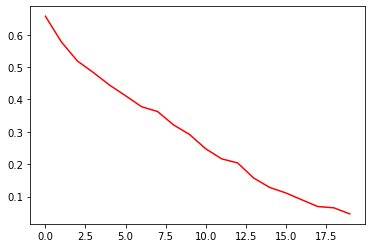

In [11]:
# train the parameters
history = modeloCNN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1, validation_data=(X_test,y_test) )

# evaluate accuracy
train_acc = modeloCNN.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modeloCNN.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [12]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modeloCNN

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN.summary()
print(f'\nPrecisión:{test_acc}' ) 

MODELO:
-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                              

#### 2.3.2.- Modelo CNN 2

###### Definición del Modelo CNN 2

In [13]:
###### Definición del Modelo y Capas
modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')])

###### Compilación del Modelo
modeloCNN2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0013), metrics=['accuracy'])

Epoch 1/20
1094/1094 [==============================] - 17s 15ms/step - loss: 0.6780 - accuracy: 0.5666
Epoch 2/20
1094/1094 [==============================] - 17s 15ms/step - loss: 0.6262 - accuracy: 0.6493
Epoch 3/20
1094/1094 [==============================] - 17s 15ms/step - loss: 0.5682 - accuracy: 0.7079
Epoch 4/20
1094/1094 [==============================] - 17s 16ms/step - loss: 0.5204 - accuracy: 0.7437
Epoch 5/20
1094/1094 [==============================] - 17s 16ms/step - loss: 0.4821 - accuracy: 0.7697
Epoch 6/20
1094/1094 [==============================] - 17s 16ms/step - loss: 0.4532 - accuracy: 0.7884
Epoch 7/20
1094/1094 [==============================] - 17s 15ms/step - loss: 0.4319 - accuracy: 0.7995
Epoch 8/20
1094/1094 [==============================] - 16s 15ms/step - loss: 0.4086 - accuracy: 0.8111
Epoch 9/20
1094/1094 [==============================] - 17s 16ms/step - loss: 0.3914 - accuracy: 0.8217
Epoch 10/20
1094/1094 [==============================] - 17s 15m

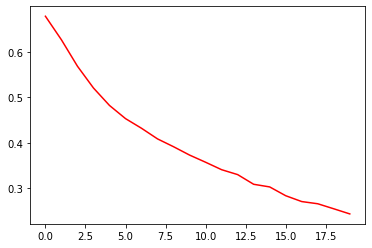

In [14]:
# train the parameters
history = modeloCNN2.fit(X_train, y_train, epochs=epochs, batch_size=16)

# evaluate accuracy
train_acc = modeloCNN2.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modeloCNN2.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [15]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modeloCNN2

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN2.summary()
print(f'\nPrecisión:{test_acc}' ) 

MODELO:
-------------------------------------------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                            

## 3.- LSTM

### 3.1.- Procesamiento de Imagenes para LSTM

##### Visualización de Imagen en Monocromático

(199, 187)

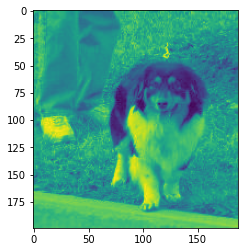

In [16]:
img = Image.open(folder + 'dog.' + str(i) + '.jpg')
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
image = imread('test_gray.jpg')
pyplot.imshow(image)
image.shape

###### Conversión de Imagenes a arreglo de pixeles monocromáticos

In [ ]:
imgGrays = list()
labelsGray = list()
for file in listdir(folder):   # en versión final se debe reemplazar por file in listdir(folder), hay que probar
    img = load_img(folder + file, target_size=(40, 40))
    print(folder + file)
    #img = Image.open(folder + file)
    imgGray = img.convert('L')
    imgGray = img_to_array(imgGray)
    imgGrays.append(imgGray)
    if file.startswith('dog'):
        labelGray = 1.0
        labelsGray.append(label)
    if file.startswith('cat'):
        labelGray = 0.0
        labelsGray.append(labelGray)
imgGrays = asarray(imgGrays)
labelsGray = asarray(labelsGray)
print(imgGrays.shape, labelsGray.shape)


dogs-vs-cats/train/cat.0.jpg
dogs-vs-cats/train/cat.1.jpg
dogs-vs-cats/train/cat.10.jpg
dogs-vs-cats/train/cat.100.jpg
dogs-vs-cats/train/cat.1000.jpg
dogs-vs-cats/train/cat.10000.jpg
dogs-vs-cats/train/cat.10001.jpg
dogs-vs-cats/train/cat.10002.jpg
dogs-vs-cats/train/cat.10003.jpg
dogs-vs-cats/train/cat.10004.jpg
dogs-vs-cats/train/cat.10005.jpg
dogs-vs-cats/train/cat.10006.jpg
dogs-vs-cats/train/cat.10007.jpg
dogs-vs-cats/train/cat.10008.jpg
dogs-vs-cats/train/cat.10009.jpg
dogs-vs-cats/train/cat.1001.jpg
dogs-vs-cats/train/cat.10010.jpg
dogs-vs-cats/train/cat.10011.jpg
dogs-vs-cats/train/cat.10012.jpg
dogs-vs-cats/train/cat.10013.jpg
dogs-vs-cats/train/cat.10014.jpg
dogs-vs-cats/train/cat.10015.jpg
dogs-vs-cats/train/cat.10016.jpg
dogs-vs-cats/train/cat.10017.jpg
dogs-vs-cats/train/cat.10018.jpg
dogs-vs-cats/train/cat.10019.jpg
dogs-vs-cats/train/cat.1002.jpg
dogs-vs-cats/train/cat.10020.jpg
dogs-vs-cats/train/cat.10021.jpg
dogs-vs-cats/train/cat.10022.jpg
dogs-vs-cats/train/cat.100

dogs-vs-cats/train/cat.10258.jpg
dogs-vs-cats/train/cat.10259.jpg
dogs-vs-cats/train/cat.1026.jpg
dogs-vs-cats/train/cat.10260.jpg
dogs-vs-cats/train/cat.10261.jpg
dogs-vs-cats/train/cat.10262.jpg
dogs-vs-cats/train/cat.10263.jpg
dogs-vs-cats/train/cat.10264.jpg
dogs-vs-cats/train/cat.10265.jpg
dogs-vs-cats/train/cat.10266.jpg
dogs-vs-cats/train/cat.10267.jpg
dogs-vs-cats/train/cat.10268.jpg
dogs-vs-cats/train/cat.10269.jpg
dogs-vs-cats/train/cat.1027.jpg
dogs-vs-cats/train/cat.10270.jpg
dogs-vs-cats/train/cat.10271.jpg
dogs-vs-cats/train/cat.10272.jpg
dogs-vs-cats/train/cat.10273.jpg
dogs-vs-cats/train/cat.10274.jpg
dogs-vs-cats/train/cat.10275.jpg
dogs-vs-cats/train/cat.10276.jpg
dogs-vs-cats/train/cat.10277.jpg
dogs-vs-cats/train/cat.10278.jpg
dogs-vs-cats/train/cat.10279.jpg
dogs-vs-cats/train/cat.1028.jpg
dogs-vs-cats/train/cat.10280.jpg
dogs-vs-cats/train/cat.10281.jpg
dogs-vs-cats/train/cat.10282.jpg
dogs-vs-cats/train/cat.10283.jpg
dogs-vs-cats/train/cat.10284.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.10536.jpg
dogs-vs-cats/train/cat.10537.jpg
dogs-vs-cats/train/cat.10538.jpg
dogs-vs-cats/train/cat.10539.jpg
dogs-vs-cats/train/cat.1054.jpg
dogs-vs-cats/train/cat.10540.jpg
dogs-vs-cats/train/cat.10541.jpg
dogs-vs-cats/train/cat.10542.jpg
dogs-vs-cats/train/cat.10543.jpg
dogs-vs-cats/train/cat.10544.jpg
dogs-vs-cats/train/cat.10545.jpg
dogs-vs-cats/train/cat.10546.jpg
dogs-vs-cats/train/cat.10547.jpg
dogs-vs-cats/train/cat.10548.jpg
dogs-vs-cats/train/cat.10549.jpg
dogs-vs-cats/train/cat.1055.jpg
dogs-vs-cats/train/cat.10550.jpg
dogs-vs-cats/train/cat.10551.jpg
dogs-vs-cats/train/cat.10552.jpg
dogs-vs-cats/train/cat.10553.jpg
dogs-vs-cats/train/cat.10554.jpg
dogs-vs-cats/train/cat.10555.jpg
dogs-vs-cats/train/cat.10556.jpg
dogs-vs-cats/train/cat.10557.jpg
dogs-vs-cats/train/cat.10558.jpg
dogs-vs-cats/train/cat.10559.jpg
dogs-vs-cats/train/cat.1056.jpg
dogs-vs-cats/train/cat.10560.jpg
dogs-vs-cats/train/cat.10561.jpg
dogs-vs-cats/train/cat.10562.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.10783.jpg
dogs-vs-cats/train/cat.10784.jpg
dogs-vs-cats/train/cat.10785.jpg
dogs-vs-cats/train/cat.10786.jpg
dogs-vs-cats/train/cat.10787.jpg
dogs-vs-cats/train/cat.10788.jpg
dogs-vs-cats/train/cat.10789.jpg
dogs-vs-cats/train/cat.1079.jpg
dogs-vs-cats/train/cat.10790.jpg
dogs-vs-cats/train/cat.10791.jpg
dogs-vs-cats/train/cat.10792.jpg
dogs-vs-cats/train/cat.10793.jpg
dogs-vs-cats/train/cat.10794.jpg
dogs-vs-cats/train/cat.10795.jpg
dogs-vs-cats/train/cat.10796.jpg
dogs-vs-cats/train/cat.10797.jpg
dogs-vs-cats/train/cat.10798.jpg
dogs-vs-cats/train/cat.10799.jpg
dogs-vs-cats/train/cat.108.jpg
dogs-vs-cats/train/cat.1080.jpg
dogs-vs-cats/train/cat.10800.jpg
dogs-vs-cats/train/cat.10801.jpg
dogs-vs-cats/train/cat.10802.jpg
dogs-vs-cats/train/cat.10803.jpg
dogs-vs-cats/train/cat.10804.jpg
dogs-vs-cats/train/cat.10805.jpg
dogs-vs-cats/train/cat.10806.jpg
dogs-vs-cats/train/cat.10807.jpg
dogs-vs-cats/train/cat.10808.jpg
dogs-vs-cats/train/cat.10809.jpg
dogs-vs-cats/t

dogs-vs-cats/train/cat.11037.jpg
dogs-vs-cats/train/cat.11038.jpg
dogs-vs-cats/train/cat.11039.jpg
dogs-vs-cats/train/cat.1104.jpg
dogs-vs-cats/train/cat.11040.jpg
dogs-vs-cats/train/cat.11041.jpg
dogs-vs-cats/train/cat.11042.jpg
dogs-vs-cats/train/cat.11043.jpg
dogs-vs-cats/train/cat.11044.jpg
dogs-vs-cats/train/cat.11045.jpg
dogs-vs-cats/train/cat.11046.jpg
dogs-vs-cats/train/cat.11047.jpg
dogs-vs-cats/train/cat.11048.jpg
dogs-vs-cats/train/cat.11049.jpg
dogs-vs-cats/train/cat.1105.jpg
dogs-vs-cats/train/cat.11050.jpg
dogs-vs-cats/train/cat.11051.jpg
dogs-vs-cats/train/cat.11052.jpg
dogs-vs-cats/train/cat.11053.jpg
dogs-vs-cats/train/cat.11054.jpg
dogs-vs-cats/train/cat.11055.jpg
dogs-vs-cats/train/cat.11056.jpg
dogs-vs-cats/train/cat.11057.jpg
dogs-vs-cats/train/cat.11058.jpg
dogs-vs-cats/train/cat.11059.jpg
dogs-vs-cats/train/cat.1106.jpg
dogs-vs-cats/train/cat.11060.jpg
dogs-vs-cats/train/cat.11061.jpg
dogs-vs-cats/train/cat.11062.jpg
dogs-vs-cats/train/cat.11063.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11281.jpg
dogs-vs-cats/train/cat.11282.jpg
dogs-vs-cats/train/cat.11283.jpg
dogs-vs-cats/train/cat.11284.jpg
dogs-vs-cats/train/cat.11285.jpg
dogs-vs-cats/train/cat.11286.jpg
dogs-vs-cats/train/cat.11287.jpg
dogs-vs-cats/train/cat.11288.jpg
dogs-vs-cats/train/cat.11289.jpg
dogs-vs-cats/train/cat.1129.jpg
dogs-vs-cats/train/cat.11290.jpg
dogs-vs-cats/train/cat.11291.jpg
dogs-vs-cats/train/cat.11292.jpg
dogs-vs-cats/train/cat.11293.jpg
dogs-vs-cats/train/cat.11294.jpg
dogs-vs-cats/train/cat.11295.jpg
dogs-vs-cats/train/cat.11296.jpg
dogs-vs-cats/train/cat.11297.jpg
dogs-vs-cats/train/cat.11298.jpg
dogs-vs-cats/train/cat.11299.jpg
dogs-vs-cats/train/cat.113.jpg
dogs-vs-cats/train/cat.1130.jpg
dogs-vs-cats/train/cat.11300.jpg
dogs-vs-cats/train/cat.11301.jpg
dogs-vs-cats/train/cat.11302.jpg
dogs-vs-cats/train/cat.11303.jpg
dogs-vs-cats/train/cat.11304.jpg
dogs-vs-cats/train/cat.11305.jpg
dogs-vs-cats/train/cat.11306.jpg
dogs-vs-cats/train/cat.11307.jpg
dogs-vs-cats/t

dogs-vs-cats/train/cat.1155.jpg
dogs-vs-cats/train/cat.11550.jpg
dogs-vs-cats/train/cat.11551.jpg
dogs-vs-cats/train/cat.11552.jpg
dogs-vs-cats/train/cat.11553.jpg
dogs-vs-cats/train/cat.11554.jpg
dogs-vs-cats/train/cat.11555.jpg
dogs-vs-cats/train/cat.11556.jpg
dogs-vs-cats/train/cat.11557.jpg
dogs-vs-cats/train/cat.11558.jpg
dogs-vs-cats/train/cat.11559.jpg
dogs-vs-cats/train/cat.1156.jpg
dogs-vs-cats/train/cat.11560.jpg
dogs-vs-cats/train/cat.11561.jpg
dogs-vs-cats/train/cat.11562.jpg
dogs-vs-cats/train/cat.11563.jpg
dogs-vs-cats/train/cat.11564.jpg
dogs-vs-cats/train/cat.11565.jpg
dogs-vs-cats/train/cat.11566.jpg
dogs-vs-cats/train/cat.11567.jpg
dogs-vs-cats/train/cat.11568.jpg
dogs-vs-cats/train/cat.11569.jpg
dogs-vs-cats/train/cat.1157.jpg
dogs-vs-cats/train/cat.11570.jpg
dogs-vs-cats/train/cat.11571.jpg
dogs-vs-cats/train/cat.11572.jpg
dogs-vs-cats/train/cat.11573.jpg
dogs-vs-cats/train/cat.11574.jpg
dogs-vs-cats/train/cat.11575.jpg
dogs-vs-cats/train/cat.11576.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11778.jpg
dogs-vs-cats/train/cat.11779.jpg
dogs-vs-cats/train/cat.1178.jpg
dogs-vs-cats/train/cat.11780.jpg
dogs-vs-cats/train/cat.11781.jpg
dogs-vs-cats/train/cat.11782.jpg
dogs-vs-cats/train/cat.11783.jpg
dogs-vs-cats/train/cat.11784.jpg
dogs-vs-cats/train/cat.11785.jpg
dogs-vs-cats/train/cat.11786.jpg
dogs-vs-cats/train/cat.11787.jpg
dogs-vs-cats/train/cat.11788.jpg
dogs-vs-cats/train/cat.11789.jpg
dogs-vs-cats/train/cat.1179.jpg
dogs-vs-cats/train/cat.11790.jpg
dogs-vs-cats/train/cat.11791.jpg
dogs-vs-cats/train/cat.11792.jpg
dogs-vs-cats/train/cat.11793.jpg
dogs-vs-cats/train/cat.11794.jpg
dogs-vs-cats/train/cat.11795.jpg
dogs-vs-cats/train/cat.11796.jpg
dogs-vs-cats/train/cat.11797.jpg
dogs-vs-cats/train/cat.11798.jpg
dogs-vs-cats/train/cat.11799.jpg
dogs-vs-cats/train/cat.118.jpg
dogs-vs-cats/train/cat.1180.jpg
dogs-vs-cats/train/cat.11800.jpg
dogs-vs-cats/train/cat.11801.jpg
dogs-vs-cats/train/cat.11802.jpg
dogs-vs-cats/train/cat.11803.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.12034.jpg
dogs-vs-cats/train/cat.12035.jpg
dogs-vs-cats/train/cat.12036.jpg
dogs-vs-cats/train/cat.12037.jpg
dogs-vs-cats/train/cat.12038.jpg
dogs-vs-cats/train/cat.12039.jpg
dogs-vs-cats/train/cat.1204.jpg
dogs-vs-cats/train/cat.12040.jpg
dogs-vs-cats/train/cat.12041.jpg
dogs-vs-cats/train/cat.12042.jpg
dogs-vs-cats/train/cat.12043.jpg
dogs-vs-cats/train/cat.12044.jpg
dogs-vs-cats/train/cat.12045.jpg
dogs-vs-cats/train/cat.12046.jpg
dogs-vs-cats/train/cat.12047.jpg
dogs-vs-cats/train/cat.12048.jpg
dogs-vs-cats/train/cat.12049.jpg
dogs-vs-cats/train/cat.1205.jpg
dogs-vs-cats/train/cat.12050.jpg
dogs-vs-cats/train/cat.12051.jpg
dogs-vs-cats/train/cat.12052.jpg
dogs-vs-cats/train/cat.12053.jpg
dogs-vs-cats/train/cat.12054.jpg
dogs-vs-cats/train/cat.12055.jpg
dogs-vs-cats/train/cat.12056.jpg
dogs-vs-cats/train/cat.12057.jpg
dogs-vs-cats/train/cat.12058.jpg
dogs-vs-cats/train/cat.12059.jpg
dogs-vs-cats/train/cat.1206.jpg
dogs-vs-cats/train/cat.12060.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.12281.jpg
dogs-vs-cats/train/cat.12282.jpg
dogs-vs-cats/train/cat.12283.jpg
dogs-vs-cats/train/cat.12284.jpg
dogs-vs-cats/train/cat.12285.jpg
dogs-vs-cats/train/cat.12286.jpg
dogs-vs-cats/train/cat.12287.jpg
dogs-vs-cats/train/cat.12288.jpg
dogs-vs-cats/train/cat.12289.jpg
dogs-vs-cats/train/cat.1229.jpg
dogs-vs-cats/train/cat.12290.jpg
dogs-vs-cats/train/cat.12291.jpg
dogs-vs-cats/train/cat.12292.jpg
dogs-vs-cats/train/cat.12293.jpg
dogs-vs-cats/train/cat.12294.jpg
dogs-vs-cats/train/cat.12295.jpg
dogs-vs-cats/train/cat.12296.jpg
dogs-vs-cats/train/cat.12297.jpg
dogs-vs-cats/train/cat.12298.jpg
dogs-vs-cats/train/cat.12299.jpg
dogs-vs-cats/train/cat.123.jpg
dogs-vs-cats/train/cat.1230.jpg
dogs-vs-cats/train/cat.12300.jpg
dogs-vs-cats/train/cat.12301.jpg
dogs-vs-cats/train/cat.12302.jpg
dogs-vs-cats/train/cat.12303.jpg
dogs-vs-cats/train/cat.12304.jpg
dogs-vs-cats/train/cat.12305.jpg
dogs-vs-cats/train/cat.12306.jpg
dogs-vs-cats/train/cat.12307.jpg
dogs-vs-cats/t

dogs-vs-cats/train/cat.1284.jpg
dogs-vs-cats/train/cat.1285.jpg
dogs-vs-cats/train/cat.1286.jpg
dogs-vs-cats/train/cat.1287.jpg
dogs-vs-cats/train/cat.1288.jpg
dogs-vs-cats/train/cat.1289.jpg
dogs-vs-cats/train/cat.129.jpg
dogs-vs-cats/train/cat.1290.jpg
dogs-vs-cats/train/cat.1291.jpg
dogs-vs-cats/train/cat.1292.jpg
dogs-vs-cats/train/cat.1293.jpg
dogs-vs-cats/train/cat.1294.jpg
dogs-vs-cats/train/cat.1295.jpg
dogs-vs-cats/train/cat.1296.jpg
dogs-vs-cats/train/cat.1297.jpg
dogs-vs-cats/train/cat.1298.jpg
dogs-vs-cats/train/cat.1299.jpg
dogs-vs-cats/train/cat.13.jpg
dogs-vs-cats/train/cat.130.jpg
dogs-vs-cats/train/cat.1300.jpg
dogs-vs-cats/train/cat.1301.jpg
dogs-vs-cats/train/cat.1302.jpg
dogs-vs-cats/train/cat.1303.jpg
dogs-vs-cats/train/cat.1304.jpg
dogs-vs-cats/train/cat.1305.jpg
dogs-vs-cats/train/cat.1306.jpg
dogs-vs-cats/train/cat.1307.jpg
dogs-vs-cats/train/cat.1308.jpg
dogs-vs-cats/train/cat.1309.jpg
dogs-vs-cats/train/cat.131.jpg
dogs-vs-cats/train/cat.1310.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.152.jpg
dogs-vs-cats/train/cat.1520.jpg
dogs-vs-cats/train/cat.1521.jpg
dogs-vs-cats/train/cat.1522.jpg
dogs-vs-cats/train/cat.1523.jpg
dogs-vs-cats/train/cat.1524.jpg
dogs-vs-cats/train/cat.1525.jpg
dogs-vs-cats/train/cat.1526.jpg
dogs-vs-cats/train/cat.1527.jpg
dogs-vs-cats/train/cat.1528.jpg
dogs-vs-cats/train/cat.1529.jpg
dogs-vs-cats/train/cat.153.jpg
dogs-vs-cats/train/cat.1530.jpg
dogs-vs-cats/train/cat.1531.jpg
dogs-vs-cats/train/cat.1532.jpg
dogs-vs-cats/train/cat.1533.jpg
dogs-vs-cats/train/cat.1534.jpg
dogs-vs-cats/train/cat.1535.jpg
dogs-vs-cats/train/cat.1536.jpg
dogs-vs-cats/train/cat.1537.jpg
dogs-vs-cats/train/cat.1538.jpg
dogs-vs-cats/train/cat.1539.jpg
dogs-vs-cats/train/cat.154.jpg
dogs-vs-cats/train/cat.1540.jpg
dogs-vs-cats/train/cat.1541.jpg
dogs-vs-cats/train/cat.1542.jpg
dogs-vs-cats/train/cat.1543.jpg
dogs-vs-cats/train/cat.1544.jpg
dogs-vs-cats/train/cat.1545.jpg
dogs-vs-cats/train/cat.1546.jpg
dogs-vs-cats/train/cat.1547.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.178.jpg
dogs-vs-cats/train/cat.1780.jpg
dogs-vs-cats/train/cat.1781.jpg
dogs-vs-cats/train/cat.1782.jpg
dogs-vs-cats/train/cat.1783.jpg
dogs-vs-cats/train/cat.1784.jpg
dogs-vs-cats/train/cat.1785.jpg
dogs-vs-cats/train/cat.1786.jpg
dogs-vs-cats/train/cat.1787.jpg
dogs-vs-cats/train/cat.1788.jpg
dogs-vs-cats/train/cat.1789.jpg
dogs-vs-cats/train/cat.179.jpg
dogs-vs-cats/train/cat.1790.jpg
dogs-vs-cats/train/cat.1791.jpg
dogs-vs-cats/train/cat.1792.jpg
dogs-vs-cats/train/cat.1793.jpg
dogs-vs-cats/train/cat.1794.jpg
dogs-vs-cats/train/cat.1795.jpg
dogs-vs-cats/train/cat.1796.jpg
dogs-vs-cats/train/cat.1797.jpg
dogs-vs-cats/train/cat.1798.jpg
dogs-vs-cats/train/cat.1799.jpg
dogs-vs-cats/train/cat.18.jpg
dogs-vs-cats/train/cat.180.jpg
dogs-vs-cats/train/cat.1800.jpg
dogs-vs-cats/train/cat.1801.jpg
dogs-vs-cats/train/cat.1802.jpg
dogs-vs-cats/train/cat.1803.jpg
dogs-vs-cats/train/cat.1804.jpg
dogs-vs-cats/train/cat.1805.jpg
dogs-vs-cats/train/cat.1806.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.2035.jpg
dogs-vs-cats/train/cat.2036.jpg
dogs-vs-cats/train/cat.2037.jpg
dogs-vs-cats/train/cat.2038.jpg
dogs-vs-cats/train/cat.2039.jpg
dogs-vs-cats/train/cat.204.jpg
dogs-vs-cats/train/cat.2040.jpg
dogs-vs-cats/train/cat.2041.jpg
dogs-vs-cats/train/cat.2042.jpg
dogs-vs-cats/train/cat.2043.jpg
dogs-vs-cats/train/cat.2044.jpg
dogs-vs-cats/train/cat.2045.jpg
dogs-vs-cats/train/cat.2046.jpg
dogs-vs-cats/train/cat.2047.jpg
dogs-vs-cats/train/cat.2048.jpg
dogs-vs-cats/train/cat.2049.jpg
dogs-vs-cats/train/cat.205.jpg
dogs-vs-cats/train/cat.2050.jpg
dogs-vs-cats/train/cat.2051.jpg
dogs-vs-cats/train/cat.2052.jpg
dogs-vs-cats/train/cat.2053.jpg
dogs-vs-cats/train/cat.2054.jpg
dogs-vs-cats/train/cat.2055.jpg
dogs-vs-cats/train/cat.2056.jpg
dogs-vs-cats/train/cat.2057.jpg
dogs-vs-cats/train/cat.2058.jpg
dogs-vs-cats/train/cat.2059.jpg
dogs-vs-cats/train/cat.206.jpg
dogs-vs-cats/train/cat.2060.jpg
dogs-vs-cats/train/cat.2061.jpg
dogs-vs-cats/train/cat.2062.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2273.jpg
dogs-vs-cats/train/cat.2274.jpg
dogs-vs-cats/train/cat.2275.jpg
dogs-vs-cats/train/cat.2276.jpg
dogs-vs-cats/train/cat.2277.jpg
dogs-vs-cats/train/cat.2278.jpg
dogs-vs-cats/train/cat.2279.jpg
dogs-vs-cats/train/cat.228.jpg
dogs-vs-cats/train/cat.2280.jpg
dogs-vs-cats/train/cat.2281.jpg
dogs-vs-cats/train/cat.2282.jpg
dogs-vs-cats/train/cat.2283.jpg
dogs-vs-cats/train/cat.2284.jpg
dogs-vs-cats/train/cat.2285.jpg
dogs-vs-cats/train/cat.2286.jpg
dogs-vs-cats/train/cat.2287.jpg
dogs-vs-cats/train/cat.2288.jpg
dogs-vs-cats/train/cat.2289.jpg
dogs-vs-cats/train/cat.229.jpg
dogs-vs-cats/train/cat.2290.jpg
dogs-vs-cats/train/cat.2291.jpg
dogs-vs-cats/train/cat.2292.jpg
dogs-vs-cats/train/cat.2293.jpg
dogs-vs-cats/train/cat.2294.jpg
dogs-vs-cats/train/cat.2295.jpg
dogs-vs-cats/train/cat.2296.jpg
dogs-vs-cats/train/cat.2297.jpg
dogs-vs-cats/train/cat.2298.jpg
dogs-vs-cats/train/cat.2299.jpg
dogs-vs-cats/train/cat.23.jpg
dogs-vs-cats/train/cat.230.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.2504.jpg
dogs-vs-cats/train/cat.2505.jpg
dogs-vs-cats/train/cat.2506.jpg
dogs-vs-cats/train/cat.2507.jpg
dogs-vs-cats/train/cat.2508.jpg
dogs-vs-cats/train/cat.2509.jpg
dogs-vs-cats/train/cat.251.jpg
dogs-vs-cats/train/cat.2510.jpg
dogs-vs-cats/train/cat.2511.jpg
dogs-vs-cats/train/cat.2512.jpg
dogs-vs-cats/train/cat.2513.jpg
dogs-vs-cats/train/cat.2514.jpg
dogs-vs-cats/train/cat.2515.jpg
dogs-vs-cats/train/cat.2516.jpg
dogs-vs-cats/train/cat.2517.jpg
dogs-vs-cats/train/cat.2518.jpg
dogs-vs-cats/train/cat.2519.jpg
dogs-vs-cats/train/cat.252.jpg
dogs-vs-cats/train/cat.2520.jpg
dogs-vs-cats/train/cat.2521.jpg
dogs-vs-cats/train/cat.2522.jpg
dogs-vs-cats/train/cat.2523.jpg
dogs-vs-cats/train/cat.2524.jpg
dogs-vs-cats/train/cat.2525.jpg
dogs-vs-cats/train/cat.2526.jpg
dogs-vs-cats/train/cat.2527.jpg
dogs-vs-cats/train/cat.2528.jpg
dogs-vs-cats/train/cat.2529.jpg
dogs-vs-cats/train/cat.253.jpg
dogs-vs-cats/train/cat.2530.jpg
dogs-vs-cats/train/cat.2531.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2800.jpg
dogs-vs-cats/train/cat.2801.jpg
dogs-vs-cats/train/cat.2802.jpg
dogs-vs-cats/train/cat.2803.jpg
dogs-vs-cats/train/cat.2804.jpg
dogs-vs-cats/train/cat.2805.jpg
dogs-vs-cats/train/cat.2806.jpg
dogs-vs-cats/train/cat.2807.jpg
dogs-vs-cats/train/cat.2808.jpg
dogs-vs-cats/train/cat.2809.jpg
dogs-vs-cats/train/cat.281.jpg
dogs-vs-cats/train/cat.2810.jpg
dogs-vs-cats/train/cat.2811.jpg
dogs-vs-cats/train/cat.2812.jpg
dogs-vs-cats/train/cat.2813.jpg
dogs-vs-cats/train/cat.2814.jpg
dogs-vs-cats/train/cat.2815.jpg
dogs-vs-cats/train/cat.2816.jpg
dogs-vs-cats/train/cat.2817.jpg
dogs-vs-cats/train/cat.2818.jpg
dogs-vs-cats/train/cat.2819.jpg
dogs-vs-cats/train/cat.282.jpg
dogs-vs-cats/train/cat.2820.jpg
dogs-vs-cats/train/cat.2821.jpg
dogs-vs-cats/train/cat.2822.jpg
dogs-vs-cats/train/cat.2823.jpg
dogs-vs-cats/train/cat.2824.jpg
dogs-vs-cats/train/cat.2825.jpg
dogs-vs-cats/train/cat.2826.jpg
dogs-vs-cats/train/cat.2827.jpg
dogs-vs-cats/train/cat.2828.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.3045.jpg
dogs-vs-cats/train/cat.3046.jpg
dogs-vs-cats/train/cat.3047.jpg
dogs-vs-cats/train/cat.3048.jpg
dogs-vs-cats/train/cat.3049.jpg
dogs-vs-cats/train/cat.305.jpg
dogs-vs-cats/train/cat.3050.jpg
dogs-vs-cats/train/cat.3051.jpg
dogs-vs-cats/train/cat.3052.jpg
dogs-vs-cats/train/cat.3053.jpg
dogs-vs-cats/train/cat.3054.jpg
dogs-vs-cats/train/cat.3055.jpg
dogs-vs-cats/train/cat.3056.jpg
dogs-vs-cats/train/cat.3057.jpg
dogs-vs-cats/train/cat.3058.jpg
dogs-vs-cats/train/cat.3059.jpg
dogs-vs-cats/train/cat.306.jpg
dogs-vs-cats/train/cat.3060.jpg
dogs-vs-cats/train/cat.3061.jpg
dogs-vs-cats/train/cat.3062.jpg
dogs-vs-cats/train/cat.3063.jpg
dogs-vs-cats/train/cat.3064.jpg
dogs-vs-cats/train/cat.3065.jpg
dogs-vs-cats/train/cat.3066.jpg
dogs-vs-cats/train/cat.3067.jpg
dogs-vs-cats/train/cat.3068.jpg
dogs-vs-cats/train/cat.3069.jpg
dogs-vs-cats/train/cat.307.jpg
dogs-vs-cats/train/cat.3070.jpg
dogs-vs-cats/train/cat.3071.jpg
dogs-vs-cats/train/cat.3072.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3292.jpg
dogs-vs-cats/train/cat.3293.jpg
dogs-vs-cats/train/cat.3294.jpg
dogs-vs-cats/train/cat.3295.jpg
dogs-vs-cats/train/cat.3296.jpg
dogs-vs-cats/train/cat.3297.jpg
dogs-vs-cats/train/cat.3298.jpg
dogs-vs-cats/train/cat.3299.jpg
dogs-vs-cats/train/cat.33.jpg
dogs-vs-cats/train/cat.330.jpg
dogs-vs-cats/train/cat.3300.jpg
dogs-vs-cats/train/cat.3301.jpg
dogs-vs-cats/train/cat.3302.jpg
dogs-vs-cats/train/cat.3303.jpg
dogs-vs-cats/train/cat.3304.jpg
dogs-vs-cats/train/cat.3305.jpg
dogs-vs-cats/train/cat.3306.jpg
dogs-vs-cats/train/cat.3307.jpg
dogs-vs-cats/train/cat.3308.jpg
dogs-vs-cats/train/cat.3309.jpg
dogs-vs-cats/train/cat.331.jpg
dogs-vs-cats/train/cat.3310.jpg
dogs-vs-cats/train/cat.3311.jpg
dogs-vs-cats/train/cat.3312.jpg
dogs-vs-cats/train/cat.3313.jpg
dogs-vs-cats/train/cat.3314.jpg
dogs-vs-cats/train/cat.3315.jpg
dogs-vs-cats/train/cat.3316.jpg
dogs-vs-cats/train/cat.3317.jpg
dogs-vs-cats/train/cat.3318.jpg
dogs-vs-cats/train/cat.3319.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.3578.jpg
dogs-vs-cats/train/cat.3579.jpg
dogs-vs-cats/train/cat.358.jpg
dogs-vs-cats/train/cat.3580.jpg
dogs-vs-cats/train/cat.3581.jpg
dogs-vs-cats/train/cat.3582.jpg
dogs-vs-cats/train/cat.3583.jpg
dogs-vs-cats/train/cat.3584.jpg
dogs-vs-cats/train/cat.3585.jpg
dogs-vs-cats/train/cat.3586.jpg
dogs-vs-cats/train/cat.3587.jpg
dogs-vs-cats/train/cat.3588.jpg
dogs-vs-cats/train/cat.3589.jpg
dogs-vs-cats/train/cat.359.jpg
dogs-vs-cats/train/cat.3590.jpg
dogs-vs-cats/train/cat.3591.jpg
dogs-vs-cats/train/cat.3592.jpg
dogs-vs-cats/train/cat.3593.jpg
dogs-vs-cats/train/cat.3594.jpg
dogs-vs-cats/train/cat.3595.jpg
dogs-vs-cats/train/cat.3596.jpg
dogs-vs-cats/train/cat.3597.jpg
dogs-vs-cats/train/cat.3598.jpg
dogs-vs-cats/train/cat.3599.jpg
dogs-vs-cats/train/cat.36.jpg
dogs-vs-cats/train/cat.360.jpg
dogs-vs-cats/train/cat.3600.jpg
dogs-vs-cats/train/cat.3601.jpg
dogs-vs-cats/train/cat.3602.jpg
dogs-vs-cats/train/cat.3603.jpg
dogs-vs-cats/train/cat.3604.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.3816.jpg
dogs-vs-cats/train/cat.3817.jpg
dogs-vs-cats/train/cat.3818.jpg
dogs-vs-cats/train/cat.3819.jpg
dogs-vs-cats/train/cat.382.jpg
dogs-vs-cats/train/cat.3820.jpg
dogs-vs-cats/train/cat.3821.jpg
dogs-vs-cats/train/cat.3822.jpg
dogs-vs-cats/train/cat.3823.jpg
dogs-vs-cats/train/cat.3824.jpg
dogs-vs-cats/train/cat.3825.jpg
dogs-vs-cats/train/cat.3826.jpg
dogs-vs-cats/train/cat.3827.jpg
dogs-vs-cats/train/cat.3828.jpg
dogs-vs-cats/train/cat.3829.jpg
dogs-vs-cats/train/cat.383.jpg
dogs-vs-cats/train/cat.3830.jpg
dogs-vs-cats/train/cat.3831.jpg
dogs-vs-cats/train/cat.3832.jpg
dogs-vs-cats/train/cat.3833.jpg
dogs-vs-cats/train/cat.3834.jpg
dogs-vs-cats/train/cat.3835.jpg
dogs-vs-cats/train/cat.3836.jpg
dogs-vs-cats/train/cat.3837.jpg
dogs-vs-cats/train/cat.3838.jpg
dogs-vs-cats/train/cat.3839.jpg
dogs-vs-cats/train/cat.384.jpg
dogs-vs-cats/train/cat.3840.jpg
dogs-vs-cats/train/cat.3841.jpg
dogs-vs-cats/train/cat.3842.jpg
dogs-vs-cats/train/cat.3843.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4063.jpg
dogs-vs-cats/train/cat.4064.jpg
dogs-vs-cats/train/cat.4065.jpg
dogs-vs-cats/train/cat.4066.jpg
dogs-vs-cats/train/cat.4067.jpg
dogs-vs-cats/train/cat.4068.jpg
dogs-vs-cats/train/cat.4069.jpg
dogs-vs-cats/train/cat.407.jpg
dogs-vs-cats/train/cat.4070.jpg
dogs-vs-cats/train/cat.4071.jpg
dogs-vs-cats/train/cat.4072.jpg
dogs-vs-cats/train/cat.4073.jpg
dogs-vs-cats/train/cat.4074.jpg
dogs-vs-cats/train/cat.4075.jpg
dogs-vs-cats/train/cat.4076.jpg
dogs-vs-cats/train/cat.4077.jpg
dogs-vs-cats/train/cat.4078.jpg
dogs-vs-cats/train/cat.4079.jpg
dogs-vs-cats/train/cat.408.jpg
dogs-vs-cats/train/cat.4080.jpg
dogs-vs-cats/train/cat.4081.jpg
dogs-vs-cats/train/cat.4082.jpg
dogs-vs-cats/train/cat.4083.jpg
dogs-vs-cats/train/cat.4084.jpg
dogs-vs-cats/train/cat.4085.jpg
dogs-vs-cats/train/cat.4086.jpg
dogs-vs-cats/train/cat.4087.jpg
dogs-vs-cats/train/cat.4088.jpg
dogs-vs-cats/train/cat.4089.jpg
dogs-vs-cats/train/cat.409.jpg
dogs-vs-cats/train/cat.4090.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4346.jpg
dogs-vs-cats/train/cat.4347.jpg
dogs-vs-cats/train/cat.4348.jpg
dogs-vs-cats/train/cat.4349.jpg
dogs-vs-cats/train/cat.435.jpg
dogs-vs-cats/train/cat.4350.jpg
dogs-vs-cats/train/cat.4351.jpg
dogs-vs-cats/train/cat.4352.jpg
dogs-vs-cats/train/cat.4353.jpg
dogs-vs-cats/train/cat.4354.jpg
dogs-vs-cats/train/cat.4355.jpg
dogs-vs-cats/train/cat.4356.jpg
dogs-vs-cats/train/cat.4357.jpg
dogs-vs-cats/train/cat.4358.jpg
dogs-vs-cats/train/cat.4359.jpg
dogs-vs-cats/train/cat.436.jpg
dogs-vs-cats/train/cat.4360.jpg
dogs-vs-cats/train/cat.4361.jpg
dogs-vs-cats/train/cat.4362.jpg
dogs-vs-cats/train/cat.4363.jpg
dogs-vs-cats/train/cat.4364.jpg
dogs-vs-cats/train/cat.4365.jpg
dogs-vs-cats/train/cat.4366.jpg
dogs-vs-cats/train/cat.4367.jpg
dogs-vs-cats/train/cat.4368.jpg
dogs-vs-cats/train/cat.4369.jpg
dogs-vs-cats/train/cat.437.jpg
dogs-vs-cats/train/cat.4370.jpg
dogs-vs-cats/train/cat.4371.jpg
dogs-vs-cats/train/cat.4372.jpg
dogs-vs-cats/train/cat.4373.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4579.jpg
dogs-vs-cats/train/cat.458.jpg
dogs-vs-cats/train/cat.4580.jpg
dogs-vs-cats/train/cat.4581.jpg
dogs-vs-cats/train/cat.4582.jpg
dogs-vs-cats/train/cat.4583.jpg
dogs-vs-cats/train/cat.4584.jpg
dogs-vs-cats/train/cat.4585.jpg
dogs-vs-cats/train/cat.4586.jpg
dogs-vs-cats/train/cat.4587.jpg
dogs-vs-cats/train/cat.4588.jpg
dogs-vs-cats/train/cat.4589.jpg
dogs-vs-cats/train/cat.459.jpg
dogs-vs-cats/train/cat.4590.jpg
dogs-vs-cats/train/cat.4591.jpg
dogs-vs-cats/train/cat.4592.jpg
dogs-vs-cats/train/cat.4593.jpg
dogs-vs-cats/train/cat.4594.jpg
dogs-vs-cats/train/cat.4595.jpg
dogs-vs-cats/train/cat.4596.jpg
dogs-vs-cats/train/cat.4597.jpg
dogs-vs-cats/train/cat.4598.jpg
dogs-vs-cats/train/cat.4599.jpg
dogs-vs-cats/train/cat.46.jpg
dogs-vs-cats/train/cat.460.jpg
dogs-vs-cats/train/cat.4600.jpg
dogs-vs-cats/train/cat.4601.jpg
dogs-vs-cats/train/cat.4602.jpg
dogs-vs-cats/train/cat.4603.jpg
dogs-vs-cats/train/cat.4604.jpg
dogs-vs-cats/train/cat.4605.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.4870.jpg
dogs-vs-cats/train/cat.4871.jpg
dogs-vs-cats/train/cat.4872.jpg
dogs-vs-cats/train/cat.4873.jpg
dogs-vs-cats/train/cat.4874.jpg
dogs-vs-cats/train/cat.4875.jpg
dogs-vs-cats/train/cat.4876.jpg
dogs-vs-cats/train/cat.4877.jpg
dogs-vs-cats/train/cat.4878.jpg
dogs-vs-cats/train/cat.4879.jpg
dogs-vs-cats/train/cat.488.jpg
dogs-vs-cats/train/cat.4880.jpg
dogs-vs-cats/train/cat.4881.jpg
dogs-vs-cats/train/cat.4882.jpg
dogs-vs-cats/train/cat.4883.jpg
dogs-vs-cats/train/cat.4884.jpg
dogs-vs-cats/train/cat.4885.jpg
dogs-vs-cats/train/cat.4886.jpg
dogs-vs-cats/train/cat.4887.jpg
dogs-vs-cats/train/cat.4888.jpg
dogs-vs-cats/train/cat.4889.jpg
dogs-vs-cats/train/cat.489.jpg
dogs-vs-cats/train/cat.4890.jpg
dogs-vs-cats/train/cat.4891.jpg
dogs-vs-cats/train/cat.4892.jpg
dogs-vs-cats/train/cat.4893.jpg
dogs-vs-cats/train/cat.4894.jpg
dogs-vs-cats/train/cat.4895.jpg
dogs-vs-cats/train/cat.4896.jpg
dogs-vs-cats/train/cat.4897.jpg
dogs-vs-cats/train/cat.4898.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.513.jpg
dogs-vs-cats/train/cat.5130.jpg
dogs-vs-cats/train/cat.5131.jpg
dogs-vs-cats/train/cat.5132.jpg
dogs-vs-cats/train/cat.5133.jpg
dogs-vs-cats/train/cat.5134.jpg
dogs-vs-cats/train/cat.5135.jpg
dogs-vs-cats/train/cat.5136.jpg
dogs-vs-cats/train/cat.5137.jpg
dogs-vs-cats/train/cat.5138.jpg
dogs-vs-cats/train/cat.5139.jpg
dogs-vs-cats/train/cat.514.jpg
dogs-vs-cats/train/cat.5140.jpg
dogs-vs-cats/train/cat.5141.jpg
dogs-vs-cats/train/cat.5142.jpg
dogs-vs-cats/train/cat.5143.jpg
dogs-vs-cats/train/cat.5144.jpg
dogs-vs-cats/train/cat.5145.jpg
dogs-vs-cats/train/cat.5146.jpg
dogs-vs-cats/train/cat.5147.jpg
dogs-vs-cats/train/cat.5148.jpg
dogs-vs-cats/train/cat.5149.jpg
dogs-vs-cats/train/cat.515.jpg
dogs-vs-cats/train/cat.5150.jpg
dogs-vs-cats/train/cat.5151.jpg
dogs-vs-cats/train/cat.5152.jpg
dogs-vs-cats/train/cat.5153.jpg
dogs-vs-cats/train/cat.5154.jpg
dogs-vs-cats/train/cat.5155.jpg
dogs-vs-cats/train/cat.5156.jpg
dogs-vs-cats/train/cat.5157.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5424.jpg
dogs-vs-cats/train/cat.5425.jpg
dogs-vs-cats/train/cat.5426.jpg
dogs-vs-cats/train/cat.5427.jpg
dogs-vs-cats/train/cat.5428.jpg
dogs-vs-cats/train/cat.5429.jpg
dogs-vs-cats/train/cat.543.jpg
dogs-vs-cats/train/cat.5430.jpg
dogs-vs-cats/train/cat.5431.jpg
dogs-vs-cats/train/cat.5432.jpg
dogs-vs-cats/train/cat.5433.jpg
dogs-vs-cats/train/cat.5434.jpg
dogs-vs-cats/train/cat.5435.jpg
dogs-vs-cats/train/cat.5436.jpg
dogs-vs-cats/train/cat.5437.jpg
dogs-vs-cats/train/cat.5438.jpg
dogs-vs-cats/train/cat.5439.jpg
dogs-vs-cats/train/cat.544.jpg
dogs-vs-cats/train/cat.5440.jpg
dogs-vs-cats/train/cat.5441.jpg
dogs-vs-cats/train/cat.5442.jpg
dogs-vs-cats/train/cat.5443.jpg
dogs-vs-cats/train/cat.5444.jpg
dogs-vs-cats/train/cat.5445.jpg
dogs-vs-cats/train/cat.5446.jpg
dogs-vs-cats/train/cat.5447.jpg
dogs-vs-cats/train/cat.5448.jpg
dogs-vs-cats/train/cat.5449.jpg
dogs-vs-cats/train/cat.545.jpg
dogs-vs-cats/train/cat.5450.jpg
dogs-vs-cats/train/cat.5451.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5697.jpg
dogs-vs-cats/train/cat.5698.jpg
dogs-vs-cats/train/cat.5699.jpg
dogs-vs-cats/train/cat.57.jpg
dogs-vs-cats/train/cat.570.jpg
dogs-vs-cats/train/cat.5700.jpg
dogs-vs-cats/train/cat.5701.jpg
dogs-vs-cats/train/cat.5702.jpg
dogs-vs-cats/train/cat.5703.jpg
dogs-vs-cats/train/cat.5704.jpg
dogs-vs-cats/train/cat.5705.jpg
dogs-vs-cats/train/cat.5706.jpg
dogs-vs-cats/train/cat.5707.jpg
dogs-vs-cats/train/cat.5708.jpg
dogs-vs-cats/train/cat.5709.jpg
dogs-vs-cats/train/cat.571.jpg
dogs-vs-cats/train/cat.5710.jpg
dogs-vs-cats/train/cat.5711.jpg
dogs-vs-cats/train/cat.5712.jpg
dogs-vs-cats/train/cat.5713.jpg
dogs-vs-cats/train/cat.5714.jpg
dogs-vs-cats/train/cat.5715.jpg
dogs-vs-cats/train/cat.5716.jpg
dogs-vs-cats/train/cat.5717.jpg
dogs-vs-cats/train/cat.5718.jpg
dogs-vs-cats/train/cat.5719.jpg
dogs-vs-cats/train/cat.572.jpg
dogs-vs-cats/train/cat.5720.jpg
dogs-vs-cats/train/cat.5721.jpg
dogs-vs-cats/train/cat.5722.jpg
dogs-vs-cats/train/cat.5723.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.5966.jpg
dogs-vs-cats/train/cat.5967.jpg
dogs-vs-cats/train/cat.5968.jpg
dogs-vs-cats/train/cat.5969.jpg
dogs-vs-cats/train/cat.597.jpg
dogs-vs-cats/train/cat.5970.jpg
dogs-vs-cats/train/cat.5971.jpg
dogs-vs-cats/train/cat.5972.jpg
dogs-vs-cats/train/cat.5973.jpg
dogs-vs-cats/train/cat.5974.jpg
dogs-vs-cats/train/cat.5975.jpg
dogs-vs-cats/train/cat.5976.jpg
dogs-vs-cats/train/cat.5977.jpg
dogs-vs-cats/train/cat.5978.jpg
dogs-vs-cats/train/cat.5979.jpg
dogs-vs-cats/train/cat.598.jpg
dogs-vs-cats/train/cat.5980.jpg
dogs-vs-cats/train/cat.5981.jpg
dogs-vs-cats/train/cat.5982.jpg
dogs-vs-cats/train/cat.5983.jpg
dogs-vs-cats/train/cat.5984.jpg
dogs-vs-cats/train/cat.5985.jpg
dogs-vs-cats/train/cat.5986.jpg
dogs-vs-cats/train/cat.5987.jpg
dogs-vs-cats/train/cat.5988.jpg
dogs-vs-cats/train/cat.5989.jpg
dogs-vs-cats/train/cat.599.jpg
dogs-vs-cats/train/cat.5990.jpg
dogs-vs-cats/train/cat.5991.jpg
dogs-vs-cats/train/cat.5992.jpg
dogs-vs-cats/train/cat.5993.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6228.jpg
dogs-vs-cats/train/cat.6229.jpg
dogs-vs-cats/train/cat.623.jpg
dogs-vs-cats/train/cat.6230.jpg
dogs-vs-cats/train/cat.6231.jpg
dogs-vs-cats/train/cat.6232.jpg
dogs-vs-cats/train/cat.6233.jpg
dogs-vs-cats/train/cat.6234.jpg
dogs-vs-cats/train/cat.6235.jpg
dogs-vs-cats/train/cat.6236.jpg
dogs-vs-cats/train/cat.6237.jpg
dogs-vs-cats/train/cat.6238.jpg
dogs-vs-cats/train/cat.6239.jpg
dogs-vs-cats/train/cat.624.jpg
dogs-vs-cats/train/cat.6240.jpg
dogs-vs-cats/train/cat.6241.jpg
dogs-vs-cats/train/cat.6242.jpg
dogs-vs-cats/train/cat.6243.jpg
dogs-vs-cats/train/cat.6244.jpg
dogs-vs-cats/train/cat.6245.jpg
dogs-vs-cats/train/cat.6246.jpg
dogs-vs-cats/train/cat.6247.jpg
dogs-vs-cats/train/cat.6248.jpg
dogs-vs-cats/train/cat.6249.jpg
dogs-vs-cats/train/cat.625.jpg
dogs-vs-cats/train/cat.6250.jpg
dogs-vs-cats/train/cat.6251.jpg
dogs-vs-cats/train/cat.6252.jpg
dogs-vs-cats/train/cat.6253.jpg
dogs-vs-cats/train/cat.6254.jpg
dogs-vs-cats/train/cat.6255.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6469.jpg
dogs-vs-cats/train/cat.647.jpg
dogs-vs-cats/train/cat.6470.jpg
dogs-vs-cats/train/cat.6471.jpg
dogs-vs-cats/train/cat.6472.jpg
dogs-vs-cats/train/cat.6473.jpg
dogs-vs-cats/train/cat.6474.jpg
dogs-vs-cats/train/cat.6475.jpg
dogs-vs-cats/train/cat.6476.jpg
dogs-vs-cats/train/cat.6477.jpg
dogs-vs-cats/train/cat.6478.jpg
dogs-vs-cats/train/cat.6479.jpg
dogs-vs-cats/train/cat.648.jpg
dogs-vs-cats/train/cat.6480.jpg
dogs-vs-cats/train/cat.6481.jpg
dogs-vs-cats/train/cat.6482.jpg
dogs-vs-cats/train/cat.6483.jpg
dogs-vs-cats/train/cat.6484.jpg
dogs-vs-cats/train/cat.6485.jpg
dogs-vs-cats/train/cat.6486.jpg
dogs-vs-cats/train/cat.6487.jpg
dogs-vs-cats/train/cat.6488.jpg
dogs-vs-cats/train/cat.6489.jpg
dogs-vs-cats/train/cat.649.jpg
dogs-vs-cats/train/cat.6490.jpg
dogs-vs-cats/train/cat.6491.jpg
dogs-vs-cats/train/cat.6492.jpg
dogs-vs-cats/train/cat.6493.jpg
dogs-vs-cats/train/cat.6494.jpg
dogs-vs-cats/train/cat.6495.jpg
dogs-vs-cats/train/cat.6496.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6756.jpg
dogs-vs-cats/train/cat.6757.jpg
dogs-vs-cats/train/cat.6758.jpg
dogs-vs-cats/train/cat.6759.jpg
dogs-vs-cats/train/cat.676.jpg
dogs-vs-cats/train/cat.6760.jpg
dogs-vs-cats/train/cat.6761.jpg
dogs-vs-cats/train/cat.6762.jpg
dogs-vs-cats/train/cat.6763.jpg
dogs-vs-cats/train/cat.6764.jpg
dogs-vs-cats/train/cat.6765.jpg
dogs-vs-cats/train/cat.6766.jpg
dogs-vs-cats/train/cat.6767.jpg
dogs-vs-cats/train/cat.6768.jpg
dogs-vs-cats/train/cat.6769.jpg
dogs-vs-cats/train/cat.677.jpg
dogs-vs-cats/train/cat.6770.jpg
dogs-vs-cats/train/cat.6771.jpg
dogs-vs-cats/train/cat.6772.jpg
dogs-vs-cats/train/cat.6773.jpg
dogs-vs-cats/train/cat.6774.jpg
dogs-vs-cats/train/cat.6775.jpg
dogs-vs-cats/train/cat.6776.jpg
dogs-vs-cats/train/cat.6777.jpg
dogs-vs-cats/train/cat.6778.jpg
dogs-vs-cats/train/cat.6779.jpg
dogs-vs-cats/train/cat.678.jpg
dogs-vs-cats/train/cat.6780.jpg
dogs-vs-cats/train/cat.6781.jpg
dogs-vs-cats/train/cat.6782.jpg
dogs-vs-cats/train/cat.6783.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7042.jpg
dogs-vs-cats/train/cat.7043.jpg
dogs-vs-cats/train/cat.7044.jpg
dogs-vs-cats/train/cat.7045.jpg
dogs-vs-cats/train/cat.7046.jpg
dogs-vs-cats/train/cat.7047.jpg
dogs-vs-cats/train/cat.7048.jpg
dogs-vs-cats/train/cat.7049.jpg
dogs-vs-cats/train/cat.705.jpg
dogs-vs-cats/train/cat.7050.jpg
dogs-vs-cats/train/cat.7051.jpg
dogs-vs-cats/train/cat.7052.jpg
dogs-vs-cats/train/cat.7053.jpg
dogs-vs-cats/train/cat.7054.jpg
dogs-vs-cats/train/cat.7055.jpg
dogs-vs-cats/train/cat.7056.jpg
dogs-vs-cats/train/cat.7057.jpg
dogs-vs-cats/train/cat.7058.jpg
dogs-vs-cats/train/cat.7059.jpg
dogs-vs-cats/train/cat.706.jpg
dogs-vs-cats/train/cat.7060.jpg
dogs-vs-cats/train/cat.7061.jpg
dogs-vs-cats/train/cat.7062.jpg
dogs-vs-cats/train/cat.7063.jpg
dogs-vs-cats/train/cat.7064.jpg
dogs-vs-cats/train/cat.7065.jpg
dogs-vs-cats/train/cat.7066.jpg
dogs-vs-cats/train/cat.7067.jpg
dogs-vs-cats/train/cat.7068.jpg
dogs-vs-cats/train/cat.7069.jpg
dogs-vs-cats/train/cat.707.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7302.jpg
dogs-vs-cats/train/cat.7303.jpg
dogs-vs-cats/train/cat.7304.jpg
dogs-vs-cats/train/cat.7305.jpg
dogs-vs-cats/train/cat.7306.jpg
dogs-vs-cats/train/cat.7307.jpg
dogs-vs-cats/train/cat.7308.jpg
dogs-vs-cats/train/cat.7309.jpg
dogs-vs-cats/train/cat.731.jpg
dogs-vs-cats/train/cat.7310.jpg
dogs-vs-cats/train/cat.7311.jpg
dogs-vs-cats/train/cat.7312.jpg
dogs-vs-cats/train/cat.7313.jpg
dogs-vs-cats/train/cat.7314.jpg
dogs-vs-cats/train/cat.7315.jpg
dogs-vs-cats/train/cat.7316.jpg
dogs-vs-cats/train/cat.7317.jpg
dogs-vs-cats/train/cat.7318.jpg
dogs-vs-cats/train/cat.7319.jpg
dogs-vs-cats/train/cat.732.jpg
dogs-vs-cats/train/cat.7320.jpg
dogs-vs-cats/train/cat.7321.jpg
dogs-vs-cats/train/cat.7322.jpg
dogs-vs-cats/train/cat.7323.jpg
dogs-vs-cats/train/cat.7324.jpg
dogs-vs-cats/train/cat.7325.jpg
dogs-vs-cats/train/cat.7326.jpg
dogs-vs-cats/train/cat.7327.jpg
dogs-vs-cats/train/cat.7328.jpg
dogs-vs-cats/train/cat.7329.jpg
dogs-vs-cats/train/cat.733.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7573.jpg
dogs-vs-cats/train/cat.7574.jpg
dogs-vs-cats/train/cat.7575.jpg
dogs-vs-cats/train/cat.7576.jpg
dogs-vs-cats/train/cat.7577.jpg
dogs-vs-cats/train/cat.7578.jpg
dogs-vs-cats/train/cat.7579.jpg
dogs-vs-cats/train/cat.758.jpg
dogs-vs-cats/train/cat.7580.jpg
dogs-vs-cats/train/cat.7581.jpg
dogs-vs-cats/train/cat.7582.jpg
dogs-vs-cats/train/cat.7583.jpg
dogs-vs-cats/train/cat.7584.jpg
dogs-vs-cats/train/cat.7585.jpg
dogs-vs-cats/train/cat.7586.jpg
dogs-vs-cats/train/cat.7587.jpg
dogs-vs-cats/train/cat.7588.jpg
dogs-vs-cats/train/cat.7589.jpg
dogs-vs-cats/train/cat.759.jpg
dogs-vs-cats/train/cat.7590.jpg
dogs-vs-cats/train/cat.7591.jpg
dogs-vs-cats/train/cat.7592.jpg
dogs-vs-cats/train/cat.7593.jpg
dogs-vs-cats/train/cat.7594.jpg
dogs-vs-cats/train/cat.7595.jpg
dogs-vs-cats/train/cat.7596.jpg
dogs-vs-cats/train/cat.7597.jpg
dogs-vs-cats/train/cat.7598.jpg
dogs-vs-cats/train/cat.7599.jpg
dogs-vs-cats/train/cat.76.jpg
dogs-vs-cats/train/cat.760.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.7853.jpg
dogs-vs-cats/train/cat.7854.jpg
dogs-vs-cats/train/cat.7855.jpg
dogs-vs-cats/train/cat.7856.jpg
dogs-vs-cats/train/cat.7857.jpg
dogs-vs-cats/train/cat.7858.jpg
dogs-vs-cats/train/cat.7859.jpg
dogs-vs-cats/train/cat.786.jpg
dogs-vs-cats/train/cat.7860.jpg
dogs-vs-cats/train/cat.7861.jpg
dogs-vs-cats/train/cat.7862.jpg
dogs-vs-cats/train/cat.7863.jpg
dogs-vs-cats/train/cat.7864.jpg
dogs-vs-cats/train/cat.7865.jpg
dogs-vs-cats/train/cat.7866.jpg
dogs-vs-cats/train/cat.7867.jpg
dogs-vs-cats/train/cat.7868.jpg
dogs-vs-cats/train/cat.7869.jpg
dogs-vs-cats/train/cat.787.jpg
dogs-vs-cats/train/cat.7870.jpg
dogs-vs-cats/train/cat.7871.jpg
dogs-vs-cats/train/cat.7872.jpg
dogs-vs-cats/train/cat.7873.jpg
dogs-vs-cats/train/cat.7874.jpg
dogs-vs-cats/train/cat.7875.jpg
dogs-vs-cats/train/cat.7876.jpg
dogs-vs-cats/train/cat.7877.jpg
dogs-vs-cats/train/cat.7878.jpg
dogs-vs-cats/train/cat.7879.jpg
dogs-vs-cats/train/cat.788.jpg
dogs-vs-cats/train/cat.7880.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8089.jpg
dogs-vs-cats/train/cat.809.jpg
dogs-vs-cats/train/cat.8090.jpg
dogs-vs-cats/train/cat.8091.jpg
dogs-vs-cats/train/cat.8092.jpg
dogs-vs-cats/train/cat.8093.jpg
dogs-vs-cats/train/cat.8094.jpg
dogs-vs-cats/train/cat.8095.jpg
dogs-vs-cats/train/cat.8096.jpg
dogs-vs-cats/train/cat.8097.jpg
dogs-vs-cats/train/cat.8098.jpg
dogs-vs-cats/train/cat.8099.jpg
dogs-vs-cats/train/cat.81.jpg
dogs-vs-cats/train/cat.810.jpg
dogs-vs-cats/train/cat.8100.jpg
dogs-vs-cats/train/cat.8101.jpg
dogs-vs-cats/train/cat.8102.jpg
dogs-vs-cats/train/cat.8103.jpg
dogs-vs-cats/train/cat.8104.jpg
dogs-vs-cats/train/cat.8105.jpg
dogs-vs-cats/train/cat.8106.jpg
dogs-vs-cats/train/cat.8107.jpg
dogs-vs-cats/train/cat.8108.jpg
dogs-vs-cats/train/cat.8109.jpg
dogs-vs-cats/train/cat.811.jpg
dogs-vs-cats/train/cat.8110.jpg
dogs-vs-cats/train/cat.8111.jpg
dogs-vs-cats/train/cat.8112.jpg
dogs-vs-cats/train/cat.8113.jpg
dogs-vs-cats/train/cat.8114.jpg
dogs-vs-cats/train/cat.8115.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.8349.jpg
dogs-vs-cats/train/cat.835.jpg
dogs-vs-cats/train/cat.8350.jpg
dogs-vs-cats/train/cat.8351.jpg
dogs-vs-cats/train/cat.8352.jpg
dogs-vs-cats/train/cat.8353.jpg
dogs-vs-cats/train/cat.8354.jpg
dogs-vs-cats/train/cat.8355.jpg
dogs-vs-cats/train/cat.8356.jpg
dogs-vs-cats/train/cat.8357.jpg
dogs-vs-cats/train/cat.8358.jpg
dogs-vs-cats/train/cat.8359.jpg
dogs-vs-cats/train/cat.836.jpg
dogs-vs-cats/train/cat.8360.jpg
dogs-vs-cats/train/cat.8361.jpg
dogs-vs-cats/train/cat.8362.jpg
dogs-vs-cats/train/cat.8363.jpg
dogs-vs-cats/train/cat.8364.jpg
dogs-vs-cats/train/cat.8365.jpg
dogs-vs-cats/train/cat.8366.jpg
dogs-vs-cats/train/cat.8367.jpg
dogs-vs-cats/train/cat.8368.jpg
dogs-vs-cats/train/cat.8369.jpg
dogs-vs-cats/train/cat.837.jpg
dogs-vs-cats/train/cat.8370.jpg
dogs-vs-cats/train/cat.8371.jpg
dogs-vs-cats/train/cat.8372.jpg
dogs-vs-cats/train/cat.8373.jpg
dogs-vs-cats/train/cat.8374.jpg
dogs-vs-cats/train/cat.8375.jpg
dogs-vs-cats/train/cat.8376.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8622.jpg
dogs-vs-cats/train/cat.8623.jpg
dogs-vs-cats/train/cat.8624.jpg
dogs-vs-cats/train/cat.8625.jpg
dogs-vs-cats/train/cat.8626.jpg
dogs-vs-cats/train/cat.8627.jpg
dogs-vs-cats/train/cat.8628.jpg
dogs-vs-cats/train/cat.8629.jpg
dogs-vs-cats/train/cat.863.jpg
dogs-vs-cats/train/cat.8630.jpg
dogs-vs-cats/train/cat.8631.jpg
dogs-vs-cats/train/cat.8632.jpg
dogs-vs-cats/train/cat.8633.jpg
dogs-vs-cats/train/cat.8634.jpg
dogs-vs-cats/train/cat.8635.jpg
dogs-vs-cats/train/cat.8636.jpg
dogs-vs-cats/train/cat.8637.jpg
dogs-vs-cats/train/cat.8638.jpg
dogs-vs-cats/train/cat.8639.jpg
dogs-vs-cats/train/cat.864.jpg
dogs-vs-cats/train/cat.8640.jpg
dogs-vs-cats/train/cat.8641.jpg
dogs-vs-cats/train/cat.8642.jpg
dogs-vs-cats/train/cat.8643.jpg
dogs-vs-cats/train/cat.8644.jpg
dogs-vs-cats/train/cat.8645.jpg
dogs-vs-cats/train/cat.8646.jpg
dogs-vs-cats/train/cat.8647.jpg
dogs-vs-cats/train/cat.8648.jpg
dogs-vs-cats/train/cat.8649.jpg
dogs-vs-cats/train/cat.865.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8908.jpg
dogs-vs-cats/train/cat.8909.jpg
dogs-vs-cats/train/cat.891.jpg
dogs-vs-cats/train/cat.8910.jpg
dogs-vs-cats/train/cat.8911.jpg
dogs-vs-cats/train/cat.8912.jpg
dogs-vs-cats/train/cat.8913.jpg
dogs-vs-cats/train/cat.8914.jpg
dogs-vs-cats/train/cat.8915.jpg
dogs-vs-cats/train/cat.8916.jpg
dogs-vs-cats/train/cat.8917.jpg
dogs-vs-cats/train/cat.8918.jpg
dogs-vs-cats/train/cat.8919.jpg
dogs-vs-cats/train/cat.892.jpg
dogs-vs-cats/train/cat.8920.jpg
dogs-vs-cats/train/cat.8921.jpg
dogs-vs-cats/train/cat.8922.jpg
dogs-vs-cats/train/cat.8923.jpg
dogs-vs-cats/train/cat.8924.jpg
dogs-vs-cats/train/cat.8925.jpg
dogs-vs-cats/train/cat.8926.jpg
dogs-vs-cats/train/cat.8927.jpg
dogs-vs-cats/train/cat.8928.jpg
dogs-vs-cats/train/cat.8929.jpg
dogs-vs-cats/train/cat.893.jpg
dogs-vs-cats/train/cat.8930.jpg
dogs-vs-cats/train/cat.8931.jpg
dogs-vs-cats/train/cat.8932.jpg
dogs-vs-cats/train/cat.8933.jpg
dogs-vs-cats/train/cat.8934.jpg
dogs-vs-cats/train/cat.8935.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9151.jpg
dogs-vs-cats/train/cat.9152.jpg
dogs-vs-cats/train/cat.9153.jpg
dogs-vs-cats/train/cat.9154.jpg
dogs-vs-cats/train/cat.9155.jpg
dogs-vs-cats/train/cat.9156.jpg
dogs-vs-cats/train/cat.9157.jpg
dogs-vs-cats/train/cat.9158.jpg
dogs-vs-cats/train/cat.9159.jpg
dogs-vs-cats/train/cat.916.jpg
dogs-vs-cats/train/cat.9160.jpg
dogs-vs-cats/train/cat.9161.jpg
dogs-vs-cats/train/cat.9162.jpg
dogs-vs-cats/train/cat.9163.jpg
dogs-vs-cats/train/cat.9164.jpg
dogs-vs-cats/train/cat.9165.jpg
dogs-vs-cats/train/cat.9166.jpg
dogs-vs-cats/train/cat.9167.jpg
dogs-vs-cats/train/cat.9168.jpg
dogs-vs-cats/train/cat.9169.jpg
dogs-vs-cats/train/cat.917.jpg
dogs-vs-cats/train/cat.9170.jpg
dogs-vs-cats/train/cat.9171.jpg
dogs-vs-cats/train/cat.9172.jpg
dogs-vs-cats/train/cat.9173.jpg
dogs-vs-cats/train/cat.9174.jpg
dogs-vs-cats/train/cat.9175.jpg
dogs-vs-cats/train/cat.9176.jpg
dogs-vs-cats/train/cat.9177.jpg
dogs-vs-cats/train/cat.9178.jpg
dogs-vs-cats/train/cat.9179.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.9386.jpg
dogs-vs-cats/train/cat.9387.jpg
dogs-vs-cats/train/cat.9388.jpg
dogs-vs-cats/train/cat.9389.jpg
dogs-vs-cats/train/cat.939.jpg
dogs-vs-cats/train/cat.9390.jpg
dogs-vs-cats/train/cat.9391.jpg
dogs-vs-cats/train/cat.9392.jpg
dogs-vs-cats/train/cat.9393.jpg
dogs-vs-cats/train/cat.9394.jpg
dogs-vs-cats/train/cat.9395.jpg
dogs-vs-cats/train/cat.9396.jpg
dogs-vs-cats/train/cat.9397.jpg
dogs-vs-cats/train/cat.9398.jpg
dogs-vs-cats/train/cat.9399.jpg
dogs-vs-cats/train/cat.94.jpg
dogs-vs-cats/train/cat.940.jpg
dogs-vs-cats/train/cat.9400.jpg
dogs-vs-cats/train/cat.9401.jpg
dogs-vs-cats/train/cat.9402.jpg
dogs-vs-cats/train/cat.9403.jpg
dogs-vs-cats/train/cat.9404.jpg
dogs-vs-cats/train/cat.9405.jpg
dogs-vs-cats/train/cat.9406.jpg
dogs-vs-cats/train/cat.9407.jpg
dogs-vs-cats/train/cat.9408.jpg
dogs-vs-cats/train/cat.9409.jpg
dogs-vs-cats/train/cat.941.jpg
dogs-vs-cats/train/cat.9410.jpg
dogs-vs-cats/train/cat.9411.jpg
dogs-vs-cats/train/cat.9412.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.9677.jpg
dogs-vs-cats/train/cat.9678.jpg
dogs-vs-cats/train/cat.9679.jpg
dogs-vs-cats/train/cat.968.jpg
dogs-vs-cats/train/cat.9680.jpg
dogs-vs-cats/train/cat.9681.jpg
dogs-vs-cats/train/cat.9682.jpg
dogs-vs-cats/train/cat.9683.jpg
dogs-vs-cats/train/cat.9684.jpg
dogs-vs-cats/train/cat.9685.jpg
dogs-vs-cats/train/cat.9686.jpg
dogs-vs-cats/train/cat.9687.jpg
dogs-vs-cats/train/cat.9688.jpg
dogs-vs-cats/train/cat.9689.jpg
dogs-vs-cats/train/cat.969.jpg
dogs-vs-cats/train/cat.9690.jpg
dogs-vs-cats/train/cat.9691.jpg
dogs-vs-cats/train/cat.9692.jpg
dogs-vs-cats/train/cat.9693.jpg
dogs-vs-cats/train/cat.9694.jpg
dogs-vs-cats/train/cat.9695.jpg
dogs-vs-cats/train/cat.9696.jpg
dogs-vs-cats/train/cat.9697.jpg
dogs-vs-cats/train/cat.9698.jpg
dogs-vs-cats/train/cat.9699.jpg
dogs-vs-cats/train/cat.97.jpg
dogs-vs-cats/train/cat.970.jpg
dogs-vs-cats/train/cat.9700.jpg
dogs-vs-cats/train/cat.9701.jpg
dogs-vs-cats/train/cat.9702.jpg
dogs-vs-cats/train/cat.9703.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.9966.jpg
dogs-vs-cats/train/cat.9967.jpg
dogs-vs-cats/train/cat.9968.jpg
dogs-vs-cats/train/cat.9969.jpg
dogs-vs-cats/train/cat.997.jpg
dogs-vs-cats/train/cat.9970.jpg
dogs-vs-cats/train/cat.9971.jpg
dogs-vs-cats/train/cat.9972.jpg
dogs-vs-cats/train/cat.9973.jpg
dogs-vs-cats/train/cat.9974.jpg
dogs-vs-cats/train/cat.9975.jpg
dogs-vs-cats/train/cat.9976.jpg
dogs-vs-cats/train/cat.9977.jpg
dogs-vs-cats/train/cat.9978.jpg
dogs-vs-cats/train/cat.9979.jpg
dogs-vs-cats/train/cat.998.jpg
dogs-vs-cats/train/cat.9980.jpg
dogs-vs-cats/train/cat.9981.jpg
dogs-vs-cats/train/cat.9982.jpg
dogs-vs-cats/train/cat.9983.jpg
dogs-vs-cats/train/cat.9984.jpg
dogs-vs-cats/train/cat.9985.jpg
dogs-vs-cats/train/cat.9986.jpg
dogs-vs-cats/train/cat.9987.jpg
dogs-vs-cats/train/cat.9988.jpg
dogs-vs-cats/train/cat.9989.jpg
dogs-vs-cats/train/cat.999.jpg
dogs-vs-cats/train/cat.9990.jpg
dogs-vs-cats/train/cat.9991.jpg
dogs-vs-cats/train/cat.9992.jpg
dogs-vs-cats/train/cat.9993.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.10208.jpg
dogs-vs-cats/train/dog.10209.jpg
dogs-vs-cats/train/dog.1021.jpg
dogs-vs-cats/train/dog.10210.jpg
dogs-vs-cats/train/dog.10211.jpg
dogs-vs-cats/train/dog.10212.jpg
dogs-vs-cats/train/dog.10213.jpg
dogs-vs-cats/train/dog.10214.jpg
dogs-vs-cats/train/dog.10215.jpg
dogs-vs-cats/train/dog.10216.jpg
dogs-vs-cats/train/dog.10217.jpg
dogs-vs-cats/train/dog.10218.jpg
dogs-vs-cats/train/dog.10219.jpg
dogs-vs-cats/train/dog.1022.jpg
dogs-vs-cats/train/dog.10220.jpg
dogs-vs-cats/train/dog.10221.jpg
dogs-vs-cats/train/dog.10222.jpg
dogs-vs-cats/train/dog.10223.jpg
dogs-vs-cats/train/dog.10224.jpg
dogs-vs-cats/train/dog.10225.jpg
dogs-vs-cats/train/dog.10226.jpg
dogs-vs-cats/train/dog.10227.jpg
dogs-vs-cats/train/dog.10228.jpg
dogs-vs-cats/train/dog.10229.jpg
dogs-vs-cats/train/dog.1023.jpg
dogs-vs-cats/train/dog.10230.jpg
dogs-vs-cats/train/dog.10231.jpg
dogs-vs-cats/train/dog.10232.jpg
dogs-vs-cats/train/dog.10233.jpg
dogs-vs-cats/train/dog.10234.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10477.jpg
dogs-vs-cats/train/dog.10478.jpg
dogs-vs-cats/train/dog.10479.jpg
dogs-vs-cats/train/dog.1048.jpg
dogs-vs-cats/train/dog.10480.jpg
dogs-vs-cats/train/dog.10481.jpg
dogs-vs-cats/train/dog.10482.jpg
dogs-vs-cats/train/dog.10483.jpg
dogs-vs-cats/train/dog.10484.jpg
dogs-vs-cats/train/dog.10485.jpg
dogs-vs-cats/train/dog.10486.jpg
dogs-vs-cats/train/dog.10487.jpg
dogs-vs-cats/train/dog.10488.jpg
dogs-vs-cats/train/dog.10489.jpg
dogs-vs-cats/train/dog.1049.jpg
dogs-vs-cats/train/dog.10490.jpg
dogs-vs-cats/train/dog.10491.jpg
dogs-vs-cats/train/dog.10492.jpg
dogs-vs-cats/train/dog.10493.jpg
dogs-vs-cats/train/dog.10494.jpg
dogs-vs-cats/train/dog.10495.jpg
dogs-vs-cats/train/dog.10496.jpg
dogs-vs-cats/train/dog.10497.jpg
dogs-vs-cats/train/dog.10498.jpg
dogs-vs-cats/train/dog.10499.jpg
dogs-vs-cats/train/dog.105.jpg
dogs-vs-cats/train/dog.1050.jpg
dogs-vs-cats/train/dog.10500.jpg
dogs-vs-cats/train/dog.10501.jpg
dogs-vs-cats/train/dog.10502.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.10768.jpg
dogs-vs-cats/train/dog.10769.jpg
dogs-vs-cats/train/dog.1077.jpg
dogs-vs-cats/train/dog.10770.jpg
dogs-vs-cats/train/dog.10771.jpg
dogs-vs-cats/train/dog.10772.jpg
dogs-vs-cats/train/dog.10773.jpg
dogs-vs-cats/train/dog.10774.jpg
dogs-vs-cats/train/dog.10775.jpg
dogs-vs-cats/train/dog.10776.jpg
dogs-vs-cats/train/dog.10777.jpg
dogs-vs-cats/train/dog.10778.jpg
dogs-vs-cats/train/dog.10779.jpg
dogs-vs-cats/train/dog.1078.jpg
dogs-vs-cats/train/dog.10780.jpg
dogs-vs-cats/train/dog.10781.jpg
dogs-vs-cats/train/dog.10782.jpg
dogs-vs-cats/train/dog.10783.jpg
dogs-vs-cats/train/dog.10784.jpg
dogs-vs-cats/train/dog.10785.jpg
dogs-vs-cats/train/dog.10786.jpg
dogs-vs-cats/train/dog.10787.jpg
dogs-vs-cats/train/dog.10788.jpg
dogs-vs-cats/train/dog.10789.jpg
dogs-vs-cats/train/dog.1079.jpg
dogs-vs-cats/train/dog.10790.jpg
dogs-vs-cats/train/dog.10791.jpg
dogs-vs-cats/train/dog.10792.jpg
dogs-vs-cats/train/dog.10793.jpg
dogs-vs-cats/train/dog.10794.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11023.jpg
dogs-vs-cats/train/dog.11024.jpg
dogs-vs-cats/train/dog.11025.jpg
dogs-vs-cats/train/dog.11026.jpg
dogs-vs-cats/train/dog.11027.jpg
dogs-vs-cats/train/dog.11028.jpg
dogs-vs-cats/train/dog.11029.jpg
dogs-vs-cats/train/dog.1103.jpg
dogs-vs-cats/train/dog.11030.jpg
dogs-vs-cats/train/dog.11031.jpg
dogs-vs-cats/train/dog.11032.jpg
dogs-vs-cats/train/dog.11033.jpg
dogs-vs-cats/train/dog.11034.jpg
dogs-vs-cats/train/dog.11035.jpg
dogs-vs-cats/train/dog.11036.jpg
dogs-vs-cats/train/dog.11037.jpg
dogs-vs-cats/train/dog.11038.jpg
dogs-vs-cats/train/dog.11039.jpg
dogs-vs-cats/train/dog.1104.jpg
dogs-vs-cats/train/dog.11040.jpg
dogs-vs-cats/train/dog.11041.jpg
dogs-vs-cats/train/dog.11042.jpg
dogs-vs-cats/train/dog.11043.jpg
dogs-vs-cats/train/dog.11044.jpg
dogs-vs-cats/train/dog.11045.jpg
dogs-vs-cats/train/dog.11046.jpg
dogs-vs-cats/train/dog.11047.jpg
dogs-vs-cats/train/dog.11048.jpg
dogs-vs-cats/train/dog.11049.jpg
dogs-vs-cats/train/dog.1105.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11289.jpg
dogs-vs-cats/train/dog.1129.jpg
dogs-vs-cats/train/dog.11290.jpg
dogs-vs-cats/train/dog.11291.jpg
dogs-vs-cats/train/dog.11292.jpg
dogs-vs-cats/train/dog.11293.jpg
dogs-vs-cats/train/dog.11294.jpg
dogs-vs-cats/train/dog.11295.jpg
dogs-vs-cats/train/dog.11296.jpg
dogs-vs-cats/train/dog.11297.jpg
dogs-vs-cats/train/dog.11298.jpg
dogs-vs-cats/train/dog.11299.jpg
dogs-vs-cats/train/dog.113.jpg
dogs-vs-cats/train/dog.1130.jpg
dogs-vs-cats/train/dog.11300.jpg
dogs-vs-cats/train/dog.11301.jpg
dogs-vs-cats/train/dog.11302.jpg
dogs-vs-cats/train/dog.11303.jpg
dogs-vs-cats/train/dog.11304.jpg
dogs-vs-cats/train/dog.11305.jpg
dogs-vs-cats/train/dog.11306.jpg
dogs-vs-cats/train/dog.11307.jpg
dogs-vs-cats/train/dog.11308.jpg
dogs-vs-cats/train/dog.11309.jpg
dogs-vs-cats/train/dog.1131.jpg
dogs-vs-cats/train/dog.11310.jpg
dogs-vs-cats/train/dog.11311.jpg
dogs-vs-cats/train/dog.11312.jpg
dogs-vs-cats/train/dog.11313.jpg
dogs-vs-cats/train/dog.11314.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.11585.jpg
dogs-vs-cats/train/dog.11586.jpg
dogs-vs-cats/train/dog.11587.jpg
dogs-vs-cats/train/dog.11588.jpg
dogs-vs-cats/train/dog.11589.jpg
dogs-vs-cats/train/dog.1159.jpg
dogs-vs-cats/train/dog.11590.jpg
dogs-vs-cats/train/dog.11591.jpg
dogs-vs-cats/train/dog.11592.jpg
dogs-vs-cats/train/dog.11593.jpg
dogs-vs-cats/train/dog.11594.jpg
dogs-vs-cats/train/dog.11595.jpg
dogs-vs-cats/train/dog.11596.jpg
dogs-vs-cats/train/dog.11597.jpg
dogs-vs-cats/train/dog.11598.jpg
dogs-vs-cats/train/dog.11599.jpg
dogs-vs-cats/train/dog.116.jpg
dogs-vs-cats/train/dog.1160.jpg
dogs-vs-cats/train/dog.11600.jpg
dogs-vs-cats/train/dog.11601.jpg
dogs-vs-cats/train/dog.11602.jpg
dogs-vs-cats/train/dog.11603.jpg
dogs-vs-cats/train/dog.11604.jpg
dogs-vs-cats/train/dog.11605.jpg
dogs-vs-cats/train/dog.11606.jpg
dogs-vs-cats/train/dog.11607.jpg
dogs-vs-cats/train/dog.11608.jpg
dogs-vs-cats/train/dog.11609.jpg
dogs-vs-cats/train/dog.1161.jpg
dogs-vs-cats/train/dog.11610.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.11820.jpg
dogs-vs-cats/train/dog.11821.jpg
dogs-vs-cats/train/dog.11822.jpg
dogs-vs-cats/train/dog.11823.jpg
dogs-vs-cats/train/dog.11824.jpg
dogs-vs-cats/train/dog.11825.jpg
dogs-vs-cats/train/dog.11826.jpg
dogs-vs-cats/train/dog.11827.jpg
dogs-vs-cats/train/dog.11828.jpg
dogs-vs-cats/train/dog.11829.jpg
dogs-vs-cats/train/dog.1183.jpg
dogs-vs-cats/train/dog.11830.jpg
dogs-vs-cats/train/dog.11831.jpg
dogs-vs-cats/train/dog.11832.jpg
dogs-vs-cats/train/dog.11833.jpg
dogs-vs-cats/train/dog.11834.jpg
dogs-vs-cats/train/dog.11835.jpg
dogs-vs-cats/train/dog.11836.jpg
dogs-vs-cats/train/dog.11837.jpg
dogs-vs-cats/train/dog.11838.jpg
dogs-vs-cats/train/dog.11839.jpg
dogs-vs-cats/train/dog.1184.jpg
dogs-vs-cats/train/dog.11840.jpg
dogs-vs-cats/train/dog.11841.jpg
dogs-vs-cats/train/dog.11842.jpg
dogs-vs-cats/train/dog.11843.jpg
dogs-vs-cats/train/dog.11844.jpg
dogs-vs-cats/train/dog.11845.jpg
dogs-vs-cats/train/dog.11846.jpg
dogs-vs-cats/train/dog.11847.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.12113.jpg
dogs-vs-cats/train/dog.12114.jpg
dogs-vs-cats/train/dog.12115.jpg
dogs-vs-cats/train/dog.12116.jpg
dogs-vs-cats/train/dog.12117.jpg
dogs-vs-cats/train/dog.12118.jpg
dogs-vs-cats/train/dog.12119.jpg
dogs-vs-cats/train/dog.1212.jpg
dogs-vs-cats/train/dog.12120.jpg
dogs-vs-cats/train/dog.12121.jpg
dogs-vs-cats/train/dog.12122.jpg
dogs-vs-cats/train/dog.12123.jpg
dogs-vs-cats/train/dog.12124.jpg
dogs-vs-cats/train/dog.12125.jpg
dogs-vs-cats/train/dog.12126.jpg
dogs-vs-cats/train/dog.12127.jpg
dogs-vs-cats/train/dog.12128.jpg
dogs-vs-cats/train/dog.12129.jpg
dogs-vs-cats/train/dog.1213.jpg
dogs-vs-cats/train/dog.12130.jpg
dogs-vs-cats/train/dog.12131.jpg
dogs-vs-cats/train/dog.12132.jpg
dogs-vs-cats/train/dog.12133.jpg
dogs-vs-cats/train/dog.12134.jpg
dogs-vs-cats/train/dog.12135.jpg
dogs-vs-cats/train/dog.12136.jpg
dogs-vs-cats/train/dog.12137.jpg
dogs-vs-cats/train/dog.12138.jpg
dogs-vs-cats/train/dog.12139.jpg
dogs-vs-cats/train/dog.1214.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.12383.jpg
dogs-vs-cats/train/dog.12384.jpg
dogs-vs-cats/train/dog.12385.jpg
dogs-vs-cats/train/dog.12386.jpg
dogs-vs-cats/train/dog.12387.jpg
dogs-vs-cats/train/dog.12388.jpg
dogs-vs-cats/train/dog.12389.jpg
dogs-vs-cats/train/dog.1239.jpg
dogs-vs-cats/train/dog.12390.jpg
dogs-vs-cats/train/dog.12391.jpg
dogs-vs-cats/train/dog.12392.jpg
dogs-vs-cats/train/dog.12393.jpg
dogs-vs-cats/train/dog.12394.jpg
dogs-vs-cats/train/dog.12395.jpg
dogs-vs-cats/train/dog.12396.jpg
dogs-vs-cats/train/dog.12397.jpg
dogs-vs-cats/train/dog.12398.jpg
dogs-vs-cats/train/dog.12399.jpg
dogs-vs-cats/train/dog.124.jpg
dogs-vs-cats/train/dog.1240.jpg
dogs-vs-cats/train/dog.12400.jpg
dogs-vs-cats/train/dog.12401.jpg
dogs-vs-cats/train/dog.12402.jpg
dogs-vs-cats/train/dog.12403.jpg
dogs-vs-cats/train/dog.12404.jpg
dogs-vs-cats/train/dog.12405.jpg
dogs-vs-cats/train/dog.12406.jpg
dogs-vs-cats/train/dog.12407.jpg
dogs-vs-cats/train/dog.12408.jpg
dogs-vs-cats/train/dog.12409.jpg
dogs-vs-cats/t

dogs-vs-cats/train/dog.1364.jpg
dogs-vs-cats/train/dog.1365.jpg
dogs-vs-cats/train/dog.1366.jpg
dogs-vs-cats/train/dog.1367.jpg
dogs-vs-cats/train/dog.1368.jpg
dogs-vs-cats/train/dog.1369.jpg
dogs-vs-cats/train/dog.137.jpg
dogs-vs-cats/train/dog.1370.jpg
dogs-vs-cats/train/dog.1371.jpg
dogs-vs-cats/train/dog.1372.jpg
dogs-vs-cats/train/dog.1373.jpg
dogs-vs-cats/train/dog.1374.jpg
dogs-vs-cats/train/dog.1375.jpg
dogs-vs-cats/train/dog.1376.jpg
dogs-vs-cats/train/dog.1377.jpg
dogs-vs-cats/train/dog.1378.jpg
dogs-vs-cats/train/dog.1379.jpg
dogs-vs-cats/train/dog.138.jpg
dogs-vs-cats/train/dog.1380.jpg
dogs-vs-cats/train/dog.1381.jpg
dogs-vs-cats/train/dog.1382.jpg
dogs-vs-cats/train/dog.1383.jpg
dogs-vs-cats/train/dog.1384.jpg
dogs-vs-cats/train/dog.1385.jpg
dogs-vs-cats/train/dog.1386.jpg
dogs-vs-cats/train/dog.1387.jpg
dogs-vs-cats/train/dog.1388.jpg
dogs-vs-cats/train/dog.1389.jpg
dogs-vs-cats/train/dog.139.jpg
dogs-vs-cats/train/dog.1390.jpg
dogs-vs-cats/train/dog.1391.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.1627.jpg
dogs-vs-cats/train/dog.1628.jpg
dogs-vs-cats/train/dog.1629.jpg
dogs-vs-cats/train/dog.163.jpg
dogs-vs-cats/train/dog.1630.jpg
dogs-vs-cats/train/dog.1631.jpg
dogs-vs-cats/train/dog.1632.jpg
dogs-vs-cats/train/dog.1633.jpg
dogs-vs-cats/train/dog.1634.jpg
dogs-vs-cats/train/dog.1635.jpg
dogs-vs-cats/train/dog.1636.jpg
dogs-vs-cats/train/dog.1637.jpg
dogs-vs-cats/train/dog.1638.jpg
dogs-vs-cats/train/dog.1639.jpg
dogs-vs-cats/train/dog.164.jpg
dogs-vs-cats/train/dog.1640.jpg
dogs-vs-cats/train/dog.1641.jpg
dogs-vs-cats/train/dog.1642.jpg
dogs-vs-cats/train/dog.1643.jpg
dogs-vs-cats/train/dog.1644.jpg
dogs-vs-cats/train/dog.1645.jpg
dogs-vs-cats/train/dog.1646.jpg
dogs-vs-cats/train/dog.1647.jpg
dogs-vs-cats/train/dog.1648.jpg
dogs-vs-cats/train/dog.1649.jpg
dogs-vs-cats/train/dog.165.jpg
dogs-vs-cats/train/dog.1650.jpg
dogs-vs-cats/train/dog.1651.jpg
dogs-vs-cats/train/dog.1652.jpg
dogs-vs-cats/train/dog.1653.jpg
dogs-vs-cats/train/dog.1654.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.1901.jpg
dogs-vs-cats/train/dog.1902.jpg
dogs-vs-cats/train/dog.1903.jpg
dogs-vs-cats/train/dog.1904.jpg
dogs-vs-cats/train/dog.1905.jpg
dogs-vs-cats/train/dog.1906.jpg
dogs-vs-cats/train/dog.1907.jpg
dogs-vs-cats/train/dog.1908.jpg
dogs-vs-cats/train/dog.1909.jpg
dogs-vs-cats/train/dog.191.jpg
dogs-vs-cats/train/dog.1910.jpg
dogs-vs-cats/train/dog.1911.jpg
dogs-vs-cats/train/dog.1912.jpg
dogs-vs-cats/train/dog.1913.jpg
dogs-vs-cats/train/dog.1914.jpg
dogs-vs-cats/train/dog.1915.jpg
dogs-vs-cats/train/dog.1916.jpg
dogs-vs-cats/train/dog.1917.jpg
dogs-vs-cats/train/dog.1918.jpg
dogs-vs-cats/train/dog.1919.jpg
dogs-vs-cats/train/dog.192.jpg
dogs-vs-cats/train/dog.1920.jpg
dogs-vs-cats/train/dog.1921.jpg
dogs-vs-cats/train/dog.1922.jpg
dogs-vs-cats/train/dog.1923.jpg
dogs-vs-cats/train/dog.1924.jpg
dogs-vs-cats/train/dog.1925.jpg
dogs-vs-cats/train/dog.1926.jpg
dogs-vs-cats/train/dog.1927.jpg
dogs-vs-cats/train/dog.1928.jpg
dogs-vs-cats/train/dog.1929.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.2169.jpg
dogs-vs-cats/train/dog.217.jpg
dogs-vs-cats/train/dog.2170.jpg
dogs-vs-cats/train/dog.2171.jpg
dogs-vs-cats/train/dog.2172.jpg
dogs-vs-cats/train/dog.2173.jpg
dogs-vs-cats/train/dog.2174.jpg
dogs-vs-cats/train/dog.2175.jpg
dogs-vs-cats/train/dog.2176.jpg
dogs-vs-cats/train/dog.2177.jpg
dogs-vs-cats/train/dog.2178.jpg
dogs-vs-cats/train/dog.2179.jpg
dogs-vs-cats/train/dog.218.jpg
dogs-vs-cats/train/dog.2180.jpg
dogs-vs-cats/train/dog.2181.jpg
dogs-vs-cats/train/dog.2182.jpg
dogs-vs-cats/train/dog.2183.jpg
dogs-vs-cats/train/dog.2184.jpg
dogs-vs-cats/train/dog.2185.jpg
dogs-vs-cats/train/dog.2186.jpg
dogs-vs-cats/train/dog.2187.jpg
dogs-vs-cats/train/dog.2188.jpg
dogs-vs-cats/train/dog.2189.jpg
dogs-vs-cats/train/dog.219.jpg
dogs-vs-cats/train/dog.2190.jpg
dogs-vs-cats/train/dog.2191.jpg
dogs-vs-cats/train/dog.2192.jpg
dogs-vs-cats/train/dog.2193.jpg
dogs-vs-cats/train/dog.2194.jpg
dogs-vs-cats/train/dog.2195.jpg
dogs-vs-cats/train/dog.2196.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2452.jpg
dogs-vs-cats/train/dog.2453.jpg
dogs-vs-cats/train/dog.2454.jpg
dogs-vs-cats/train/dog.2455.jpg
dogs-vs-cats/train/dog.2456.jpg
dogs-vs-cats/train/dog.2457.jpg
dogs-vs-cats/train/dog.2458.jpg
dogs-vs-cats/train/dog.2459.jpg
dogs-vs-cats/train/dog.246.jpg
dogs-vs-cats/train/dog.2460.jpg
dogs-vs-cats/train/dog.2461.jpg
dogs-vs-cats/train/dog.2462.jpg
dogs-vs-cats/train/dog.2463.jpg
dogs-vs-cats/train/dog.2464.jpg
dogs-vs-cats/train/dog.2465.jpg
dogs-vs-cats/train/dog.2466.jpg
dogs-vs-cats/train/dog.2467.jpg
dogs-vs-cats/train/dog.2468.jpg
dogs-vs-cats/train/dog.2469.jpg
dogs-vs-cats/train/dog.247.jpg
dogs-vs-cats/train/dog.2470.jpg
dogs-vs-cats/train/dog.2471.jpg
dogs-vs-cats/train/dog.2472.jpg
dogs-vs-cats/train/dog.2473.jpg
dogs-vs-cats/train/dog.2474.jpg
dogs-vs-cats/train/dog.2475.jpg
dogs-vs-cats/train/dog.2476.jpg
dogs-vs-cats/train/dog.2477.jpg
dogs-vs-cats/train/dog.2478.jpg
dogs-vs-cats/train/dog.2479.jpg
dogs-vs-cats/train/dog.248.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2737.jpg
dogs-vs-cats/train/dog.2738.jpg
dogs-vs-cats/train/dog.2739.jpg
dogs-vs-cats/train/dog.274.jpg
dogs-vs-cats/train/dog.2740.jpg
dogs-vs-cats/train/dog.2741.jpg
dogs-vs-cats/train/dog.2742.jpg
dogs-vs-cats/train/dog.2743.jpg
dogs-vs-cats/train/dog.2744.jpg
dogs-vs-cats/train/dog.2745.jpg
dogs-vs-cats/train/dog.2746.jpg
dogs-vs-cats/train/dog.2747.jpg
dogs-vs-cats/train/dog.2748.jpg
dogs-vs-cats/train/dog.2749.jpg
dogs-vs-cats/train/dog.275.jpg
dogs-vs-cats/train/dog.2750.jpg
dogs-vs-cats/train/dog.2751.jpg
dogs-vs-cats/train/dog.2752.jpg
dogs-vs-cats/train/dog.2753.jpg
dogs-vs-cats/train/dog.2754.jpg
dogs-vs-cats/train/dog.2755.jpg
dogs-vs-cats/train/dog.2756.jpg
dogs-vs-cats/train/dog.2757.jpg
dogs-vs-cats/train/dog.2758.jpg
dogs-vs-cats/train/dog.2759.jpg
dogs-vs-cats/train/dog.276.jpg
dogs-vs-cats/train/dog.2760.jpg
dogs-vs-cats/train/dog.2761.jpg
dogs-vs-cats/train/dog.2762.jpg
dogs-vs-cats/train/dog.2763.jpg
dogs-vs-cats/train/dog.2764.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3003.jpg
dogs-vs-cats/train/dog.3004.jpg
dogs-vs-cats/train/dog.3005.jpg
dogs-vs-cats/train/dog.3006.jpg
dogs-vs-cats/train/dog.3007.jpg
dogs-vs-cats/train/dog.3008.jpg
dogs-vs-cats/train/dog.3009.jpg
dogs-vs-cats/train/dog.301.jpg
dogs-vs-cats/train/dog.3010.jpg
dogs-vs-cats/train/dog.3011.jpg
dogs-vs-cats/train/dog.3012.jpg
dogs-vs-cats/train/dog.3013.jpg
dogs-vs-cats/train/dog.3014.jpg
dogs-vs-cats/train/dog.3015.jpg
dogs-vs-cats/train/dog.3016.jpg
dogs-vs-cats/train/dog.3017.jpg
dogs-vs-cats/train/dog.3018.jpg
dogs-vs-cats/train/dog.3019.jpg
dogs-vs-cats/train/dog.302.jpg
dogs-vs-cats/train/dog.3020.jpg
dogs-vs-cats/train/dog.3021.jpg
dogs-vs-cats/train/dog.3022.jpg
dogs-vs-cats/train/dog.3023.jpg
dogs-vs-cats/train/dog.3024.jpg
dogs-vs-cats/train/dog.3025.jpg
dogs-vs-cats/train/dog.3026.jpg
dogs-vs-cats/train/dog.3027.jpg
dogs-vs-cats/train/dog.3028.jpg
dogs-vs-cats/train/dog.3029.jpg
dogs-vs-cats/train/dog.303.jpg
dogs-vs-cats/train/dog.3030.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3276.jpg
dogs-vs-cats/train/dog.3277.jpg
dogs-vs-cats/train/dog.3278.jpg
dogs-vs-cats/train/dog.3279.jpg
dogs-vs-cats/train/dog.328.jpg
dogs-vs-cats/train/dog.3280.jpg
dogs-vs-cats/train/dog.3281.jpg
dogs-vs-cats/train/dog.3282.jpg
dogs-vs-cats/train/dog.3283.jpg
dogs-vs-cats/train/dog.3284.jpg
dogs-vs-cats/train/dog.3285.jpg
dogs-vs-cats/train/dog.3286.jpg
dogs-vs-cats/train/dog.3287.jpg
dogs-vs-cats/train/dog.3288.jpg
dogs-vs-cats/train/dog.3289.jpg
dogs-vs-cats/train/dog.329.jpg
dogs-vs-cats/train/dog.3290.jpg
dogs-vs-cats/train/dog.3291.jpg
dogs-vs-cats/train/dog.3292.jpg
dogs-vs-cats/train/dog.3293.jpg
dogs-vs-cats/train/dog.3294.jpg
dogs-vs-cats/train/dog.3295.jpg
dogs-vs-cats/train/dog.3296.jpg
dogs-vs-cats/train/dog.3297.jpg
dogs-vs-cats/train/dog.3298.jpg
dogs-vs-cats/train/dog.3299.jpg
dogs-vs-cats/train/dog.33.jpg
dogs-vs-cats/train/dog.330.jpg
dogs-vs-cats/train/dog.3300.jpg
dogs-vs-cats/train/dog.3301.jpg
dogs-vs-cats/train/dog.3302.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.3570.jpg
dogs-vs-cats/train/dog.3571.jpg
dogs-vs-cats/train/dog.3572.jpg
dogs-vs-cats/train/dog.3573.jpg
dogs-vs-cats/train/dog.3574.jpg
dogs-vs-cats/train/dog.3575.jpg
dogs-vs-cats/train/dog.3576.jpg
dogs-vs-cats/train/dog.3577.jpg
dogs-vs-cats/train/dog.3578.jpg
dogs-vs-cats/train/dog.3579.jpg
dogs-vs-cats/train/dog.358.jpg
dogs-vs-cats/train/dog.3580.jpg
dogs-vs-cats/train/dog.3581.jpg
dogs-vs-cats/train/dog.3582.jpg
dogs-vs-cats/train/dog.3583.jpg
dogs-vs-cats/train/dog.3584.jpg
dogs-vs-cats/train/dog.3585.jpg
dogs-vs-cats/train/dog.3586.jpg
dogs-vs-cats/train/dog.3587.jpg
dogs-vs-cats/train/dog.3588.jpg
dogs-vs-cats/train/dog.3589.jpg
dogs-vs-cats/train/dog.359.jpg
dogs-vs-cats/train/dog.3590.jpg
dogs-vs-cats/train/dog.3591.jpg
dogs-vs-cats/train/dog.3592.jpg
dogs-vs-cats/train/dog.3593.jpg
dogs-vs-cats/train/dog.3594.jpg
dogs-vs-cats/train/dog.3595.jpg
dogs-vs-cats/train/dog.3596.jpg
dogs-vs-cats/train/dog.3597.jpg
dogs-vs-cats/train/dog.3598.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.3855.jpg
dogs-vs-cats/train/dog.3856.jpg
dogs-vs-cats/train/dog.3857.jpg
dogs-vs-cats/train/dog.3858.jpg
dogs-vs-cats/train/dog.3859.jpg
dogs-vs-cats/train/dog.386.jpg
dogs-vs-cats/train/dog.3860.jpg
dogs-vs-cats/train/dog.3861.jpg
dogs-vs-cats/train/dog.3862.jpg
dogs-vs-cats/train/dog.3863.jpg
dogs-vs-cats/train/dog.3864.jpg
dogs-vs-cats/train/dog.3865.jpg
dogs-vs-cats/train/dog.3866.jpg
dogs-vs-cats/train/dog.3867.jpg
dogs-vs-cats/train/dog.3868.jpg
dogs-vs-cats/train/dog.3869.jpg
dogs-vs-cats/train/dog.387.jpg
dogs-vs-cats/train/dog.3870.jpg
dogs-vs-cats/train/dog.3871.jpg
dogs-vs-cats/train/dog.3872.jpg
dogs-vs-cats/train/dog.3873.jpg
dogs-vs-cats/train/dog.3874.jpg
dogs-vs-cats/train/dog.3875.jpg
dogs-vs-cats/train/dog.3876.jpg
dogs-vs-cats/train/dog.3877.jpg
dogs-vs-cats/train/dog.3878.jpg
dogs-vs-cats/train/dog.3879.jpg
dogs-vs-cats/train/dog.388.jpg
dogs-vs-cats/train/dog.3880.jpg
dogs-vs-cats/train/dog.3881.jpg
dogs-vs-cats/train/dog.3882.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4151.jpg
dogs-vs-cats/train/dog.4152.jpg
dogs-vs-cats/train/dog.4153.jpg
dogs-vs-cats/train/dog.4154.jpg
dogs-vs-cats/train/dog.4155.jpg
dogs-vs-cats/train/dog.4156.jpg
dogs-vs-cats/train/dog.4157.jpg
dogs-vs-cats/train/dog.4158.jpg
dogs-vs-cats/train/dog.4159.jpg
dogs-vs-cats/train/dog.416.jpg
dogs-vs-cats/train/dog.4160.jpg
dogs-vs-cats/train/dog.4161.jpg
dogs-vs-cats/train/dog.4162.jpg
dogs-vs-cats/train/dog.4163.jpg
dogs-vs-cats/train/dog.4164.jpg
dogs-vs-cats/train/dog.4165.jpg
dogs-vs-cats/train/dog.4166.jpg
dogs-vs-cats/train/dog.4167.jpg
dogs-vs-cats/train/dog.4168.jpg
dogs-vs-cats/train/dog.4169.jpg
dogs-vs-cats/train/dog.417.jpg
dogs-vs-cats/train/dog.4170.jpg
dogs-vs-cats/train/dog.4171.jpg
dogs-vs-cats/train/dog.4172.jpg
dogs-vs-cats/train/dog.4173.jpg
dogs-vs-cats/train/dog.4174.jpg
dogs-vs-cats/train/dog.4175.jpg
dogs-vs-cats/train/dog.4176.jpg
dogs-vs-cats/train/dog.4177.jpg
dogs-vs-cats/train/dog.4178.jpg
dogs-vs-cats/train/dog.4179.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.4425.jpg
dogs-vs-cats/train/dog.4426.jpg
dogs-vs-cats/train/dog.4427.jpg
dogs-vs-cats/train/dog.4428.jpg
dogs-vs-cats/train/dog.4429.jpg
dogs-vs-cats/train/dog.443.jpg
dogs-vs-cats/train/dog.4430.jpg
dogs-vs-cats/train/dog.4431.jpg
dogs-vs-cats/train/dog.4432.jpg
dogs-vs-cats/train/dog.4433.jpg
dogs-vs-cats/train/dog.4434.jpg
dogs-vs-cats/train/dog.4435.jpg
dogs-vs-cats/train/dog.4436.jpg
dogs-vs-cats/train/dog.4437.jpg
dogs-vs-cats/train/dog.4438.jpg
dogs-vs-cats/train/dog.4439.jpg
dogs-vs-cats/train/dog.444.jpg
dogs-vs-cats/train/dog.4440.jpg
dogs-vs-cats/train/dog.4441.jpg
dogs-vs-cats/train/dog.4442.jpg
dogs-vs-cats/train/dog.4443.jpg
dogs-vs-cats/train/dog.4444.jpg
dogs-vs-cats/train/dog.4445.jpg
dogs-vs-cats/train/dog.4446.jpg
dogs-vs-cats/train/dog.4447.jpg
dogs-vs-cats/train/dog.4448.jpg
dogs-vs-cats/train/dog.4449.jpg
dogs-vs-cats/train/dog.445.jpg
dogs-vs-cats/train/dog.4450.jpg
dogs-vs-cats/train/dog.4451.jpg
dogs-vs-cats/train/dog.4452.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4712.jpg
dogs-vs-cats/train/dog.4713.jpg
dogs-vs-cats/train/dog.4714.jpg
dogs-vs-cats/train/dog.4715.jpg
dogs-vs-cats/train/dog.4716.jpg
dogs-vs-cats/train/dog.4717.jpg
dogs-vs-cats/train/dog.4718.jpg
dogs-vs-cats/train/dog.4719.jpg
dogs-vs-cats/train/dog.472.jpg
dogs-vs-cats/train/dog.4720.jpg
dogs-vs-cats/train/dog.4721.jpg
dogs-vs-cats/train/dog.4722.jpg
dogs-vs-cats/train/dog.4723.jpg
dogs-vs-cats/train/dog.4724.jpg
dogs-vs-cats/train/dog.4725.jpg
dogs-vs-cats/train/dog.4726.jpg
dogs-vs-cats/train/dog.4727.jpg
dogs-vs-cats/train/dog.4728.jpg
dogs-vs-cats/train/dog.4729.jpg
dogs-vs-cats/train/dog.473.jpg
dogs-vs-cats/train/dog.4730.jpg
dogs-vs-cats/train/dog.4731.jpg
dogs-vs-cats/train/dog.4732.jpg
dogs-vs-cats/train/dog.4733.jpg
dogs-vs-cats/train/dog.4734.jpg
dogs-vs-cats/train/dog.4735.jpg
dogs-vs-cats/train/dog.4736.jpg
dogs-vs-cats/train/dog.4737.jpg
dogs-vs-cats/train/dog.4738.jpg
dogs-vs-cats/train/dog.4739.jpg
dogs-vs-cats/train/dog.474.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4956.jpg
dogs-vs-cats/train/dog.4957.jpg
dogs-vs-cats/train/dog.4958.jpg
dogs-vs-cats/train/dog.4959.jpg
dogs-vs-cats/train/dog.496.jpg
dogs-vs-cats/train/dog.4960.jpg
dogs-vs-cats/train/dog.4961.jpg
dogs-vs-cats/train/dog.4962.jpg
dogs-vs-cats/train/dog.4963.jpg
dogs-vs-cats/train/dog.4964.jpg
dogs-vs-cats/train/dog.4965.jpg
dogs-vs-cats/train/dog.4966.jpg
dogs-vs-cats/train/dog.4967.jpg
dogs-vs-cats/train/dog.4968.jpg
dogs-vs-cats/train/dog.4969.jpg
dogs-vs-cats/train/dog.497.jpg
dogs-vs-cats/train/dog.4970.jpg
dogs-vs-cats/train/dog.4971.jpg
dogs-vs-cats/train/dog.4972.jpg
dogs-vs-cats/train/dog.4973.jpg
dogs-vs-cats/train/dog.4974.jpg
dogs-vs-cats/train/dog.4975.jpg
dogs-vs-cats/train/dog.4976.jpg
dogs-vs-cats/train/dog.4977.jpg
dogs-vs-cats/train/dog.4978.jpg
dogs-vs-cats/train/dog.4979.jpg
dogs-vs-cats/train/dog.498.jpg
dogs-vs-cats/train/dog.4980.jpg
dogs-vs-cats/train/dog.4981.jpg
dogs-vs-cats/train/dog.4982.jpg
dogs-vs-cats/train/dog.4983.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5228.jpg
dogs-vs-cats/train/dog.5229.jpg
dogs-vs-cats/train/dog.523.jpg
dogs-vs-cats/train/dog.5230.jpg
dogs-vs-cats/train/dog.5231.jpg
dogs-vs-cats/train/dog.5232.jpg
dogs-vs-cats/train/dog.5233.jpg
dogs-vs-cats/train/dog.5234.jpg
dogs-vs-cats/train/dog.5235.jpg
dogs-vs-cats/train/dog.5236.jpg
dogs-vs-cats/train/dog.5237.jpg
dogs-vs-cats/train/dog.5238.jpg
dogs-vs-cats/train/dog.5239.jpg
dogs-vs-cats/train/dog.524.jpg
dogs-vs-cats/train/dog.5240.jpg
dogs-vs-cats/train/dog.5241.jpg
dogs-vs-cats/train/dog.5242.jpg
dogs-vs-cats/train/dog.5243.jpg
dogs-vs-cats/train/dog.5244.jpg
dogs-vs-cats/train/dog.5245.jpg
dogs-vs-cats/train/dog.5246.jpg
dogs-vs-cats/train/dog.5247.jpg
dogs-vs-cats/train/dog.5248.jpg
dogs-vs-cats/train/dog.5249.jpg
dogs-vs-cats/train/dog.525.jpg
dogs-vs-cats/train/dog.5250.jpg
dogs-vs-cats/train/dog.5251.jpg
dogs-vs-cats/train/dog.5252.jpg
dogs-vs-cats/train/dog.5253.jpg
dogs-vs-cats/train/dog.5254.jpg
dogs-vs-cats/train/dog.5255.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5487.jpg
dogs-vs-cats/train/dog.5488.jpg
dogs-vs-cats/train/dog.5489.jpg
dogs-vs-cats/train/dog.549.jpg
dogs-vs-cats/train/dog.5490.jpg
dogs-vs-cats/train/dog.5491.jpg
dogs-vs-cats/train/dog.5492.jpg
dogs-vs-cats/train/dog.5493.jpg
dogs-vs-cats/train/dog.5494.jpg
dogs-vs-cats/train/dog.5495.jpg
dogs-vs-cats/train/dog.5496.jpg
dogs-vs-cats/train/dog.5497.jpg
dogs-vs-cats/train/dog.5498.jpg
dogs-vs-cats/train/dog.5499.jpg
dogs-vs-cats/train/dog.55.jpg
dogs-vs-cats/train/dog.550.jpg
dogs-vs-cats/train/dog.5500.jpg
dogs-vs-cats/train/dog.5501.jpg
dogs-vs-cats/train/dog.5502.jpg
dogs-vs-cats/train/dog.5503.jpg
dogs-vs-cats/train/dog.5504.jpg
dogs-vs-cats/train/dog.5505.jpg
dogs-vs-cats/train/dog.5506.jpg
dogs-vs-cats/train/dog.5507.jpg
dogs-vs-cats/train/dog.5508.jpg
dogs-vs-cats/train/dog.5509.jpg
dogs-vs-cats/train/dog.551.jpg
dogs-vs-cats/train/dog.5510.jpg
dogs-vs-cats/train/dog.5511.jpg
dogs-vs-cats/train/dog.5512.jpg
dogs-vs-cats/train/dog.5513.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.5745.jpg
dogs-vs-cats/train/dog.5746.jpg
dogs-vs-cats/train/dog.5747.jpg
dogs-vs-cats/train/dog.5748.jpg
dogs-vs-cats/train/dog.5749.jpg
dogs-vs-cats/train/dog.575.jpg
dogs-vs-cats/train/dog.5750.jpg
dogs-vs-cats/train/dog.5751.jpg
dogs-vs-cats/train/dog.5752.jpg
dogs-vs-cats/train/dog.5753.jpg
dogs-vs-cats/train/dog.5754.jpg
dogs-vs-cats/train/dog.5755.jpg
dogs-vs-cats/train/dog.5756.jpg
dogs-vs-cats/train/dog.5757.jpg
dogs-vs-cats/train/dog.5758.jpg
dogs-vs-cats/train/dog.5759.jpg
dogs-vs-cats/train/dog.576.jpg
dogs-vs-cats/train/dog.5760.jpg
dogs-vs-cats/train/dog.5761.jpg
dogs-vs-cats/train/dog.5762.jpg
dogs-vs-cats/train/dog.5763.jpg
dogs-vs-cats/train/dog.5764.jpg
dogs-vs-cats/train/dog.5765.jpg
dogs-vs-cats/train/dog.5766.jpg
dogs-vs-cats/train/dog.5767.jpg
dogs-vs-cats/train/dog.5768.jpg
dogs-vs-cats/train/dog.5769.jpg
dogs-vs-cats/train/dog.577.jpg
dogs-vs-cats/train/dog.5770.jpg
dogs-vs-cats/train/dog.5771.jpg
dogs-vs-cats/train/dog.5772.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.6009.jpg
dogs-vs-cats/train/dog.601.jpg
dogs-vs-cats/train/dog.6010.jpg
dogs-vs-cats/train/dog.6011.jpg
dogs-vs-cats/train/dog.6012.jpg
dogs-vs-cats/train/dog.6013.jpg
dogs-vs-cats/train/dog.6014.jpg
dogs-vs-cats/train/dog.6015.jpg
dogs-vs-cats/train/dog.6016.jpg
dogs-vs-cats/train/dog.6017.jpg
dogs-vs-cats/train/dog.6018.jpg
dogs-vs-cats/train/dog.6019.jpg
dogs-vs-cats/train/dog.602.jpg
dogs-vs-cats/train/dog.6020.jpg
dogs-vs-cats/train/dog.6021.jpg
dogs-vs-cats/train/dog.6022.jpg
dogs-vs-cats/train/dog.6023.jpg
dogs-vs-cats/train/dog.6024.jpg
dogs-vs-cats/train/dog.6025.jpg
dogs-vs-cats/train/dog.6026.jpg
dogs-vs-cats/train/dog.6027.jpg
dogs-vs-cats/train/dog.6028.jpg
dogs-vs-cats/train/dog.6029.jpg
dogs-vs-cats/train/dog.603.jpg
dogs-vs-cats/train/dog.6030.jpg
dogs-vs-cats/train/dog.6031.jpg
dogs-vs-cats/train/dog.6032.jpg
dogs-vs-cats/train/dog.6033.jpg
dogs-vs-cats/train/dog.6034.jpg
dogs-vs-cats/train/dog.6035.jpg
dogs-vs-cats/train/dog.6036.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.629.jpg
dogs-vs-cats/train/dog.6290.jpg
dogs-vs-cats/train/dog.6291.jpg
dogs-vs-cats/train/dog.6292.jpg
dogs-vs-cats/train/dog.6293.jpg
dogs-vs-cats/train/dog.6294.jpg
dogs-vs-cats/train/dog.6295.jpg
dogs-vs-cats/train/dog.6296.jpg
dogs-vs-cats/train/dog.6297.jpg
dogs-vs-cats/train/dog.6298.jpg
dogs-vs-cats/train/dog.6299.jpg
dogs-vs-cats/train/dog.63.jpg
dogs-vs-cats/train/dog.630.jpg
dogs-vs-cats/train/dog.6300.jpg
dogs-vs-cats/train/dog.6301.jpg
dogs-vs-cats/train/dog.6302.jpg
dogs-vs-cats/train/dog.6303.jpg
dogs-vs-cats/train/dog.6304.jpg
dogs-vs-cats/train/dog.6305.jpg
dogs-vs-cats/train/dog.6306.jpg
dogs-vs-cats/train/dog.6307.jpg
dogs-vs-cats/train/dog.6308.jpg
dogs-vs-cats/train/dog.6309.jpg
dogs-vs-cats/train/dog.631.jpg
dogs-vs-cats/train/dog.6310.jpg
dogs-vs-cats/train/dog.6311.jpg
dogs-vs-cats/train/dog.6312.jpg
dogs-vs-cats/train/dog.6313.jpg
dogs-vs-cats/train/dog.6314.jpg
dogs-vs-cats/train/dog.6315.jpg
dogs-vs-cats/train/dog.6316.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.6535.jpg
dogs-vs-cats/train/dog.6536.jpg
dogs-vs-cats/train/dog.6537.jpg
dogs-vs-cats/train/dog.6538.jpg
dogs-vs-cats/train/dog.6539.jpg
dogs-vs-cats/train/dog.654.jpg
dogs-vs-cats/train/dog.6540.jpg
dogs-vs-cats/train/dog.6541.jpg
dogs-vs-cats/train/dog.6542.jpg
dogs-vs-cats/train/dog.6543.jpg
dogs-vs-cats/train/dog.6544.jpg
dogs-vs-cats/train/dog.6545.jpg
dogs-vs-cats/train/dog.6546.jpg
dogs-vs-cats/train/dog.6547.jpg
dogs-vs-cats/train/dog.6548.jpg
dogs-vs-cats/train/dog.6549.jpg
dogs-vs-cats/train/dog.655.jpg
dogs-vs-cats/train/dog.6550.jpg
dogs-vs-cats/train/dog.6551.jpg
dogs-vs-cats/train/dog.6552.jpg
dogs-vs-cats/train/dog.6553.jpg
dogs-vs-cats/train/dog.6554.jpg
dogs-vs-cats/train/dog.6555.jpg
dogs-vs-cats/train/dog.6556.jpg
dogs-vs-cats/train/dog.6557.jpg
dogs-vs-cats/train/dog.6558.jpg
dogs-vs-cats/train/dog.6559.jpg
dogs-vs-cats/train/dog.656.jpg
dogs-vs-cats/train/dog.6560.jpg
dogs-vs-cats/train/dog.6561.jpg
dogs-vs-cats/train/dog.6562.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.681.jpg
dogs-vs-cats/train/dog.6810.jpg
dogs-vs-cats/train/dog.6811.jpg
dogs-vs-cats/train/dog.6812.jpg
dogs-vs-cats/train/dog.6813.jpg
dogs-vs-cats/train/dog.6814.jpg
dogs-vs-cats/train/dog.6815.jpg
dogs-vs-cats/train/dog.6816.jpg
dogs-vs-cats/train/dog.6817.jpg
dogs-vs-cats/train/dog.6818.jpg
dogs-vs-cats/train/dog.6819.jpg
dogs-vs-cats/train/dog.682.jpg
dogs-vs-cats/train/dog.6820.jpg
dogs-vs-cats/train/dog.6821.jpg
dogs-vs-cats/train/dog.6822.jpg
dogs-vs-cats/train/dog.6823.jpg
dogs-vs-cats/train/dog.6824.jpg
dogs-vs-cats/train/dog.6825.jpg
dogs-vs-cats/train/dog.6826.jpg
dogs-vs-cats/train/dog.6827.jpg
dogs-vs-cats/train/dog.6828.jpg
dogs-vs-cats/train/dog.6829.jpg
dogs-vs-cats/train/dog.683.jpg
dogs-vs-cats/train/dog.6830.jpg
dogs-vs-cats/train/dog.6831.jpg
dogs-vs-cats/train/dog.6832.jpg
dogs-vs-cats/train/dog.6833.jpg
dogs-vs-cats/train/dog.6834.jpg
dogs-vs-cats/train/dog.6835.jpg
dogs-vs-cats/train/dog.6836.jpg
dogs-vs-cats/train/dog.6837.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7063.jpg
dogs-vs-cats/train/dog.7064.jpg
dogs-vs-cats/train/dog.7065.jpg
dogs-vs-cats/train/dog.7066.jpg
dogs-vs-cats/train/dog.7067.jpg
dogs-vs-cats/train/dog.7068.jpg
dogs-vs-cats/train/dog.7069.jpg
dogs-vs-cats/train/dog.707.jpg
dogs-vs-cats/train/dog.7070.jpg
dogs-vs-cats/train/dog.7071.jpg
dogs-vs-cats/train/dog.7072.jpg
dogs-vs-cats/train/dog.7073.jpg
dogs-vs-cats/train/dog.7074.jpg
dogs-vs-cats/train/dog.7075.jpg
dogs-vs-cats/train/dog.7076.jpg
dogs-vs-cats/train/dog.7077.jpg
dogs-vs-cats/train/dog.7078.jpg
dogs-vs-cats/train/dog.7079.jpg
dogs-vs-cats/train/dog.708.jpg
dogs-vs-cats/train/dog.7080.jpg
dogs-vs-cats/train/dog.7081.jpg
dogs-vs-cats/train/dog.7082.jpg
dogs-vs-cats/train/dog.7083.jpg
dogs-vs-cats/train/dog.7084.jpg
dogs-vs-cats/train/dog.7085.jpg
dogs-vs-cats/train/dog.7086.jpg
dogs-vs-cats/train/dog.7087.jpg
dogs-vs-cats/train/dog.7088.jpg
dogs-vs-cats/train/dog.7089.jpg
dogs-vs-cats/train/dog.709.jpg
dogs-vs-cats/train/dog.7090.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7304.jpg
dogs-vs-cats/train/dog.7305.jpg
dogs-vs-cats/train/dog.7306.jpg
dogs-vs-cats/train/dog.7307.jpg
dogs-vs-cats/train/dog.7308.jpg
dogs-vs-cats/train/dog.7309.jpg
dogs-vs-cats/train/dog.731.jpg
dogs-vs-cats/train/dog.7310.jpg
dogs-vs-cats/train/dog.7311.jpg
dogs-vs-cats/train/dog.7312.jpg
dogs-vs-cats/train/dog.7313.jpg
dogs-vs-cats/train/dog.7314.jpg
dogs-vs-cats/train/dog.7315.jpg
dogs-vs-cats/train/dog.7316.jpg
dogs-vs-cats/train/dog.7317.jpg
dogs-vs-cats/train/dog.7318.jpg
dogs-vs-cats/train/dog.7319.jpg
dogs-vs-cats/train/dog.732.jpg
dogs-vs-cats/train/dog.7320.jpg
dogs-vs-cats/train/dog.7321.jpg
dogs-vs-cats/train/dog.7322.jpg
dogs-vs-cats/train/dog.7323.jpg
dogs-vs-cats/train/dog.7324.jpg
dogs-vs-cats/train/dog.7325.jpg
dogs-vs-cats/train/dog.7326.jpg
dogs-vs-cats/train/dog.7327.jpg
dogs-vs-cats/train/dog.7328.jpg
dogs-vs-cats/train/dog.7329.jpg
dogs-vs-cats/train/dog.733.jpg
dogs-vs-cats/train/dog.7330.jpg
dogs-vs-cats/train/dog.7331.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7579.jpg
dogs-vs-cats/train/dog.758.jpg
dogs-vs-cats/train/dog.7580.jpg
dogs-vs-cats/train/dog.7581.jpg
dogs-vs-cats/train/dog.7582.jpg
dogs-vs-cats/train/dog.7583.jpg
dogs-vs-cats/train/dog.7584.jpg
dogs-vs-cats/train/dog.7585.jpg
dogs-vs-cats/train/dog.7586.jpg
dogs-vs-cats/train/dog.7587.jpg
dogs-vs-cats/train/dog.7588.jpg
dogs-vs-cats/train/dog.7589.jpg
dogs-vs-cats/train/dog.759.jpg
dogs-vs-cats/train/dog.7590.jpg
dogs-vs-cats/train/dog.7591.jpg
dogs-vs-cats/train/dog.7592.jpg
dogs-vs-cats/train/dog.7593.jpg
dogs-vs-cats/train/dog.7594.jpg
dogs-vs-cats/train/dog.7595.jpg
dogs-vs-cats/train/dog.7596.jpg
dogs-vs-cats/train/dog.7597.jpg
dogs-vs-cats/train/dog.7598.jpg
dogs-vs-cats/train/dog.7599.jpg
dogs-vs-cats/train/dog.76.jpg
dogs-vs-cats/train/dog.760.jpg
dogs-vs-cats/train/dog.7600.jpg
dogs-vs-cats/train/dog.7601.jpg
dogs-vs-cats/train/dog.7602.jpg
dogs-vs-cats/train/dog.7603.jpg
dogs-vs-cats/train/dog.7604.jpg
dogs-vs-cats/train/dog.7605.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.7836.jpg
dogs-vs-cats/train/dog.7837.jpg
dogs-vs-cats/train/dog.7838.jpg
dogs-vs-cats/train/dog.7839.jpg
dogs-vs-cats/train/dog.784.jpg
dogs-vs-cats/train/dog.7840.jpg
dogs-vs-cats/train/dog.7841.jpg
dogs-vs-cats/train/dog.7842.jpg
dogs-vs-cats/train/dog.7843.jpg
dogs-vs-cats/train/dog.7844.jpg
dogs-vs-cats/train/dog.7845.jpg
dogs-vs-cats/train/dog.7846.jpg
dogs-vs-cats/train/dog.7847.jpg
dogs-vs-cats/train/dog.7848.jpg
dogs-vs-cats/train/dog.7849.jpg
dogs-vs-cats/train/dog.785.jpg
dogs-vs-cats/train/dog.7850.jpg
dogs-vs-cats/train/dog.7851.jpg
dogs-vs-cats/train/dog.7852.jpg
dogs-vs-cats/train/dog.7853.jpg
dogs-vs-cats/train/dog.7854.jpg
dogs-vs-cats/train/dog.7855.jpg
dogs-vs-cats/train/dog.7856.jpg
dogs-vs-cats/train/dog.7857.jpg
dogs-vs-cats/train/dog.7858.jpg
dogs-vs-cats/train/dog.7859.jpg
dogs-vs-cats/train/dog.786.jpg
dogs-vs-cats/train/dog.7860.jpg
dogs-vs-cats/train/dog.7861.jpg
dogs-vs-cats/train/dog.7862.jpg
dogs-vs-cats/train/dog.7863.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8070.jpg
dogs-vs-cats/train/dog.8071.jpg
dogs-vs-cats/train/dog.8072.jpg
dogs-vs-cats/train/dog.8073.jpg
dogs-vs-cats/train/dog.8074.jpg
dogs-vs-cats/train/dog.8075.jpg
dogs-vs-cats/train/dog.8076.jpg
dogs-vs-cats/train/dog.8077.jpg
dogs-vs-cats/train/dog.8078.jpg
dogs-vs-cats/train/dog.8079.jpg
dogs-vs-cats/train/dog.808.jpg
dogs-vs-cats/train/dog.8080.jpg
dogs-vs-cats/train/dog.8081.jpg
dogs-vs-cats/train/dog.8082.jpg
dogs-vs-cats/train/dog.8083.jpg
dogs-vs-cats/train/dog.8084.jpg
dogs-vs-cats/train/dog.8085.jpg
dogs-vs-cats/train/dog.8086.jpg
dogs-vs-cats/train/dog.8087.jpg
dogs-vs-cats/train/dog.8088.jpg
dogs-vs-cats/train/dog.8089.jpg
dogs-vs-cats/train/dog.809.jpg
dogs-vs-cats/train/dog.8090.jpg
dogs-vs-cats/train/dog.8091.jpg
dogs-vs-cats/train/dog.8092.jpg
dogs-vs-cats/train/dog.8093.jpg
dogs-vs-cats/train/dog.8094.jpg
dogs-vs-cats/train/dog.8095.jpg
dogs-vs-cats/train/dog.8096.jpg
dogs-vs-cats/train/dog.8097.jpg
dogs-vs-cats/train/dog.8098.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.831.jpg
dogs-vs-cats/train/dog.8310.jpg
dogs-vs-cats/train/dog.8311.jpg
dogs-vs-cats/train/dog.8312.jpg
dogs-vs-cats/train/dog.8313.jpg
dogs-vs-cats/train/dog.8314.jpg
dogs-vs-cats/train/dog.8315.jpg
dogs-vs-cats/train/dog.8316.jpg
dogs-vs-cats/train/dog.8317.jpg
dogs-vs-cats/train/dog.8318.jpg
dogs-vs-cats/train/dog.8319.jpg
dogs-vs-cats/train/dog.832.jpg
dogs-vs-cats/train/dog.8320.jpg
dogs-vs-cats/train/dog.8321.jpg
dogs-vs-cats/train/dog.8322.jpg
dogs-vs-cats/train/dog.8323.jpg
dogs-vs-cats/train/dog.8324.jpg
dogs-vs-cats/train/dog.8325.jpg
dogs-vs-cats/train/dog.8326.jpg
dogs-vs-cats/train/dog.8327.jpg
dogs-vs-cats/train/dog.8328.jpg
dogs-vs-cats/train/dog.8329.jpg
dogs-vs-cats/train/dog.833.jpg
dogs-vs-cats/train/dog.8330.jpg
dogs-vs-cats/train/dog.8331.jpg
dogs-vs-cats/train/dog.8332.jpg
dogs-vs-cats/train/dog.8333.jpg
dogs-vs-cats/train/dog.8334.jpg
dogs-vs-cats/train/dog.8335.jpg
dogs-vs-cats/train/dog.8336.jpg
dogs-vs-cats/train/dog.8337.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8561.jpg
dogs-vs-cats/train/dog.8562.jpg
dogs-vs-cats/train/dog.8563.jpg
dogs-vs-cats/train/dog.8564.jpg
dogs-vs-cats/train/dog.8565.jpg
dogs-vs-cats/train/dog.8566.jpg
dogs-vs-cats/train/dog.8567.jpg
dogs-vs-cats/train/dog.8568.jpg
dogs-vs-cats/train/dog.8569.jpg
dogs-vs-cats/train/dog.857.jpg
dogs-vs-cats/train/dog.8570.jpg
dogs-vs-cats/train/dog.8571.jpg
dogs-vs-cats/train/dog.8572.jpg
dogs-vs-cats/train/dog.8573.jpg
dogs-vs-cats/train/dog.8574.jpg
dogs-vs-cats/train/dog.8575.jpg
dogs-vs-cats/train/dog.8576.jpg
dogs-vs-cats/train/dog.8577.jpg
dogs-vs-cats/train/dog.8578.jpg
dogs-vs-cats/train/dog.8579.jpg
dogs-vs-cats/train/dog.858.jpg
dogs-vs-cats/train/dog.8580.jpg
dogs-vs-cats/train/dog.8581.jpg
dogs-vs-cats/train/dog.8582.jpg
dogs-vs-cats/train/dog.8583.jpg
dogs-vs-cats/train/dog.8584.jpg
dogs-vs-cats/train/dog.8585.jpg
dogs-vs-cats/train/dog.8586.jpg
dogs-vs-cats/train/dog.8587.jpg
dogs-vs-cats/train/dog.8588.jpg
dogs-vs-cats/train/dog.8589.jpg
dogs-vs-ca

In [ ]:
imgGrays = imgGrays/255
imgGrays[1]

In [ ]:
input_shape_1 = imgGrays[1].shape
input_shape_1

### 3.2.- Definición de Dataset de Entrenamiento y Validación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(imgGrays, labelsGray,test_size=0.3,random_state=12)

### 3.3.- Entrenamiento de Modelos

#### 3.3.1.- Modelo LSTM 1

In [ ]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 1  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    if allow_cudnn_kernel:
        lstm_layer = tf.keras.layers.LSTM(32, input_shape=(40, 40))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = tf.keras.layers.RNN(
            tf.keras.layers.LSTMCell(32, input_shape= (199, 187)))
    model = tf.keras.models.Sequential()
    model = tf.keras.models.Sequential(
        [
            lstm_layer,
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(output_size),
        ]
    )
    return model

modelLSTM = build_model(allow_cudnn_kernel=True)

modelLSTM.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])



In [ ]:
# train the parameters
history = modelLSTM.fit( X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)

# evaluate accuracy
train_acc = modelLSTM.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modelLSTM.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [ ]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modelLSTM

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN2.summary()
print(f'\nPrecisión:{test_acc}' ) 

#### 3.3.2.- Modelo LSTM 2

In [ ]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 1  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    if allow_cudnn_kernel:
        lstm_layer = tf.keras.layers.LSTM(32, input_shape=(40, 40))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = tf.keras.layers.RNN(
            tf.keras.layers.LSTMCell(32, input_shape= (199, 187)))
    model = tf.keras.models.Sequential()
    model = tf.keras.models.Sequential(
        [
            lstm_layer,
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(output_size),
        ]
    )
    return model

modelLSTM2 = build_model(allow_cudnn_kernel=True)

modelLSTM2.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])



In [ ]:
# train the parameters
history = modelLSTM2.fit( X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)

# evaluate accuracy
train_acc = modelLSTM2.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modelLSTM2.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [ ]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modelLSTM2

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN2.summary()
print(f'\nPrecisión:{test_acc}' ) 